In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [36]:
# pip install neuralforecast

In [37]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [68]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds        y     Open     High      Low    Volume  Change %  \
0    2024-03-01  18450.0  18300.0  18500.0  18150.0   9350000    0.0110   
1    2024-02-29  18250.0  18150.0  18400.0  18050.0  13440000    0.0111   
2    2024-02-28  18050.0  18300.0  18350.0  18000.0   6990000   -0.0082   
3    2024-02-27  18200.0  18000.0  18300.0  17800.0  11250000    0.0196   
4    2024-02-26  17850.0  18100.0  18150.0  17650.0   9100000   -0.0165   
...         ...      ...      ...      ...      ...       ...       ...   
1247 2019-03-07  17092.0  17912.4  17912.4  17092.0   3840000   -0.0329   
1248 2019-03-06  17673.2  17502.2  17741.5  17365.5   1640000    0.0098   
1249 2019-03-05  17502.2  17775.7  17912.4  17365.5   3490000   -0.0173   
1250 2019-03-04  17809.9  17228.8  17878.3  17092.0   5540000    0.0441   
1251 2019-03-01  17057.8  16750.2  17057.8  16750.2   1270000    0.0184   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [39]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [40]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [41]:
# pip install neuralforecast

In [42]:
# Tiền xử lí dữ liệu

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [43]:
# Apply function to DXG
dxg_dataset["Volume"] = dxg_dataset["Volume"].apply(convert_volume_to_number)
dxg_dataset["Change %"] = dxg_dataset["Change %"].apply(convert_change_to_number)
dxg_dataset['y'] = dxg_dataset['y'].apply(convert_str_to_number)
dxg_dataset['Open'] = dxg_dataset['Open'].apply(convert_str_to_number)
dxg_dataset['High'] = dxg_dataset['High'].apply(convert_str_to_number)
dxg_dataset['Low'] = dxg_dataset['Low'].apply(convert_str_to_number)

dxg_dataset.head(10)

ds        y     Open     High      Low    Volume  Change % unique_id
0 2024-03-01  18450.0  18300.0  18500.0  18150.0   9350000    0.0110       DXG
1 2024-02-29  18250.0  18150.0  18400.0  18050.0  13440000    0.0111       DXG
2 2024-02-28  18050.0  18300.0  18350.0  18000.0   6990000   -0.0082       DXG
3 2024-02-27  18200.0  18000.0  18300.0  17800.0  11250000    0.0196       DXG
4 2024-02-26  17850.0  18100.0  18150.0  17650.0   9100000   -0.0165       DXG
5 2024-02-23  18150.0  18500.0  18600.0  18000.0  14310000   -0.0189       DXG
6 2024-02-22  18500.0  18850.0  18850.0  18500.0   7650000   -0.0133       DXG
7 2024-02-21  18750.0  19050.0  19050.0  18700.0   7740000   -0.0106       DXG
8 2024-02-20  18950.0  18900.0  19100.0  18700.0  14050000    0.0080       DXG
9 2024-02-19  18800.0  19050.0  19050.0  18700.0   7340000   -0.0079       DXG

In [44]:
# Apply function to QCG
qcg_dataset["Volume"] = qcg_dataset["Volume"].apply(convert_volume_to_number)
qcg_dataset["Change %"] = qcg_dataset["Change %"].apply(convert_change_to_number)
qcg_dataset['y'] = qcg_dataset['y'].apply(convert_str_to_number)
qcg_dataset['Open'] = qcg_dataset['Open'].apply(convert_str_to_number)
qcg_dataset['High'] = qcg_dataset['High'].apply(convert_str_to_number)
qcg_dataset['Low'] = qcg_dataset['Low'].apply(convert_str_to_number)

qcg_dataset.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
0 2024-03-01  9160.0  9170.0  9170.0  9070.0   470600    0.0033       QCG
1 2024-02-29  9130.0  9200.0  9200.0  9070.0   544100   -0.0076       QCG
2 2024-02-28  9200.0  9200.0  9210.0  9040.0   582600    0.0000       QCG
3 2024-02-27  9200.0  8920.0  9300.0  8870.0   800300    0.0268       QCG
4 2024-02-26  8960.0  8990.0  9000.0  8510.0   444100   -0.0033       QCG
5 2024-02-23  8990.0  9180.0  9180.0  8980.0   688000   -0.0207       QCG
6 2024-02-22  9180.0  8800.0  9200.0  8770.0  1160000    0.0479       QCG
7 2024-02-21  8760.0  8800.0  8800.0  8690.0   228400   -0.0023       QCG
8 2024-02-20  8780.0  8800.0  8840.0  8710.0   421700    0.0080       QCG
9 2024-02-19  8710.0  8800.0  8800.0  8620.0   359900   -0.0114       QCG

In [45]:
# Apply function to VHM
vhm_dataset["Volume"] = vhm_dataset["Volume"].apply(convert_volume_to_number)
vhm_dataset["Change %"] = vhm_dataset["Change %"].apply(convert_change_to_number)
vhm_dataset['y'] = vhm_dataset['y'].apply(convert_str_to_number)
vhm_dataset['Open'] = vhm_dataset['Open'].apply(convert_str_to_number)
vhm_dataset['High'] = vhm_dataset['High'].apply(convert_str_to_number)
vhm_dataset['Low'] = vhm_dataset['Low'].apply(convert_str_to_number)

vhm_dataset.head(10)

ds        y     Open     High      Low    Volume  Change % unique_id
0 2024-03-01  43950.0  43700.0  44200.0  43300.0   6870000    0.0127       VHM
1 2024-02-29  43400.0  44550.0  44700.0  43400.0  11040000   -0.0225       VHM
2 2024-02-28  44400.0  44450.0  44900.0  44000.0   6280000    0.0045       VHM
3 2024-02-27  44200.0  43750.0  44200.0  43300.0   7160000    0.0196       VHM
4 2024-02-26  43350.0  43450.0  43850.0  43100.0   7000000   -0.0023       VHM
5 2024-02-23  43450.0  45000.0  45100.0  43250.0  11750000   -0.0301       VHM
6 2024-02-22  44800.0  45100.0  45450.0  44800.0   6810000   -0.0044       VHM
7 2024-02-21  45000.0  46100.0  46100.0  44800.0   8950000   -0.0249       VHM
8 2024-02-20  46150.0  46000.0  46700.0  45850.0  12930000    0.0132       VHM
9 2024-02-19  45550.0  43000.0  45650.0  42900.0  20160000    0.0667       VHM

In [46]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_dataset)
dxg_train_size = int(dxg_total_size * 0.9)
dxg_test_size = int(dxg_total_size * 0.1)


vhm_total_size = len(vhm_dataset)
vhm_train_size = int(vhm_total_size * 0.9)
vhm_test_size = int(vhm_total_size * 0.1)


qcg_total_size = len(qcg_dataset)
qcg_train_size = int(qcg_total_size * 0.9)
qcg_test_size = int(qcg_total_size * 0.1)


# Split the dataset
dxg_train_data = dxg_dataset.iloc[:dxg_train_size]
dxg_test_data = dxg_dataset.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_dataset.iloc[:vhm_train_size]
vhm_test_data = vhm_dataset.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_dataset.iloc[:qcg_train_size]
qcg_test_data = qcg_dataset.iloc[qcg_train_size:qcg_train_size+qcg_test_size]


# Optionally, reset index for each subset
dxg_train_data.reset_index(drop=True, inplace=True)
dxg_test_data.reset_index(drop=True, inplace=True)


vhm_train_data.reset_index(drop=True, inplace=True)
vhm_test_data.reset_index(drop=True, inplace=True)


qcg_train_data.reset_index(drop=True, inplace=True)
qcg_test_data.reset_index(drop=True, inplace=True)



# print(f"Training set size: {len(dxg_train_data)}")
# print(f"Testing set size: {len(dxg_test_data)}")
# print(f"Validation set size: {len(dxg_val_data)}")


In [47]:
from neuralforecast.losses.pytorch import DistributionLoss

def create_timesnet_model(h):
    model = TimesNet(
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [48]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [49]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [50]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [51]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [52]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [53]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [54]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [55]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [56]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [57]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [58]:
# len(dxg_pred_test)
# len(dxg_test_data)
# dxg_pred_test

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

In [60]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mda = calculate_mda(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MDA trên tập test của DXG là:', dxg_test_score_mda, '%')

RMSE trên tập test của DXG là: 2307.1823986049208
MAPE trên tập test của DXG là: 11.520264831853613 %
MDA trên tập test của DXG là: 45.16129032258064 %


In [61]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mda = calculate_mda(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', vhm_test_score_rmse)
print('MAPE trên tập test của DXG là:', vhm_test_score_mape, '%')
print('MDA trên tập test của DXG là:', vhm_test_score_mda, '%')

RMSE trên tập test của DXG là: 3676.2188235916988
MAPE trên tập test của DXG là: 4.725127464484687 %
MDA trên tập test của DXG là: 42.74193548387097 %


In [62]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mda = calculate_mda(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', qcg_test_score_rmse)
print('MAPE trên tập test của DXG là:', qcg_test_score_mape, '%')
print('MDA trên tập test của DXG là:', qcg_test_score_mda, '%')

RMSE trên tập test của DXG là: 609.4357747194674
MAPE trên tập test của DXG là: 8.71897059550185 %
MDA trên tập test của DXG là: 41.935483870967744 %


In [63]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [12648.1 12443.  12648.1 12443.  12511.4 12545.5 12477.2 12648.1 12819.
 12750.7 12784.8 12784.8 12887.4 12921.6 13058.3 12682.3 12443.  12306.3
 12237.9 12511.4 12579.7 12648.1 12716.5 12682.3 12477.2 12237.9 12306.3
 12169.5 12101.2 12511.4 12955.8 12955.8 12955.8 13058.3 13160.9 13331.8
 12989.9 12989.9 12921.6 12921.6 13092.5 13195.  12989.9 13126.7 13160.9
 12989.9 12237.9 12784.8 13092.5 14049.6 14425.7 14562.4 14562.4 14699.1
 14630.8 14938.4 15041.  14425.7 15041.  15177.7 15382.8 15348.6 15246.1
 15519.6 15827.2 15929.8 15417.  15314.5 15280.3 15348.6 15246.1 15382.8
 15382.8 14938.4 14733.3 15519.6 15382.8 16032.3 16066.5 16613.5 16545.1
 16818.6 16750.2 16886.9 16921.1 16510.9 17092.  17673.2 17502.2 17809.9]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16710.785156     16752.839844    14388.554688   
DXG       2019-06-04  16957.164062     16916.472656    15155.752930   
DXG       2019-06-05  16832.462891     16816.216797    14108.179688   
DXG       2019-06-06  16902.976562     16896.101562    14928.419922   
DXG       2019-06-07  17079.724609     17074.000000    15278.302734   
...              ...           ...              ...             ...   
DXG       2019-10-01  15547.728516     15547.507812    14636.668945   
DXG       2019-10-02  16865.138672     16846.421875    14505.682617   
DXG       2019-10-03  15682.260742     15654.501953    14945.572266   
DXG       2019-10-04  16987.683594     16928.347656    15160.425781   
DXG       2019-10-05  15877.884766     15873.689453    14991.513672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16945.492188     16986.951172    14656.192383   
DXG       2019-06-04  17035.083984     16991.371094    15099.969727   
DXG       2019-06-05  17041.048828     17027.332031    14740.795898   
DXG       2019-06-06  17051.712891     17044.132812    14875.210938   
DXG       2019-06-07  17154.011719     17147.863281    15218.655273   
...              ...           ...              ...             ...   
DXG       2019-10-01  15740.932617     15740.683594    14709.605469   
DXG       2019-10-02  16826.570312     16809.785156    14710.528320   
DXG       2019-10-03  16023.450195     15990.073242    15137.707031   
DXG       2019-10-04  17087.884766     17024.412109    15133.273438   
DXG       2019-10-05  15902.198242     15898.215820    15060.659180   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16980.359375     17015.615234    15033.651367   
DXG       2019-06-04  17137.666016     17094.253906    15215.830078   
DXG       2019-06-05  16743.496094     16733.429688    15055.017578   
DXG       2019-06-06  17137.328125     17129.843750    14988.212891   
DXG       2019-06-07  17254.140625     17248.783203    15567.878906   
...              ...           ...              ...             ...   
DXG       2019-10-01  15808.647461     15808.400391    14787.817383   
DXG       2019-10-02  16888.689453     16870.769531    14630.038086   
DXG       2019-10-03  16491.417969     16448.400391    15349.836914   
DXG       2019-10-04  17163.396484     17101.011719    15242.266602   
DXG       2019-10-05  15987.625977     15983.612305    15139.750977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17181.201172     17219.341797    15075.205078   
DXG       2019-06-04  17156.011719     17113.078125    15255.303711   
DXG       2019-06-05  17150.306641     17137.496094    15002.292969   
DXG       2019-06-06  17167.878906     17161.085938    15217.025391   
DXG       2019-06-07  17215.876953     17210.746094    15601.371094   
...              ...           ...              ...             ...   
DXG       2019-10-01  15938.338867     15938.075195    14852.040039   
DXG       2019-10-02  17062.968750     17045.367188    14844.530273   
DXG       2019-10-03  16735.476562     16690.060547    15530.204102   
DXG       2019-10-04  17182.011719     17123.242188    15372.246094   
DXG       2019-10-05  16048.148438     16044.483398    15273.700195   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17370.275391     17408.914062    15236.737305   
DXG       2019-06-04  17189.494141     17148.345703    15367.821289   
DXG       2019-06-05  17309.632812     17297.171875    15220.077148   
DXG       2019-06-06  17260.406250     17253.410156    15251.384766   
DXG       2019-06-07  17412.617188     17406.921875    15619.481445   
...              ...           ...              ...             ...   
DXG       2019-10-01  16025.670898     16025.427734    15021.629883   
DXG       2019-10-02  16872.664062     16854.863281    14628.844727   
DXG       2019-10-03  16810.216797     16757.849609    15420.488281   
DXG       2019-10-04  17061.212891     16999.687500    15166.520508   
DXG       2019-10-05  16075.396484     16071.808594    15317.257812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17354.304688     17395.964844    15053.827148   
DXG       2019-06-04  17204.951172     17167.468750    15545.521484   
DXG       2019-06-05  17456.144531     17443.111328    15270.495117   
DXG       2019-06-06  17381.904297     17374.917969    15375.402344   
DXG       2019-06-07  17436.906250     17431.501953    15736.232422   
...              ...           ...              ...             ...   
DXG       2019-10-01  16122.240234     16122.020508    15222.868164   
DXG       2019-10-02  16742.488281     16727.941406    14908.848633   
DXG       2019-10-03  17022.964844     16974.878906    15746.891602   
DXG       2019-10-04  16761.845703     16704.892578    15007.961914   
DXG       2019-10-05  16213.039062     16209.210938    15404.048828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17441.480469     17482.736328    15163.485352   
DXG       2019-06-04  17265.712891     17225.171875    15471.005859   
DXG       2019-06-05  17495.296875     17481.656250    15207.958008   
DXG       2019-06-06  17392.035156     17385.587891    15540.013672   
DXG       2019-06-07  17336.513672     17331.605469    15791.734375   
...              ...           ...              ...             ...   
DXG       2019-10-01  16183.705078     16183.518555    15409.384766   
DXG       2019-10-02  16408.464844     16398.539062    15157.338867   
DXG       2019-10-03  16830.726562     16790.207031    15755.451172   
DXG       2019-10-04  16616.275391     16581.699219    15551.490234   
DXG       2019-10-05  16320.745117     16317.238281    15579.667969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17278.527344     17322.681641    14840.371094   
DXG       2019-06-04  17408.218750     17368.566406    15652.797852   
DXG       2019-06-05  17431.396484     17417.683594    15131.799805   
DXG       2019-06-06  17437.507812     17430.976562    15561.682617   
DXG       2019-06-07  17373.667969     17369.503906    16062.856445   
...              ...           ...              ...             ...   
DXG       2019-10-01  16469.083984     16468.886719    15656.563477   
DXG       2019-10-02  16191.811523     16183.425781    15134.781250   
DXG       2019-10-03  17042.611328     17000.437500    15923.381836   
DXG       2019-10-04  16417.855469     16382.732422    15336.259766   
DXG       2019-10-05  16346.830078     16343.433594    15628.981445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17419.658203     17454.386719    15502.005859   
DXG       2019-06-04  17329.140625     17292.867188    15723.214844   
DXG       2019-06-05  17309.296875     17295.931641    15068.218750   
DXG       2019-06-06  17480.298828     17474.125000    15707.995117   
DXG       2019-06-07  16930.386719     16927.302734    15960.502930   
...              ...           ...              ...             ...   
DXG       2019-10-01  16802.099609     16801.871094    15851.768555   
DXG       2019-10-02  16531.498047     16522.279297    15369.442383   
DXG       2019-10-03  17091.089844     17055.628906    16150.022461   
DXG       2019-10-04  16532.451172     16498.761719    15494.930664   
DXG       2019-10-05  16538.298828     16535.142578    15871.226562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17245.111328     17272.535156    15730.878906   
DXG       2019-06-04  17389.996094     17356.515625    15907.837891   
DXG       2019-06-05  17108.675781     17098.304688    15369.012695   
DXG       2019-06-06  17466.009766     17460.890625    15995.217773   
DXG       2019-06-07  17049.548828     17047.437500    16384.812500   
...              ...           ...              ...             ...   
DXG       2019-10-01  16881.578125     16881.363281    15988.481445   
DXG       2019-10-02  16856.070312     16847.078125    15722.559570   
DXG       2019-10-03  17074.798828     17045.876953    16307.292969   
DXG       2019-10-04  16639.964844     16621.417969    16068.812500   
DXG       2019-10-05  16659.544922     16657.169922    16157.419922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17509.837891     17533.865234    16183.096680   
DXG       2019-06-04  17385.068359     17357.171875    16150.048828   
DXG       2019-06-05  17057.574219     17048.945312    15610.693359   
DXG       2019-06-06  17444.421875     17439.582031    16054.620117   
DXG       2019-06-07  16892.699219     16891.228516    16428.892578   
...              ...           ...              ...             ...   
DXG       2019-10-01  16838.783203     16838.636719    16221.294922   
DXG       2019-10-02  16818.099609     16811.289062    15959.467773   
DXG       2019-10-03  17295.296875     17266.126953    16521.171875   
DXG       2019-10-04  16830.533203     16807.158203    16110.673828   
DXG       2019-10-05  16694.332031     16692.302734    16265.738281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17407.574219     17426.833984    16344.067383   
DXG       2019-06-04  17162.886719     17143.574219    16307.959961   
DXG       2019-06-05  17191.169922     17186.322266    16378.540039   
DXG       2019-06-06  17518.662109     17514.781250    16403.876953   
DXG       2019-06-07  17307.451172     17305.421875    16668.222656   
...              ...           ...              ...             ...   
DXG       2019-10-01  16957.060547     16956.953125    16505.398438   
DXG       2019-10-02  16941.996094     16936.613281    16263.446289   
DXG       2019-10-03  17286.281250     17260.859375    16611.552734   
DXG       2019-10-04  17105.968750     17080.791016    16330.688477   
DXG       2019-10-05  17097.457031     17095.523438    16688.878906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17500.835938     17523.859375    16229.581055   
DXG       2019-06-04  17411.837891     17391.808594    16525.152344   
DXG       2019-06-05  17465.957031     17459.427734    16370.832031   
DXG       2019-06-06  17436.515625     17432.957031    16414.152344   
DXG       2019-06-07  17496.318359     17494.187500    16826.162109   
...              ...           ...              ...             ...   
DXG       2019-10-01  16979.664062     16979.552734    16519.851562   
DXG       2019-10-02  16918.902344     16914.402344    16351.811523   
DXG       2019-10-03  17405.224609     17376.599609    16645.601562   
DXG       2019-10-04  17048.416016     17023.527344    16281.912109   
DXG       2019-10-05  17052.777344     17051.097656    16697.537109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17517.839844     17533.199219    16669.810547   
DXG       2019-06-04  17277.486328     17263.339844    16651.214844   
DXG       2019-06-05  17543.664062     17538.808594    16728.826172   
DXG       2019-06-06  17522.824219     17519.718750    16630.230469   
DXG       2019-06-07  17491.353516     17488.859375    16706.125000   
...              ...           ...              ...             ...   
DXG       2019-10-01  17217.337891     17217.167969    16523.021484   
DXG       2019-10-02  17025.033203     17019.640625    16344.933594   
DXG       2019-10-03  17407.988281     17385.718750    16817.041016   
DXG       2019-10-04  17026.169922     17009.832031    16523.052734   
DXG       2019-10-05  17217.263672     17215.236328    16788.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17196.187500     17210.867188    16385.527344   
DXG       2019-06-04  17418.443359     17402.125000    16695.994141   
DXG       2019-06-05  17510.802734     17505.773438    16667.400391   
DXG       2019-06-06  17494.964844     17492.097656    16671.298828   
DXG       2019-06-07  17604.455078     17602.175781    16887.824219   
...              ...           ...              ...             ...   
DXG       2019-10-01  17079.273438     17079.160156    16600.238281   
DXG       2019-10-02  17157.599609     17152.617188    16529.628906   
DXG       2019-10-03  17353.203125     17334.292969    16851.306641   
DXG       2019-10-04  16987.853516     16974.769531    16584.878906   
DXG       2019-10-05  17175.707031     17174.251953    16867.984375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17553.968750     17567.574219    16802.701172   
DXG       2019-06-04  17477.396484     17461.324219    16765.980469   
DXG       2019-06-05  17559.927734     17554.375000    16628.724609   
DXG       2019-06-06  17479.527344     17476.656250    16654.095703   
DXG       2019-06-07  17324.066406     17322.007812    16676.482422   
...              ...           ...              ...             ...   
DXG       2019-10-01  17071.203125     17071.117188    16710.326172   
DXG       2019-10-02  17042.515625     17039.316406    16639.158203   
DXG       2019-10-03  17401.751953     17382.023438    16878.175781   
DXG       2019-10-04  17022.064453     17012.164062    16717.216797   
DXG       2019-10-05  17103.367188     17102.117188    16839.029297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17385.212891     17398.820312    16633.767578   
DXG       2019-06-04  17506.039062     17490.054688    16798.339844   
DXG       2019-06-05  17569.347656     17563.894531    16654.484375   
DXG       2019-06-06  17521.691406     17518.943359    16732.150391   
DXG       2019-06-07  17478.052734     17476.210938    16897.958984   
...              ...           ...              ...             ...   
DXG       2019-10-01  17118.644531     17118.566406    16797.453125   
DXG       2019-10-02  17052.251953     17049.132812    16659.050781   
DXG       2019-10-03  17364.757812     17343.359375    16796.853516   
DXG       2019-10-04  17107.294922     17097.074219    16792.539062   
DXG       2019-10-05  17208.949219     17207.453125    16892.146484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17548.205078     17565.917969    16570.199219   
DXG       2019-06-04  17434.388672     17416.662109    16649.667969   
DXG       2019-06-05  17347.046875     17342.683594    16615.234375   
DXG       2019-06-06  17475.722656     17472.878906    16658.625000   
DXG       2019-06-07  17132.132812     17131.167969    16828.351562   
...              ...           ...              ...             ...   
DXG       2019-10-01  17123.919922     17123.847656    16829.478516   
DXG       2019-10-02  17097.703125     17094.695312    16718.636719   
DXG       2019-10-03  17316.015625     17304.148438    17001.033203   
DXG       2019-10-04  17193.486328     17177.191406    16691.724609   
DXG       2019-10-05  17240.082031     17238.826172    16974.808594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17458.292969     17469.226562    16854.492188   
DXG       2019-06-04  17419.523438     17405.144531    16782.949219   
DXG       2019-06-05  17407.667969     17404.048828    16800.890625   
DXG       2019-06-06  17476.302734     17473.382812    16637.457031   
DXG       2019-06-07  17320.056641     17319.271484    17073.113281   
...              ...           ...              ...             ...   
DXG       2019-10-01  17275.003906     17274.919922    16928.863281   
DXG       2019-10-02  17153.779297     17150.378906    16724.929688   
DXG       2019-10-03  17078.408203     17068.269531    16809.371094   
DXG       2019-10-04  17501.863281     17489.007812    17105.968750   
DXG       2019-10-05  17217.031250     17215.871094    16971.568359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17215.380859     17225.382812    16663.042969   
DXG       2019-06-04  17166.320312     17158.753906    16831.251953   
DXG       2019-06-05  17098.072266     17095.949219    16741.833984   
DXG       2019-06-06  17314.851562     17312.068359    16515.431641   
DXG       2019-06-07  17375.410156     17374.414062    17062.589844   
...              ...           ...              ...             ...   
DXG       2019-10-01  17328.404297     17328.320312    16980.310547   
DXG       2019-10-02  17323.781250     17320.855469    16954.828125   
DXG       2019-10-03  17449.763672     17436.460938    17096.751953   
DXG       2019-10-04  17359.109375     17344.375000    16905.316406   
DXG       2019-10-05  17334.183594     17333.085938    17102.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17555.328125     17565.097656    17015.853516   
DXG       2019-06-04  17362.148438     17350.488281    16845.914062   
DXG       2019-06-05  17225.792969     17223.718750    16877.929688   
DXG       2019-06-06  17462.761719     17460.730469    16878.886719   
DXG       2019-06-07  17537.101562     17535.425781    17009.722656   
...              ...           ...              ...             ...   
DXG       2019-10-01  17423.216797     17423.154297    17173.365234   
DXG       2019-10-02  17372.134766     17369.248047    17008.355469   
DXG       2019-10-03  17295.263672     17283.808594    16991.269531   
DXG       2019-10-04  17612.119141     17591.828125    16987.169922   
DXG       2019-10-05  17417.480469     17416.601562    17231.843750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17308.572266     17317.199219    16832.091797   
DXG       2019-06-04  17544.732422     17535.716797    17145.609375   
DXG       2019-06-05  17488.361328     17486.298828    17142.527344   
DXG       2019-06-06  17511.619141     17509.910156    17020.570312   
DXG       2019-06-07  17632.199219     17630.343750    17047.867188   
...              ...           ...              ...             ...   
DXG       2019-10-01  17323.720703     17323.617188    16894.851562   
DXG       2019-10-02  17597.773438     17593.527344    17062.513672   
DXG       2019-10-03  17559.306641     17540.757812    17067.056641   
DXG       2019-10-04  17549.148438     17531.347656    17001.019531   
DXG       2019-10-05  17361.263672     17360.005859    17095.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17587.357422     17600.359375    16869.488281   
DXG       2019-06-04  17435.207031     17422.738281    16883.162109   
DXG       2019-06-05  17558.484375     17555.158203    17000.660156   
DXG       2019-06-06  17552.380859     17550.515625    17017.193359   
DXG       2019-06-07  17424.960938     17423.546875    16980.378906   
...              ...           ...              ...             ...   
DXG       2019-10-01  17406.488281     17406.414062    17104.792969   
DXG       2019-10-02  17511.060547     17507.062500    17007.177734   
DXG       2019-10-03  17307.189453     17296.437500    17021.812500   
DXG       2019-10-04  17426.201172     17409.625000    16915.695312   
DXG       2019-10-05  17369.347656     17368.289062    17145.314453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17526.105469     17537.146484    16916.470703   
DXG       2019-06-04  17590.476562     17579.728516    17114.648438   
DXG       2019-06-05  17615.398438     17611.781250    17008.683594   
DXG       2019-06-06  17554.542969     17552.777344    17047.878906   
DXG       2019-06-07  17432.992188     17432.171875    17175.316406   
...              ...           ...              ...             ...   
DXG       2019-10-01  17244.275391     17244.218750    17007.876953   
DXG       2019-10-02  17433.695312     17429.085938    16852.353516   
DXG       2019-10-03  17331.488281     17316.304688    16928.613281   
DXG       2019-10-04  17364.062500     17357.398438    17158.816406   
DXG       2019-10-05  17285.876953     17284.904297    17080.457031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17541.507812     17553.619141    16872.740234   
DXG       2019-06-04  17407.968750     17399.023438    17011.931641   
DXG       2019-06-05  17468.421875     17464.517578    16813.748047   
DXG       2019-06-06  17523.066406     17521.117188    16962.876953   
DXG       2019-06-07  17290.646484     17290.013672    17091.769531   
...              ...           ...              ...             ...   
DXG       2019-10-01  17308.742188     17308.689453    17092.640625   
DXG       2019-10-02  17287.164062     17284.890625    17000.521484   
DXG       2019-10-03  17481.226562     17470.050781    17184.585938   
DXG       2019-10-04  17226.546875     17219.066406    16996.259766   
DXG       2019-10-05  17324.626953     17323.820312    17154.505859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17500.345703     17509.425781    16999.074219   
DXG       2019-06-04  17446.091797     17436.921875    17040.117188   
DXG       2019-06-05  17410.195312     17407.353516    16933.388672   
DXG       2019-06-06  17528.742188     17527.181641    17080.478516   
DXG       2019-06-07  17497.546875     17496.917969    17299.123047   
...              ...           ...              ...             ...   
DXG       2019-10-01  17473.123047     17473.078125    17284.412109   
DXG       2019-10-02  17260.457031     17259.015625    17078.527344   
DXG       2019-10-03  17363.984375     17356.070312    17153.974609   
DXG       2019-10-04  17342.931641     17336.041016    17130.730469   
DXG       2019-10-05  17408.662109     17408.042969    17277.402344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17408.798828     17416.109375    17005.099609   
DXG       2019-06-04  17503.865234     17498.125000    17249.671875   
DXG       2019-06-05  17382.884766     17380.781250    17030.087891   
DXG       2019-06-06  17499.488281     17498.119141    17106.330078   
DXG       2019-06-07  17474.738281     17474.183594    17300.750000   
...              ...           ...              ...             ...   
DXG       2019-10-01  17466.062500     17466.000000    17205.912109   
DXG       2019-10-02  17310.673828     17309.341797    17142.613281   
DXG       2019-10-03  17512.511719     17503.503906    17273.435547   
DXG       2019-10-04  17343.828125     17336.689453    17123.974609   
DXG       2019-10-05  17379.769531     17379.099609    17238.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17493.001953     17497.121094    17265.546875   
DXG       2019-06-04  17400.476562     17395.535156    17181.701172   
DXG       2019-06-05  17506.582031     17504.898438    17224.535156   
DXG       2019-06-06  17530.988281     17529.890625    17215.414062   
DXG       2019-06-07  17489.210938     17488.388672    17230.228516   
...              ...           ...              ...             ...   
DXG       2019-10-01  17500.769531     17500.710938    17247.564453   
DXG       2019-10-02  17350.507812     17348.748047    17128.693359   
DXG       2019-10-03  17437.599609     17431.533203    17276.638672   
DXG       2019-10-04  17488.373047     17482.523438    17308.212891   
DXG       2019-10-05  17489.312500     17488.683594    17356.373047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17437.408203     17442.126953    17176.779297   
DXG       2019-06-04  17536.000000     17530.390625    17287.812500   
DXG       2019-06-05  17479.693359     17478.271484    17241.185547   
DXG       2019-06-06  17485.007812     17484.042969    17207.681641   
DXG       2019-06-07  17546.152344     17545.625000    17380.591797   
...              ...           ...              ...             ...   
DXG       2019-10-01  17409.751953     17409.712891    17248.240234   
DXG       2019-10-02  17472.572266     17470.271484    17182.455078   
DXG       2019-10-03  17528.044922     17519.066406    17289.755859   
DXG       2019-10-04  17373.052734     17369.261719    17256.261719   
DXG       2019-10-05  17404.859375     17404.464844    17321.619141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17556.912109     17561.289062    17315.167969   
DXG       2019-06-04  17406.656250     17403.015625    17245.437500   
DXG       2019-06-05  17571.050781     17569.410156    17296.490234   
DXG       2019-06-06  17534.472656     17533.398438    17225.576172   
DXG       2019-06-07  17414.167969     17413.687500    17263.050781   
...              ...           ...              ...             ...   
DXG       2019-10-01  17396.904297     17396.875000    17271.669922   
DXG       2019-10-02  17412.527344     17411.054688    17226.746094   
DXG       2019-10-03  17505.488281     17499.429688    17344.707031   
DXG       2019-10-04  17534.648438     17525.351562    17248.378906   
DXG       2019-10-05  17497.867188     17497.380859    17395.099609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17457.746094     17462.992188    17167.978516   
DXG       2019-06-04  17508.181641     17501.849609    17227.765625   
DXG       2019-06-05  17505.511719     17503.917969    17238.164062   
DXG       2019-06-06  17502.392578     17501.589844    17271.556641   
DXG       2019-06-07  17572.566406     17571.875000    17355.812500   
...              ...           ...              ...             ...   
DXG       2019-10-01  17396.630859     17396.605469    17293.003906   
DXG       2019-10-02  17392.890625     17391.726562    17246.265625   
DXG       2019-10-03  17428.455078     17421.210938    17236.240234   
DXG       2019-10-04  17439.160156     17434.923828    17308.755859   
DXG       2019-10-05  17595.933594     17595.289062    17459.373047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17542.447266     17547.640625    17255.732422   
DXG       2019-06-04  17517.109375     17512.070312    17294.003906   
DXG       2019-06-05  17565.705078     17563.433594    17184.345703   
DXG       2019-06-06  17487.626953     17486.492188    17161.501953   
DXG       2019-06-07  17465.111328     17464.580078    17297.412109   
...              ...           ...              ...             ...   
DXG       2019-10-01  17374.908203     17374.882812    17268.685547   
DXG       2019-10-02  17364.023438     17362.957031    17229.482422   
DXG       2019-10-03  17542.333984     17534.525391    17335.109375   
DXG       2019-10-04  17439.632812     17432.060547    17206.431641   
DXG       2019-10-05  17439.187500     17438.605469    17315.572266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17388.736328     17390.919922    17268.177734   
DXG       2019-06-04  17444.794922     17440.857422    17270.554688   
DXG       2019-06-05  17555.156250     17553.785156    17325.064453   
DXG       2019-06-06  17546.962891     17546.070312    17290.744141   
DXG       2019-06-07  17562.265625     17561.636719    17364.021484   
...              ...           ...              ...             ...   
DXG       2019-10-01  17516.271484     17516.226562    17321.753906   
DXG       2019-10-02  17410.859375     17409.468750    17235.285156   
DXG       2019-10-03  17364.867188     17361.089844    17264.619141   
DXG       2019-10-04  17504.189453     17500.175781    17380.658203   
DXG       2019-10-05  17509.066406     17508.453125    17379.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17446.480469     17451.234375    17183.818359   
DXG       2019-06-04  17529.917969     17524.035156    17269.492188   
DXG       2019-06-05  17441.240234     17439.876953    17212.718750   
DXG       2019-06-06  17423.416016     17422.546875    17173.908203   
DXG       2019-06-07  17466.855469     17466.507812    17357.150391   
...              ...           ...              ...             ...   
DXG       2019-10-01  17422.757812     17422.730469    17307.574219   
DXG       2019-10-02  17422.601562     17421.742188    17314.482422   
DXG       2019-10-03  17505.583984     17500.097656    17359.947266   
DXG       2019-10-04  17410.697266     17405.554688    17252.279297   
DXG       2019-10-05  17416.822266     17416.437500    17335.462891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17527.509766     17530.300781    17373.474609   
DXG       2019-06-04  17485.113281     17480.378906    17275.492188   
DXG       2019-06-05  17521.574219     17520.472656    17336.664062   
DXG       2019-06-06  17518.630859     17517.787109    17276.560547   
DXG       2019-06-07  17468.953125     17468.353516    17280.089844   
...              ...           ...              ...             ...   
DXG       2019-10-01  17471.638672     17471.605469    17342.384766   
DXG       2019-10-02  17449.876953     17448.191406    17237.687500   
DXG       2019-10-03  17421.412109     17416.027344    17278.429688   
DXG       2019-10-04  17562.917969     17557.253906    17388.509766   
DXG       2019-10-05  17472.255859     17471.792969    17374.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17448.009766     17452.048828    17224.968750   
DXG       2019-06-04  17512.779297     17506.363281    17228.712891   
DXG       2019-06-05  17379.304688     17378.562500    17254.593750   
DXG       2019-06-06  17490.826172     17490.003906    17254.603516   
DXG       2019-06-07  17506.830078     17506.429688    17380.845703   
...              ...           ...              ...             ...   
DXG       2019-10-01  17443.179688     17443.148438    17316.087891   
DXG       2019-10-02  17553.847656     17552.029297    17324.400391   
DXG       2019-10-03  17545.308594     17538.179688    17356.132812   
DXG       2019-10-04  17452.679688     17447.734375    17300.337891   
DXG       2019-10-05  17487.123047     17486.730469    17404.130859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17557.683594     17562.078125    17314.955078   
DXG       2019-06-04  17430.855469     17426.001953    17215.939453   
DXG       2019-06-05  17475.234375     17473.863281    17245.248047   
DXG       2019-06-06  17533.728516     17532.718750    17243.371094   
DXG       2019-06-07  17410.578125     17410.210938    17294.990234   
...              ...           ...              ...             ...   
DXG       2019-10-01  17512.015625     17511.984375    17396.716797   
DXG       2019-10-02  17423.595703     17421.804688    17197.703125   
DXG       2019-10-03  17420.064453     17415.988281    17311.876953   
DXG       2019-10-04  17543.175781     17535.285156    17300.171875   
DXG       2019-10-05  17488.064453     17487.722656    17416.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17410.408203     17413.138672    17259.611328   
DXG       2019-06-04  17482.986328     17479.699219    17337.507812   
DXG       2019-06-05  17476.628906     17475.968750    17365.972656   
DXG       2019-06-06  17533.601562     17532.900391    17331.304688   
DXG       2019-06-07  17554.535156     17554.109375    17419.820312   
...              ...           ...              ...             ...   
DXG       2019-10-01  17508.712891     17508.673828    17356.708984   
DXG       2019-10-02  17486.890625     17485.046875    17254.369141   
DXG       2019-10-03  17455.076172     17449.484375    17306.708984   
DXG       2019-10-04  17506.806641     17503.199219    17395.822266   
DXG       2019-10-05  17518.876953     17518.355469    17408.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17521.845703     17527.152344    17228.878906   
DXG       2019-06-04  17408.037109     17404.152344    17235.968750   
DXG       2019-06-05  17425.742188     17424.693359    17249.933594   
DXG       2019-06-06  17510.455078     17509.406250    17209.132812   
DXG       2019-06-07  17452.869141     17452.421875    17311.796875   
...              ...           ...              ...             ...   
DXG       2019-10-01  17541.937500     17541.900391    17385.800781   
DXG       2019-10-02  17403.839844     17403.105469    17311.273438   
DXG       2019-10-03  17538.884766     17532.931641    17380.865234   
DXG       2019-10-04  17438.531250     17432.548828    17254.308594   
DXG       2019-10-05  17582.480469     17582.019531    17485.734375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17480.816406     17482.937500    17363.753906   
DXG       2019-06-04  17525.378906     17522.031250    17377.189453   
DXG       2019-06-05  17559.931641     17558.998047    17403.085938   
DXG       2019-06-06  17537.054688     17536.337891    17331.453125   
DXG       2019-06-07  17568.912109     17568.296875    17375.332031   
...              ...           ...              ...             ...   
DXG       2019-10-01  17538.740234     17538.687500    17318.962891   
DXG       2019-10-02  17486.001953     17484.267578    17267.546875   
DXG       2019-10-03  17454.019531     17448.328125    17303.035156   
DXG       2019-10-04  17532.861328     17529.101562    17417.011719   
DXG       2019-10-05  17537.548828     17537.140625    17451.826172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17469.525391     17473.201172    17266.601562   
DXG       2019-06-04  17471.023438     17467.609375    17319.902344   
DXG       2019-06-05  17488.611328     17487.560547    17312.138672   
DXG       2019-06-06  17521.419922     17520.585938    17281.861328   
DXG       2019-06-07  17468.496094     17468.207031    17376.902344   
...              ...           ...              ...             ...   
DXG       2019-10-01  17505.164062     17505.121094    17332.638672   
DXG       2019-10-02  17523.064453     17521.892578    17375.386719   
DXG       2019-10-03  17551.160156     17545.914062    17412.009766   
DXG       2019-10-04  17421.765625     17417.972656    17304.931641   
DXG       2019-10-05  17578.343750     17577.890625    17482.320312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17556.609375     17559.962891    17371.507812   
DXG       2019-06-04  17480.607422     17476.078125    17280.091797   
DXG       2019-06-05  17558.927734     17557.437500    17309.191406   
DXG       2019-06-06  17534.316406     17533.621094    17334.603516   
DXG       2019-06-07  17482.767578     17482.384766    17361.962891   
...              ...           ...              ...             ...   
DXG       2019-10-01  17497.714844     17497.691406    17409.832031   
DXG       2019-10-02  17435.222656     17434.062500    17289.050781   
DXG       2019-10-03  17440.783203     17436.380859    17323.873047   
DXG       2019-10-04  17498.175781     17494.605469    17388.193359   
DXG       2019-10-05  17568.435547     17568.076172    17492.628906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17435.613281     17438.578125    17271.935547   
DXG       2019-06-04  17514.878906     17512.214844    17397.101562   
DXG       2019-06-05  17502.255859     17501.062500    17302.105469   
DXG       2019-06-06  17485.052734     17484.246094    17253.402344   
DXG       2019-06-07  17495.015625     17494.730469    17405.583984   
...              ...           ...              ...             ...   
DXG       2019-10-01  17440.484375     17440.457031    17321.888672   
DXG       2019-10-02  17474.908203     17473.820312    17337.691406   
DXG       2019-10-03  17549.824219     17543.789062    17389.703125   
DXG       2019-10-04  17437.376953     17435.031250    17365.173828   
DXG       2019-10-05  17520.441406     17519.996094    17426.158203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17540.095703     17544.449219    17299.699219   
DXG       2019-06-04  17421.755859     17418.917969    17296.009766   
DXG       2019-06-05  17433.904297     17432.921875    17269.187500   
DXG       2019-06-06  17496.537109     17495.746094    17268.621094   
DXG       2019-06-07  17446.771484     17446.480469    17355.521484   
...              ...           ...              ...             ...   
DXG       2019-10-01  17539.509766     17539.484375    17431.158203   
DXG       2019-10-02  17411.619141     17411.027344    17336.824219   
DXG       2019-10-03  17481.289062     17477.445312    17379.281250   
DXG       2019-10-04  17462.828125     17457.779297    17307.345703   
DXG       2019-10-05  17593.978516     17593.437500    17480.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17449.533203     17451.156250    17359.941406   
DXG       2019-06-04  17513.333984     17511.078125    17413.531250   
DXG       2019-06-05  17494.425781     17493.792969    17388.251953   
DXG       2019-06-06  17428.117188     17427.859375    17353.697266   
DXG       2019-06-07  17547.197266     17546.914062    17458.240234   
...              ...           ...              ...             ...   
DXG       2019-10-01  17497.824219     17497.792969    17363.240234   
DXG       2019-10-02  17440.019531     17439.027344    17314.822266   
DXG       2019-10-03  17478.359375     17473.890625    17359.746094   
DXG       2019-10-04  17503.511719     17501.406250    17438.638672   
DXG       2019-10-05  17542.679688     17542.224609    17446.607422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17497.599609     17500.343750    17346.052734   
DXG       2019-06-04  17434.398438     17432.671875    17358.025391   
DXG       2019-06-05  17463.511719     17462.687500    17325.367188   
DXG       2019-06-06  17460.355469     17459.875000    17322.322266   
DXG       2019-06-07  17478.867188     17478.560547    17382.289062   
...              ...           ...              ...             ...   
DXG       2019-10-01  17533.478516     17533.445312    17401.126953   
DXG       2019-10-02  17467.953125     17467.414062    17399.800781   
DXG       2019-10-03  17528.080078     17524.636719    17436.679688   
DXG       2019-10-04  17477.496094     17473.527344    17355.320312   
DXG       2019-10-05  17594.003906     17593.511719    17489.498047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17472.244141     17473.625000    17395.980469   
DXG       2019-06-04  17482.416016     17479.880859    17370.142578   
DXG       2019-06-05  17524.044922     17523.449219    17424.773438   
DXG       2019-06-06  17454.255859     17454.011719    17384.187500   
DXG       2019-06-07  17550.421875     17550.062500    17436.986328   
...              ...           ...              ...             ...   
DXG       2019-10-01  17513.580078     17513.558594    17426.025391   
DXG       2019-10-02  17519.134766     17518.031250    17380.099609   
DXG       2019-10-03  17465.003906     17462.164062    17389.646484   
DXG       2019-10-04  17534.148438     17531.638672    17456.867188   
DXG       2019-10-05  17563.568359     17563.304688    17507.744141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17504.632812     17507.214844    17361.974609   
DXG       2019-06-04  17503.353516     17501.808594    17434.902344   
DXG       2019-06-05  17504.105469     17503.251953    17360.921875   
DXG       2019-06-06  17441.388672     17441.097656    17357.570312   
DXG       2019-06-07  17472.542969     17472.367188    17417.486328   
...              ...           ...              ...             ...   
DXG       2019-10-01  17457.490234     17457.476562    17400.746094   
DXG       2019-10-02  17516.167969     17515.433594    17423.500000   
DXG       2019-10-03  17528.011719     17524.761719    17441.703125   
DXG       2019-10-04  17464.367188     17462.074219    17393.710938   
DXG       2019-10-05  17494.478516     17494.203125    17436.636719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17524.369141     17526.417969    17411.244141   
DXG       2019-06-04  17461.363281     17459.425781    17375.593750   
DXG       2019-06-05  17528.896484     17528.289062    17427.345703   
DXG       2019-06-06  17506.937500     17506.609375    17412.759766   
DXG       2019-06-07  17497.152344     17496.894531    17415.845703   
...              ...           ...              ...             ...   
DXG       2019-10-01  17506.136719     17506.125000    17454.507812   
DXG       2019-10-02  17454.306641     17453.750000    17384.316406   
DXG       2019-10-03  17452.201172     17450.039062    17394.818359   
DXG       2019-10-04  17533.712891     17530.828125    17444.806641   
DXG       2019-10-05  17556.080078     17555.710938    17478.261719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17475.275391     17477.246094    17366.603516   
DXG       2019-06-04  17522.083984     17520.041016    17431.695312   
DXG       2019-06-05  17468.294922     17467.777344    17381.664062   
DXG       2019-06-06  17480.156250     17479.808594    17380.083984   
DXG       2019-06-07  17501.347656     17501.197266    17454.005859   
...              ...           ...              ...             ...   
DXG       2019-10-01  17469.900391     17469.884766    17411.753906   
DXG       2019-10-02  17501.343750     17500.412109    17383.871094   
DXG       2019-10-03  17513.097656     17509.750000    17424.214844   
DXG       2019-10-04  17468.794922     17466.667969    17403.248047   
DXG       2019-10-05  17488.298828     17488.066406    17439.160156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17508.851562     17510.458984    17420.132812   
DXG       2019-06-04  17450.892578     17449.480469    17388.482422   
DXG       2019-06-05  17502.835938     17502.269531    17407.685547   
DXG       2019-06-06  17515.080078     17514.556641    17364.894531   
DXG       2019-06-07  17477.556641     17477.339844    17409.617188   
...              ...           ...              ...             ...   
DXG       2019-10-01  17524.835938     17524.808594    17422.224609   
DXG       2019-10-02  17446.898438     17446.476562    17393.673828   
DXG       2019-10-03  17481.863281     17479.982422    17431.957031   
DXG       2019-10-04  17532.849609     17529.226562    17421.279297   
DXG       2019-10-05  17540.597656     17540.333984    17485.015625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17461.738281     17462.904297    17397.353516   
DXG       2019-06-04  17513.087891     17510.707031    17407.746094   
DXG       2019-06-05  17460.595703     17460.273438    17406.388672   
DXG       2019-06-06  17471.025391     17470.804688    17407.722656   
DXG       2019-06-07  17533.251953     17533.017578    17459.546875   
...              ...           ...              ...             ...   
DXG       2019-10-01  17517.921875     17517.900391    17431.244141   
DXG       2019-10-02  17509.205078     17508.347656    17401.017578   
DXG       2019-10-03  17480.652344     17478.109375    17413.125000   
DXG       2019-10-04  17485.830078     17484.292969    17438.558594   
DXG       2019-10-05  17512.167969     17512.007812    17478.623047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17531.681641     17533.626953    17424.220703   
DXG       2019-06-04  17468.271484     17466.228516    17377.875000   
DXG       2019-06-05  17486.796875     17486.085938    17367.484375   
DXG       2019-06-06  17486.277344     17485.785156    17344.214844   
DXG       2019-06-07  17482.488281     17482.253906    17408.949219   
...              ...           ...              ...             ...   
DXG       2019-10-01  17486.488281     17486.476562    17442.332031   
DXG       2019-10-02  17475.320312     17474.748047    17403.355469   
DXG       2019-10-03  17525.517578     17522.667969    17449.902344   
DXG       2019-10-04  17497.068359     17493.593750    17390.083984   
DXG       2019-10-05  17514.064453     17513.865234    17472.292969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17474.466797     17475.746094    17403.814453   
DXG       2019-06-04  17487.337891     17485.419922    17402.523438   
DXG       2019-06-05  17511.472656     17511.093750    17448.109375   
DXG       2019-06-06  17519.693359     17519.375000    17427.810547   
DXG       2019-06-07  17535.197266     17534.914062    17445.972656   
...              ...           ...              ...             ...   
DXG       2019-10-01  17516.316406     17516.292969    17418.033203   
DXG       2019-10-02  17524.777344     17523.757812    17396.382812   
DXG       2019-10-03  17471.921875     17469.203125    17399.785156   
DXG       2019-10-04  17520.996094     17519.015625    17459.927734   
DXG       2019-10-05  17560.400391     17560.076172    17491.943359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17521.656250     17524.011719    17391.611328   
DXG       2019-06-04  17494.197266     17491.644531    17381.103516   
DXG       2019-06-05  17490.222656     17489.642578    17393.386719   
DXG       2019-06-06  17496.984375     17496.570312    17378.279297   
DXG       2019-06-07  17470.703125     17470.570312    17428.304688   
...              ...           ...              ...             ...   
DXG       2019-10-01  17477.148438     17477.136719    17429.841797   
DXG       2019-10-02  17488.195312     17487.636719    17417.933594   
DXG       2019-10-03  17526.228516     17523.367188    17450.341797   
DXG       2019-10-04  17468.890625     17466.593750    17398.117188   
DXG       2019-10-05  17500.037109     17499.873047    17465.474609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17511.246094     17512.496094    17442.265625   
DXG       2019-06-04  17438.306641     17436.605469    17362.982422   
DXG       2019-06-05  17535.031250     17534.505859    17447.171875   
DXG       2019-06-06  17524.574219     17524.230469    17425.705078   
DXG       2019-06-07  17522.353516     17522.148438    17458.027344   
...              ...           ...              ...             ...   
DXG       2019-10-01  17506.939453     17506.925781    17446.318359   
DXG       2019-10-02  17475.355469     17474.714844    17394.396484   
DXG       2019-10-03  17460.945312     17458.875000    17405.990234   
DXG       2019-10-04  17513.376953     17511.634766    17459.759766   
DXG       2019-10-05  17557.345703     17557.068359    17499.115234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17472.843750     17474.378906    17387.962891   
DXG       2019-06-04  17498.824219     17496.929688    17414.982422   
DXG       2019-06-05  17476.800781     17476.373047    17405.087891   
DXG       2019-06-06  17490.937500     17490.609375    17396.666016   
DXG       2019-06-07  17515.462891     17515.304688    17465.644531   
...              ...           ...              ...             ...   
DXG       2019-10-01  17484.806641     17484.794922    17435.267578   
DXG       2019-10-02  17487.013672     17486.566406    17430.519531   
DXG       2019-10-03  17527.207031     17524.613281    17458.382812   
DXG       2019-10-04  17470.697266     17469.015625    17418.869141   
DXG       2019-10-05  17518.380859     17518.214844    17483.650391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17522.599609     17524.017578    17444.251953   
DXG       2019-06-04  17474.287109     17472.847656    17410.439453   
DXG       2019-06-05  17528.242188     17527.580078    17417.214844   
DXG       2019-06-06  17515.916016     17515.464844    17386.597656   
DXG       2019-06-07  17502.048828     17501.820312    17430.945312   
...              ...           ...              ...             ...   
DXG       2019-10-01  17523.654297     17523.636719    17458.076172   
DXG       2019-10-02  17457.269531     17457.000000    17423.433594   
DXG       2019-10-03  17490.195312     17488.271484    17439.056641   
DXG       2019-10-04  17521.019531     17517.990234    17427.667969   
DXG       2019-10-05  17557.830078     17557.609375    17511.380859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17475.132812     17476.125000    17420.236328   
DXG       2019-06-04  17520.177734     17518.566406    17448.734375   
DXG       2019-06-05  17505.570312     17505.222656    17447.189453   
DXG       2019-06-06  17487.677734     17487.460938    17425.496094   
DXG       2019-06-07  17535.244141     17535.027344    17467.035156   
...              ...           ...              ...             ...   
DXG       2019-10-01  17496.267578     17496.250000    17417.154297   
DXG       2019-10-02  17527.050781     17526.283203    17430.488281   
DXG       2019-10-03  17514.523438     17511.468750    17433.490234   
DXG       2019-10-04  17492.150391     17491.027344    17457.566406   
DXG       2019-10-05  17518.207031     17517.964844    17467.058594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17526.740234     17528.570312    17425.619141   
DXG       2019-06-04  17482.720703     17481.042969    17408.474609   
DXG       2019-06-05  17500.416016     17499.832031    17402.708984   
DXG       2019-06-06  17505.033203     17504.617188    17385.125000   
DXG       2019-06-07  17478.255859     17478.097656    17428.718750   
...              ...           ...              ...             ...   
DXG       2019-10-01  17501.691406     17501.683594    17453.527344   
DXG       2019-10-02  17454.177734     17453.816406    17408.851562   
DXG       2019-10-03  17509.085938     17507.193359    17458.833984   
DXG       2019-10-04  17487.923828     17485.656250    17418.093750   
DXG       2019-10-05  17525.660156     17525.509766    17493.791016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17484.654297     17485.609375    17431.890625   
DXG       2019-06-04  17514.683594     17513.308594    17453.787109   
DXG       2019-06-05  17525.597656     17525.212891    17461.113281   
DXG       2019-06-06  17506.771484     17506.515625    17432.789062   
DXG       2019-06-07  17527.337891     17527.164062    17472.367188   
...              ...           ...              ...             ...   
DXG       2019-10-01  17485.630859     17485.617188    17437.191406   
DXG       2019-10-02  17500.265625     17499.562500    17411.511719   
DXG       2019-10-03  17477.507812     17475.455078    17423.019531   
DXG       2019-10-04  17517.183594     17515.755859    17473.236328   
DXG       2019-10-05  17506.238281     17506.072266    17471.283203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17505.439453     17507.310547    17402.050781   
DXG       2019-06-04  17473.761719     17472.625000    17423.529297   
DXG       2019-06-05  17480.482422     17480.140625    17422.894531   
DXG       2019-06-06  17492.162109     17491.835938    17398.679688   
DXG       2019-06-07  17480.925781     17480.804688    17443.281250   
...              ...           ...              ...             ...   
DXG       2019-10-01  17494.328125     17494.320312    17459.031250   
DXG       2019-10-02  17487.060547     17486.785156    17452.544922   
DXG       2019-10-03  17523.738281     17521.781250    17471.818359   
DXG       2019-10-04  17482.273438     17480.453125    17426.228516   
DXG       2019-10-05  17546.187500     17546.009766    17508.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17513.486328     17514.472656    17458.984375   
DXG       2019-06-04  17487.855469     17486.343750    17420.876953   
DXG       2019-06-05  17520.947266     17520.595703    17461.841797   
DXG       2019-06-06  17508.951172     17508.732422    17445.613281   
DXG       2019-06-07  17531.576172     17531.375000    17468.035156   
...              ...           ...              ...             ...   
DXG       2019-10-01  17518.947266     17518.937500    17478.910156   
DXG       2019-10-02  17481.787109     17481.421875    17435.722656   
DXG       2019-10-03  17480.939453     17479.427734    17440.806641   
DXG       2019-10-04  17523.904297     17522.263672    17473.384766   
DXG       2019-10-05  17541.257812     17541.113281    17511.267578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17482.615234     17483.541016    17431.544922   
DXG       2019-06-04  17512.552734     17511.613281    17470.972656   
DXG       2019-06-05  17490.748047     17490.513672    17451.265625   
DXG       2019-06-06  17495.824219     17495.585938    17427.730469   
DXG       2019-06-07  17508.406250     17508.308594    17478.142578   
...              ...           ...              ...             ...   
DXG       2019-10-01  17499.197266     17499.179688    17433.761719   
DXG       2019-10-02  17520.031250     17519.560547    17460.601562   
DXG       2019-10-03  17522.908203     17521.017578    17472.777344   
DXG       2019-10-04  17486.894531     17485.632812    17448.109375   
DXG       2019-10-05  17502.861328     17502.707031    17470.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17522.980469     17524.160156    17457.878906   
DXG       2019-06-04  17484.742188     17483.535156    17431.230469   
DXG       2019-06-05  17514.738281     17514.167969    17418.970703   
DXG       2019-06-06  17513.847656     17513.589844    17439.763672   
DXG       2019-06-07  17500.119141     17499.964844    17450.939453   
...              ...           ...              ...             ...   
DXG       2019-10-01  17517.988281     17517.976562    17469.824219   
DXG       2019-10-02  17472.216797     17471.945312    17438.220703   
DXG       2019-10-03  17485.093750     17483.843750    17451.935547   
DXG       2019-10-04  17518.232422     17516.066406    17451.474609   
DXG       2019-10-05  17527.796875     17527.640625    17494.439453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17482.986328     17483.822266    17436.769531   
DXG       2019-06-04  17523.693359     17522.500000    17470.816406   
DXG       2019-06-05  17523.830078     17523.433594    17457.396484   
DXG       2019-06-06  17496.986328     17496.820312    17449.607422   
DXG       2019-06-07  17526.570312     17526.437500    17484.414062   
...              ...           ...              ...             ...   
DXG       2019-10-01  17484.451172     17484.443359    17445.335938   
DXG       2019-10-02  17521.507812     17520.873047    17441.597656   
DXG       2019-10-03  17514.601562     17512.218750    17451.337891   
DXG       2019-10-04  17496.732422     17495.878906    17470.402344   
DXG       2019-10-05  17499.750000     17499.605469    17469.330078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17524.138672     17525.486328    17449.816406   
DXG       2019-06-04  17484.333984     17483.351562    17440.884766   
DXG       2019-06-05  17494.972656     17494.564453    17426.869141   
DXG       2019-06-06  17513.996094     17513.695312    17428.152344   
DXG       2019-06-07  17490.312500     17490.179688    17448.701172   
...              ...           ...              ...             ...   
DXG       2019-10-01  17507.255859     17507.250000    17474.939453   
DXG       2019-10-02  17474.419922     17474.207031    17447.767578   
DXG       2019-10-03  17512.693359     17511.203125    17473.095703   
DXG       2019-10-04  17498.267578     17496.363281    17439.583984   
DXG       2019-10-05  17533.404297     17533.257812    17502.560547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17487.781250     17488.597656    17442.816406   
DXG       2019-06-04  17513.343750     17512.095703    17458.091797   
DXG       2019-06-05  17506.697266     17506.468750    17467.960938   
DXG       2019-06-06  17511.236328     17511.078125    17465.687500   
DXG       2019-06-07  17518.738281     17518.628906    17484.271484   
...              ...           ...              ...             ...   
DXG       2019-10-01  17501.419922     17501.410156    17463.164062   
DXG       2019-10-02  17500.966797     17500.462891    17437.621094   
DXG       2019-10-03  17488.064453     17486.613281    17449.558594   
DXG       2019-10-04  17507.453125     17506.626953    17482.005859   
DXG       2019-10-05  17514.384766     17514.292969    17495.261719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17514.015625     17515.197266    17448.775391   
DXG       2019-06-04  17482.474609     17481.617188    17444.476562   
DXG       2019-06-05  17502.804688     17502.425781    17439.333984   
DXG       2019-06-06  17503.076172     17502.839844    17435.035156   
DXG       2019-06-07  17489.812500     17489.738281    17466.658203   
...              ...           ...              ...             ...   
DXG       2019-10-01  17503.939453     17503.929688    17467.333984   
DXG       2019-10-02  17486.751953     17486.562500    17462.890625   
DXG       2019-10-03  17516.021484     17514.714844    17481.349609   
DXG       2019-10-04  17490.460938     17489.265625    17453.710938   
DXG       2019-10-05  17506.921875     17506.822266    17485.544922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17501.218750     17501.722656    17473.279297   
DXG       2019-06-04  17482.187500     17481.466797    17450.296875   
DXG       2019-06-05  17512.894531     17512.677734    17476.798828   
DXG       2019-06-06  17512.117188     17511.957031    17465.326172   
DXG       2019-06-07  17522.974609     17522.847656    17483.269531   
...              ...           ...              ...             ...   
DXG       2019-10-01  17519.460938     17519.449219    17484.535156   
DXG       2019-10-02  17489.740234     17489.445312    17452.849609   
DXG       2019-10-03  17489.496094     17488.476562    17462.462891   
DXG       2019-10-04  17514.580078     17513.703125    17487.625000   
DXG       2019-10-05  17528.070312     17527.941406    17500.722656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17497.566406     17498.460938    17448.150391   
DXG       2019-06-04  17510.533203     17509.787109    17477.509766   
DXG       2019-06-05  17496.730469     17496.484375    17455.480469   
DXG       2019-06-06  17494.820312     17494.656250    17448.105469   
DXG       2019-06-07  17511.691406     17511.605469    17484.750000   
...              ...           ...              ...             ...   
DXG       2019-10-01  17493.757812     17493.750000    17461.298828   
DXG       2019-10-02  17508.056641     17507.773438    17472.349609   
DXG       2019-10-03  17520.814453     17519.375000    17482.578125   
DXG       2019-10-04  17490.935547     17489.984375    17461.634766   
DXG       2019-10-05  17505.013672     17504.929688    17487.041016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17517.689453     17518.437500    17476.302734   
DXG       2019-06-04  17490.699219     17489.978516    17458.746094   
DXG       2019-06-05  17520.623047     17520.355469    17475.796875   
DXG       2019-06-06  17515.957031     17515.761719    17459.693359   
DXG       2019-06-07  17509.349609     17509.222656    17469.251953   
...              ...           ...              ...             ...   
DXG       2019-10-01  17512.792969     17512.785156    17478.535156   
DXG       2019-10-02  17484.046875     17483.871094    17461.931641   
DXG       2019-10-03  17493.921875     17493.007812    17469.681641   
DXG       2019-10-04  17518.843750     17517.576172    17479.830078   
DXG       2019-10-05  17538.404297     17538.265625    17508.503906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17493.365234     17494.050781    17455.470703   
DXG       2019-06-04  17518.277344     17517.173828    17469.355469   
DXG       2019-06-05  17499.326172     17499.101562    17461.859375   
DXG       2019-06-06  17499.859375     17499.746094    17467.744141   
DXG       2019-06-07  17518.275391     17518.187500    17490.875000   
...              ...           ...              ...             ...   
DXG       2019-10-01  17493.228516     17493.222656    17470.078125   
DXG       2019-10-02  17515.021484     17514.578125    17459.244141   
DXG       2019-10-03  17513.289062     17511.679688    17470.535156   
DXG       2019-10-04  17492.031250     17491.398438    17472.568359   
DXG       2019-10-05  17515.496094     17515.396484    17494.568359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17517.187500     17518.003906    17472.166016   
DXG       2019-06-04  17489.998047     17489.197266    17454.566406   
DXG       2019-06-05  17514.376953     17514.035156    17457.572266   
DXG       2019-06-06  17511.402344     17511.166016    17443.585938   
DXG       2019-06-07  17495.630859     17495.541016    17467.492188   
...              ...           ...              ...             ...   
DXG       2019-10-01  17508.642578     17508.634766    17484.832031   
DXG       2019-10-02  17484.310547     17484.126953    17461.257812   
DXG       2019-10-03  17508.611328     17507.578125    17481.230469   
DXG       2019-10-04  17507.751953     17506.265625    17462.039062   
DXG       2019-10-05  17527.052734     17526.960938    17507.912109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17490.916016     17491.404297    17463.941406   
DXG       2019-06-04  17506.826172     17506.007812    17470.671875   
DXG       2019-06-05  17502.027344     17501.894531    17479.871094   
DXG       2019-06-06  17505.527344     17505.394531    17467.523438   
DXG       2019-06-07  17520.421875     17520.324219    17489.587891   
...              ...           ...              ...             ...   
DXG       2019-10-01  17510.058594     17510.048828    17469.503906   
DXG       2019-10-02  17501.343750     17501.017578    17460.283203   
DXG       2019-10-03  17493.843750     17492.671875    17462.671875   
DXG       2019-10-04  17506.310547     17505.691406    17487.326172   
DXG       2019-10-05  17523.841797     17523.757812    17506.527344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17515.031250     17516.007812    17461.175781   
DXG       2019-06-04  17489.892578     17489.130859    17456.203125   
DXG       2019-06-05  17497.898438     17497.656250    17457.085938   
DXG       2019-06-06  17497.476562     17497.289062    17444.531250   
DXG       2019-06-07  17494.648438     17494.574219    17471.087891   
...              ...           ...              ...             ...   
DXG       2019-10-01  17507.679688     17507.671875    17484.130859   
DXG       2019-10-02  17490.910156     17490.773438    17473.460938   
DXG       2019-10-03  17517.251953     17516.152344    17488.058594   
DXG       2019-10-04  17496.052734     17494.962891    17462.513672   
DXG       2019-10-05  17522.408203     17522.328125    17505.439453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17501.599609     17501.996094    17479.712891   
DXG       2019-06-04  17495.867188     17495.218750    17467.193359   
DXG       2019-06-05  17517.568359     17517.390625    17487.876953   
DXG       2019-06-06  17508.751953     17508.636719    17476.109375   
DXG       2019-06-07  17522.136719     17522.025391    17487.125000   
...              ...           ...              ...             ...   
DXG       2019-10-01  17518.460938     17518.453125    17486.972656   
DXG       2019-10-02  17503.943359     17503.599609    17460.560547   
DXG       2019-10-03  17493.468750     17492.531250    17468.568359   
DXG       2019-10-04  17516.767578     17515.984375    17492.646484   
DXG       2019-10-05  17533.994141     17533.880859    17510.222656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17504.642578     17505.437500    17460.755859   
DXG       2019-06-04  17502.595703     17501.988281    17475.720703   
DXG       2019-06-05  17496.359375     17496.199219    17469.255859   
DXG       2019-06-06  17498.255859     17498.123047    17459.777344   
DXG       2019-06-07  17503.406250     17503.351562    17485.744141   
...              ...           ...              ...             ...   
DXG       2019-10-01  17500.142578     17500.136719    17475.234375   
DXG       2019-10-02  17509.302734     17509.093750    17482.988281   
DXG       2019-10-03  17518.246094     17517.158203    17489.378906   
DXG       2019-10-04  17495.808594     17494.933594    17468.855469   
DXG       2019-10-05  17512.910156     17512.837891    17497.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17515.359375     17515.916016    17484.501953   
DXG       2019-06-04  17495.451172     17494.785156    17465.953125   
DXG       2019-06-05  17520.222656     17519.984375    17480.597656   
DXG       2019-06-06  17515.457031     17515.324219    17476.640625   
DXG       2019-06-07  17510.115234     17510.023438    17481.023438   
...              ...           ...              ...             ...   
DXG       2019-10-01  17514.580078     17514.574219    17488.021484   
DXG       2019-10-02  17496.576172     17496.371094    17470.664062   
DXG       2019-10-03  17494.439453     17493.724609    17475.455078   
DXG       2019-10-04  17515.783203     17514.898438    17488.488281   
DXG       2019-10-05  17529.613281     17529.519531    17509.279297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17495.892578     17496.386719    17468.607422   
DXG       2019-06-04  17515.035156     17514.361328    17485.193359   
DXG       2019-06-05  17500.439453     17500.296875    17476.285156   
DXG       2019-06-06  17500.386719     17500.292969    17473.365234   
DXG       2019-06-07  17515.349609     17515.289062    17495.880859   
...              ...           ...              ...             ...   
DXG       2019-10-01  17496.828125     17496.822266    17475.562500   
DXG       2019-10-02  17512.683594     17512.398438    17476.943359   
DXG       2019-10-03  17516.820312     17515.671875    17486.294922   
DXG       2019-10-04  17498.347656     17497.847656    17482.925781   
DXG       2019-10-05  17506.808594     17506.726562    17490.164062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17516.343750     17517.011719    17479.466797   
DXG       2019-06-04  17495.908203     17495.335938    17470.566406   
DXG       2019-06-05  17506.333984     17506.080078    17463.595703   
DXG       2019-06-06  17512.488281     17512.308594    17460.169922   
DXG       2019-06-07  17500.156250     17500.082031    17477.017578   
...              ...           ...              ...             ...   
DXG       2019-10-01  17514.027344     17514.023438    17492.470703   
DXG       2019-10-02  17487.888672     17487.773438    17473.515625   
DXG       2019-10-03  17506.767578     17505.992188    17486.181641   
DXG       2019-10-04  17508.798828     17507.570312    17471.005859   
DXG       2019-10-05  17526.191406     17526.101562    17506.908203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17496.328125     17496.718750    17474.785156   
DXG       2019-06-04  17513.906250     17513.285156    17486.398438   
DXG       2019-06-05  17512.525391     17512.392578    17490.091797   
DXG       2019-06-06  17503.871094     17503.787109    17479.515625   
DXG       2019-06-07  17520.064453     17519.984375    17494.457031   
...              ...           ...              ...             ...   
DXG       2019-10-01  17504.988281     17504.980469    17473.187500   
DXG       2019-10-02  17512.128906     17511.816406    17472.851562   
DXG       2019-10-03  17502.636719     17501.570312    17474.359375   
DXG       2019-10-04  17509.474609     17508.990234    17494.630859   
DXG       2019-10-05  17511.599609     17511.527344    17496.009766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17513.890625     17514.636719    17472.681641   
DXG       2019-06-04  17497.218750     17496.687500    17473.826172   
DXG       2019-06-05  17504.701172     17504.500000    17470.654297   
DXG       2019-06-06  17507.468750     17507.306641    17460.869141   
DXG       2019-06-07  17498.136719     17498.074219    17478.892578   
...              ...           ...              ...             ...   
DXG       2019-10-01  17510.224609     17510.216797    17486.642578   
DXG       2019-10-02  17496.136719     17496.029297    17482.841797   
DXG       2019-10-03  17515.587891     17514.761719    17493.650391   
DXG       2019-10-04  17499.701172     17498.875000    17474.285156   
DXG       2019-10-05  17522.935547     17522.871094    17509.136719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17504.148438     17504.480469    17485.794922   
DXG       2019-06-04  17509.646484     17509.060547    17483.787109   
DXG       2019-06-05  17517.205078     17517.062500    17492.998047   
DXG       2019-06-06  17510.160156     17510.070312    17484.867188   
DXG       2019-06-07  17517.316406     17517.244141    17494.503906   
...              ...           ...              ...             ...   
DXG       2019-10-01  17508.152344     17508.148438    17491.609375   
DXG       2019-10-02  17505.740234     17505.484375    17473.525391   
DXG       2019-10-03  17497.636719     17496.953125    17479.529297   
DXG       2019-10-04  17514.060547     17513.503906    17496.962891   
DXG       2019-10-05  17519.974609     17519.917969    17508.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17506.658203     17507.261719    17473.423828   
DXG       2019-06-04  17501.703125     17501.355469    17486.375000   
DXG       2019-06-05  17500.093750     17499.964844    17478.367188   
DXG       2019-06-06  17502.031250     17501.927734    17472.005859   
DXG       2019-06-07  17500.494141     17500.453125    17487.822266   
...              ...           ...              ...             ...   
DXG       2019-10-01  17500.855469     17500.851562    17483.585938   
DXG       2019-10-02  17506.457031     17506.320312    17489.162109   
DXG       2019-10-03  17515.191406     17514.433594    17495.078125   
DXG       2019-10-04  17498.240234     17497.679688    17481.021484   
DXG       2019-10-05  17511.308594     17511.253906    17500.369141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17514.054688     17514.488281    17490.089844   
DXG       2019-06-04  17499.056641     17498.566406    17477.431641   
DXG       2019-06-05  17515.619141     17515.453125    17487.781250   
DXG       2019-06-06  17513.140625     17513.035156    17483.183594   
DXG       2019-06-07  17516.865234     17516.789062    17492.470703   
...              ...           ...              ...             ...   
DXG       2019-10-01  17513.318359     17513.312500    17496.080078   
DXG       2019-10-02  17496.480469     17496.363281    17481.589844   
DXG       2019-10-03  17499.367188     17498.832031    17485.115234   
DXG       2019-10-04  17515.638672     17514.933594    17493.912109   
DXG       2019-10-05  17524.837891     17524.763672    17509.126953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17499.500000     17499.878906    17478.623047   
DXG       2019-06-04  17514.189453     17513.714844    17493.056641   
DXG       2019-06-05  17504.039062     17503.927734    17485.185547   
DXG       2019-06-06  17502.914062     17502.841797    17481.710938   
DXG       2019-06-07  17512.072266     17512.033203    17499.728516   
...              ...           ...              ...             ...   
DXG       2019-10-01  17501.451172     17501.447266    17483.476562   
DXG       2019-10-02  17513.751953     17513.535156    17486.267578   
DXG       2019-10-03  17515.904297     17515.062500    17493.576172   
DXG       2019-10-04  17500.619141     17500.218750    17488.273438   
DXG       2019-10-05  17509.410156     17509.343750    17495.550781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17514.992188     17515.480469    17487.984375   
DXG       2019-06-04  17499.564453     17499.126953    17480.273438   
DXG       2019-06-05  17510.488281     17510.281250    17475.687500   
DXG       2019-06-06  17512.048828     17511.917969    17474.390625   
DXG       2019-06-07  17505.156250     17505.095703    17486.453125   
...              ...           ...              ...             ...   
DXG       2019-10-01  17513.796875     17513.791016    17494.546875   
DXG       2019-10-02  17493.294922     17493.207031    17482.343750   
DXG       2019-10-03  17504.384766     17503.843750    17489.966797   
DXG       2019-10-04  17512.007812     17511.076172    17483.347656   
DXG       2019-10-05  17521.025391     17520.960938    17507.466797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17500.160156     17500.457031    17483.806641   
DXG       2019-06-04  17514.160156     17513.660156    17492.058594   
DXG       2019-06-05  17509.687500     17509.589844    17493.154297   
DXG       2019-06-06  17503.671875     17503.617188    17487.873047   
DXG       2019-06-07  17517.187500     17517.132812    17499.810547   
...              ...           ...              ...             ...   
DXG       2019-10-01  17505.111328     17505.103516    17483.839844   
DXG       2019-10-02  17513.515625     17513.273438    17482.990234   
DXG       2019-10-03  17507.703125     17506.851562    17485.142578   
DXG       2019-10-04  17506.703125     17506.371094    17496.439453   
DXG       2019-10-05  17510.080078     17510.029297    17499.230469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17514.740234     17515.263672    17485.771484   
DXG       2019-06-04  17500.716797     17500.316406    17483.076172   
DXG       2019-06-05  17505.261719     17505.103516    17478.675781   
DXG       2019-06-06  17509.052734     17508.929688    17473.781250   
DXG       2019-06-07  17502.662109     17502.615234    17488.035156   
...              ...           ...              ...             ...   
DXG       2019-10-01  17509.085938     17509.085938    17496.021484   
DXG       2019-10-02  17496.582031     17496.503906    17486.851562   
DXG       2019-10-03  17512.880859     17512.296875    17497.443359   
DXG       2019-10-04  17504.560547     17503.865234    17483.173828   
DXG       2019-10-05  17520.207031     17520.160156    17509.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [64]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [62481. 62707. 62481. 62406. 64661. 63910. 61654. 60977. 60902. 59624.
 58270. 59398. 59774. 59774. 59022. 58947. 58722. 58646. 58646. 60075.
 60150. 60150. 61579. 61654. 61804. 60376. 60601. 60601. 60601. 61654.
 62105. 62857. 62782. 63458. 63534. 65037. 65037. 65188. 65263. 65188.
 65413. 64661. 63910. 63910. 63158. 63534. 64361. 66090. 66917. 67970.
 68722. 69173. 67819. 67443. 66917. 67669. 66917. 66917. 67519. 68421.
 70150. 70300. 69549. 70526. 71128. 69624. 69173. 69173. 69323. 69473.
 68797. 70000. 67744. 67594. 66917. 68496. 66316. 69323. 70676. 70902.
 70150. 70676. 70676. 69398. 67669. 68797. 69173. 69022. 68421. 70075.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68610.257812     68639.890625    66974.507812   
VHM       2019-06-04  70021.820312     69957.515625    67174.984375   
VHM       2019-06-05  68563.132812     68554.406250    67099.289062   
VHM       2019-06-06  68470.367188     68463.203125    66414.640625   
VHM       2019-06-07  68957.945312     68953.218750    67470.085938   
...              ...           ...              ...             ...   
VHM       2019-10-01  69162.757812     69162.414062    67734.414062   
VHM       2019-10-02  70142.703125     70122.984375    67656.890625   
VHM       2019-10-03  68302.296875     68260.875000    67202.906250   
VHM       2019-10-04  69802.679688     69745.000000    68026.507812   
VHM       2019-10-05  68680.375000     68675.812500    67716.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68904.335938     68942.601562    66790.890625   
VHM       2019-06-04  69702.492188     69636.664062    66787.960938   
VHM       2019-06-05  68331.890625     68324.390625    67074.609375   
VHM       2019-06-06  69517.484375     69506.093750    66246.656250   
VHM       2019-06-07  68387.859375     68384.609375    67365.234375   
...              ...           ...              ...             ...   
VHM       2019-10-01  70144.820312     70144.304688    68006.601562   
VHM       2019-10-02  69762.148438     69747.734375    67945.125000   
VHM       2019-10-03  68536.203125     68502.054688    67630.265625   
VHM       2019-10-04  70039.609375     69950.710938    67302.000000   
VHM       2019-10-05  68564.382812     68559.859375    67608.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69651.828125     69699.640625    67011.515625   
VHM       2019-06-04  68903.351562     68835.320312    65891.351562   
VHM       2019-06-05  68258.359375     68250.765625    66983.632812   
VHM       2019-06-06  69911.726562     69903.093750    67429.390625   
VHM       2019-06-07  68539.406250     68536.000000    67467.523438   
...              ...           ...              ...             ...   
VHM       2019-10-01  69960.765625     69960.250000    67838.640625   
VHM       2019-10-02  69889.117188     69869.734375    67445.570312   
VHM       2019-10-03  69139.437500     69080.609375    67578.171875   
VHM       2019-10-04  70434.257812     70337.835938    67464.859375   
VHM       2019-10-05  68979.304688     68973.984375    67855.843750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69482.898438     69549.585938    65800.445312   
VHM       2019-06-04  68644.710938     68592.148438    66317.710938   
VHM       2019-06-05  68248.984375     68241.953125    67069.679688   
VHM       2019-06-06  69924.625000     69915.898438    67417.500000   
VHM       2019-06-07  68908.304688     68903.179688    67297.031250   
...              ...           ...              ...             ...   
VHM       2019-10-01  70175.476562     70174.750000    67162.554688   
VHM       2019-10-02  70191.601562     70167.703125    67178.765625   
VHM       2019-10-03  70186.718750     70094.109375    67728.968750   
VHM       2019-10-04  69602.015625     69521.523438    67123.132812   
VHM       2019-10-05  69550.664062     69546.500000    68669.640625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70211.695312     70269.640625    67011.882812   
VHM       2019-06-04  67994.257812     67956.984375    66344.460938   
VHM       2019-06-05  69371.585938     69361.718750    67717.156250   
VHM       2019-06-06  70201.625000     70190.304688    66951.679688   
VHM       2019-06-07  69822.250000     69817.421875    68306.117188   
...              ...           ...              ...             ...   
VHM       2019-10-01  70213.554688     70212.929688    67620.734375   
VHM       2019-10-02  69876.984375     69851.757812    66697.804688   
VHM       2019-10-03  69970.945312     69895.992188    67981.828125   
VHM       2019-10-04  68953.328125     68882.515625    66772.554688   
VHM       2019-10-05  69765.968750     69760.820312    68679.789062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69371.007812     69430.234375    66100.171875   
VHM       2019-06-04  68601.414062     68564.671875    66974.750000   
VHM       2019-06-05  69824.031250     69810.351562    67530.164062   
VHM       2019-06-06  70171.906250     70163.156250    67657.414062   
VHM       2019-06-07  69786.585938     69782.031250    68353.476562   
...              ...           ...              ...             ...   
VHM       2019-10-01  70047.515625     70047.062500    68193.648438   
VHM       2019-10-02  69092.984375     69073.195312    66597.875000   
VHM       2019-10-03  70051.453125     69973.843750    67991.570312   
VHM       2019-10-04  68451.828125     68408.218750    67108.750000   
VHM       2019-10-05  70972.156250     70962.171875    68860.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70290.546875     70354.015625    66786.234375   
VHM       2019-06-04  69202.132812     69137.375000    66335.500000   
VHM       2019-06-05  70436.562500     70417.734375    67280.218750   
VHM       2019-06-06  69965.992188     69955.851562    67051.773438   
VHM       2019-06-07  70034.609375     70026.140625    67365.593750   
...              ...           ...              ...             ...   
VHM       2019-10-01  69782.882812     69782.453125    68010.476562   
VHM       2019-10-02  68286.789062     68275.250000    66832.992188   
VHM       2019-10-03  69942.906250     69855.406250    67621.015625   
VHM       2019-10-04  68441.679688     68397.859375    67092.101562   
VHM       2019-10-05  70951.007812     70940.234375    68674.734375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69063.187500     69112.328125    66349.945312   
VHM       2019-06-04  69498.226562     69447.234375    67240.859375   
VHM       2019-06-05  70420.156250     70403.390625    67606.914062   
VHM       2019-06-06  70136.265625     70124.578125    66781.382812   
VHM       2019-06-07  70197.265625     70189.031250    67609.734375   
...              ...           ...              ...             ...   
VHM       2019-10-01  69971.070312     69970.453125    67413.687500   
VHM       2019-10-02  68699.375000     68686.281250    67049.156250   
VHM       2019-10-03  70361.726562     70267.156250    67852.132812   
VHM       2019-10-04  68417.218750     68379.343750    67251.031250   
VHM       2019-10-05  71319.976562     71309.500000    69107.195312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69403.093750     69448.273438    66908.656250   
VHM       2019-06-04  68792.734375     68736.992188    66325.265625   
VHM       2019-06-05  70246.976562     70227.031250    66902.070312   
VHM       2019-06-06  69635.375000     69624.531250    66519.734375   
VHM       2019-06-07  69406.335938     69402.484375    68195.132812   
...              ...           ...              ...             ...   
VHM       2019-10-01  69472.609375     69472.203125    67799.359375   
VHM       2019-10-02  68652.531250     68642.804688    67427.406250   
VHM       2019-10-03  69810.640625     69753.710938    68299.890625   
VHM       2019-10-04  68525.421875     68490.820312    67459.648438   
VHM       2019-10-05  70911.593750     70905.335938    69588.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69439.421875     69472.335938    67621.773438   
VHM       2019-06-04  68677.039062     68635.656250    66845.148438   
VHM       2019-06-05  70114.210938     70095.859375    67036.007812   
VHM       2019-06-06  68455.148438     68449.484375    66824.695312   
VHM       2019-06-07  68978.460938     68975.328125    67991.125000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69105.828125     69105.554688    67946.585938   
VHM       2019-10-02  68588.476562     68580.554688    67589.625000   
VHM       2019-10-03  69596.070312     69545.593750    68256.500000   
VHM       2019-10-04  68983.765625     68956.929688    68156.960938   
VHM       2019-10-05  70741.156250     70733.843750    69195.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69249.015625     69292.640625    66840.609375   
VHM       2019-06-04  68473.671875     68446.906250    67288.867188   
VHM       2019-06-05  69202.351562     69192.226562    67503.656250   
VHM       2019-06-06  68730.546875     68725.296875    67224.664062   
VHM       2019-06-07  69997.304688     69992.882812    68605.218750   
...              ...           ...              ...             ...   
VHM       2019-10-01  68964.687500     68964.484375    68125.000000   
VHM       2019-10-02  68654.960938     68647.117188    67667.484375   
VHM       2019-10-03  69958.718750     69889.687500    68126.648438   
VHM       2019-10-04  69387.914062     69338.265625    67858.960938   
VHM       2019-10-05  70985.437500     70976.703125    69139.859375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69681.179688     69711.695312    67995.718750   
VHM       2019-06-04  68865.070312     68846.046875    68023.046875   
VHM       2019-06-05  69129.632812     69124.375000    68248.781250   
VHM       2019-06-06  69089.382812     69086.093750    68143.429688   
VHM       2019-06-07  69341.960938     69338.453125    68240.585938   
...              ...           ...              ...             ...   
VHM       2019-10-01  69676.242188     69676.000000    68669.039062   
VHM       2019-10-02  69350.562500     69342.906250    68385.664062   
VHM       2019-10-03  69017.609375     68986.468750    68191.304688   
VHM       2019-10-04  70301.398438     70242.937500    68501.210938   
VHM       2019-10-05  70768.062500     70761.359375    69352.929688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69323.312500     69346.125000    68063.617188   
VHM       2019-06-04  69123.554688     69104.632812    68286.062500   
VHM       2019-06-05  69085.078125     69079.710938    68184.296875   
VHM       2019-06-06  68894.734375     68892.085938    68131.750000   
VHM       2019-06-07  70037.593750     70034.640625    69104.453125   
...              ...           ...              ...             ...   
VHM       2019-10-01  69533.492188     69533.250000    68528.585938   
VHM       2019-10-02  69848.476562     69839.859375    68762.218750   
VHM       2019-10-03  68985.148438     68954.187500    68163.632812   
VHM       2019-10-04  70105.242188     70064.710938    68857.109375   
VHM       2019-10-05  70114.382812     70110.562500    69308.632812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69464.210938     69484.281250    68355.367188   
VHM       2019-06-04  68825.281250     68809.343750    68120.132812   
VHM       2019-06-05  69090.000000     69084.789062    68216.906250   
VHM       2019-06-06  68836.398438     68833.695312    68057.875000   
VHM       2019-06-07  69408.914062     69405.500000    68335.828125   
...              ...           ...              ...             ...   
VHM       2019-10-01  69383.593750     69383.437500    68752.015625   
VHM       2019-10-02  70004.750000     69994.031250    68653.343750   
VHM       2019-10-03  69026.234375     68999.765625    68323.937500   
VHM       2019-10-04  70088.562500     70036.250000    68477.804688   
VHM       2019-10-05  70040.273438     70034.328125    68784.648438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69096.000000     69118.531250    67852.164062   
VHM       2019-06-04  69821.507812     69788.593750    68364.664062   
VHM       2019-06-05  68976.460938     68971.710938    68178.500000   
VHM       2019-06-06  69063.875000     69060.078125    67973.296875   
VHM       2019-06-07  70207.609375     70202.156250    68494.546875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69525.789062     69525.593750    68692.640625   
VHM       2019-10-02  70052.664062     70040.171875    68477.695312   
VHM       2019-10-03  69095.289062     69058.125000    68109.367188   
VHM       2019-10-04  70165.382812     70109.859375    68455.523438   
VHM       2019-10-05  69664.390625     69661.015625    68951.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69776.687500     69807.117188    68096.398438   
VHM       2019-06-04  69804.179688     69775.546875    68536.554688   
VHM       2019-06-05  68999.726562     68995.093750    68222.195312   
VHM       2019-06-06  69599.906250     69594.265625    67977.406250   
VHM       2019-06-07  69303.906250     69300.437500    68215.000000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69534.531250     69534.164062    68043.757812   
VHM       2019-10-02  69983.437500     69973.265625    68701.492188   
VHM       2019-10-03  69646.914062     69607.273438    68595.023438   
VHM       2019-10-04  69856.882812     69801.562500    68153.546875   
VHM       2019-10-05  69228.023438     69224.968750    68583.070312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69556.195312     69577.585938    68374.968750   
VHM       2019-06-04  69623.773438     69586.750000    67984.328125   
VHM       2019-06-05  69302.195312     69297.187500    68462.859375   
VHM       2019-06-06  69844.335938     69840.203125    68654.203125   
VHM       2019-06-07  69463.007812     69460.796875    68770.296875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69703.312500     69703.093750    68808.421875   
VHM       2019-10-02  69681.648438     69670.546875    68281.929688   
VHM       2019-10-03  68861.335938     68837.625000    68232.023438   
VHM       2019-10-04  69770.492188     69743.468750    68938.140625   
VHM       2019-10-05  69297.070312     69294.437500    68739.875000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69692.242188     69723.062500    67990.640625   
VHM       2019-06-04  69766.578125     69742.750000    68711.812500   
VHM       2019-06-05  69238.648438     69232.023438    68127.695312   
VHM       2019-06-06  69706.296875     69701.898438    68442.484375   
VHM       2019-06-07  69068.804688     69067.343750    68605.546875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69021.539062     69021.406250    68468.750000   
VHM       2019-10-02  69583.601562     69572.734375    68214.304688   
VHM       2019-10-03  69737.296875     69704.515625    68867.507812   
VHM       2019-10-04  69108.523438     69082.007812    68292.062500   
VHM       2019-10-05  69076.296875     69074.187500    68631.734375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69898.718750     69926.539062    68362.328125   
VHM       2019-06-04  68960.726562     68943.078125    68179.273438   
VHM       2019-06-05  69335.734375     69329.796875    68340.804688   
VHM       2019-06-06  69861.101562     69855.671875    68300.929688   
VHM       2019-06-07  69553.843750     69550.921875    68634.390625   
...              ...           ...              ...             ...   
VHM       2019-10-01  69868.023438     69867.718750    68598.062500   
VHM       2019-10-02  69103.593750     69097.562500    68344.890625   
VHM       2019-10-03  69555.656250     69522.445312    68674.351562   
VHM       2019-10-04  69714.867188     69681.890625    68699.296875   
VHM       2019-10-05  69823.046875     69820.765625    69340.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69288.250000     69306.875000    68259.375000   
VHM       2019-06-04  69536.437500     69511.500000    68432.265625   
VHM       2019-06-05  69320.578125     69316.421875    68623.796875   
VHM       2019-06-06  69789.179688     69785.343750    68688.937500   
VHM       2019-06-07  69838.515625     69836.640625    69249.031250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69792.250000     69792.000000    68781.953125   
VHM       2019-10-02  69402.320312     69397.039062    68736.671875   
VHM       2019-10-03  69836.906250     69808.718750    69088.890625   
VHM       2019-10-04  69147.328125     69130.406250    68626.250000   
VHM       2019-10-05  69684.898438     69683.101562    69306.406250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69795.445312     69810.875000    68943.492188   
VHM       2019-06-04  69348.726562     69325.476562    68319.281250   
VHM       2019-06-05  69889.210938     69882.148438    68704.625000   
VHM       2019-06-06  69837.968750     69833.757812    68628.390625   
VHM       2019-06-07  69499.578125     69497.625000    68885.250000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69732.351562     69732.226562    69184.875000   
VHM       2019-10-02  69108.671875     69103.742188    68486.890625   
VHM       2019-10-03  69634.398438     69608.820312    68955.648438   
VHM       2019-10-04  69453.554688     69426.703125    68626.578125   
VHM       2019-10-05  70172.085938     70169.453125    69613.992188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69343.023438     69356.539062    68596.632812   
VHM       2019-06-04  69698.468750     69680.078125    68884.039062   
VHM       2019-06-05  69867.375000     69861.453125    68874.343750   
VHM       2019-06-06  69788.250000     69784.421875    68689.226562   
VHM       2019-06-07  69993.867188     69990.968750    69085.789062   
...              ...           ...              ...             ...   
VHM       2019-10-01  69456.992188     69456.781250    68589.273438   
VHM       2019-10-02  69450.218750     69443.968750    68662.406250   
VHM       2019-10-03  69795.804688     69758.781250    68813.148438   
VHM       2019-10-04  69269.859375     69258.101562    68907.929688   
VHM       2019-10-05  70164.515625     70161.953125    69624.046875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69896.078125     69920.484375    68549.039062   
VHM       2019-06-04  69324.195312     69305.398438    68492.234375   
VHM       2019-06-05  69795.867188     69788.242188    68518.804688   
VHM       2019-06-06  69638.617188     69634.242188    68383.765625   
VHM       2019-06-07  69420.218750     69418.109375    68757.406250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69602.375000     69602.203125    68872.054688   
VHM       2019-10-02  69130.140625     69126.968750    68729.687500   
VHM       2019-10-03  69853.140625     69824.343750    69088.812500   
VHM       2019-10-04  69203.296875     69184.843750    68635.195312   
VHM       2019-10-05  70042.234375     70040.171875    69607.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69638.367188     69649.890625    69002.078125   
VHM       2019-06-04  69682.562500     69664.671875    68890.570312   
VHM       2019-06-05  69941.304688     69935.703125    69002.804688   
VHM       2019-06-06  69676.398438     69673.125000    68734.617188   
VHM       2019-06-07  69664.046875     69662.398438    69146.750000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69385.039062     69384.945312    68995.976562   
VHM       2019-10-02  69406.203125     69401.015625    68753.382812   
VHM       2019-10-03  69285.312500     69266.031250    68773.515625   
VHM       2019-10-04  69604.976562     69592.906250    69233.218750   
VHM       2019-10-05  70104.640625     70102.039062    69554.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69474.109375     69491.023438    68540.554688   
VHM       2019-06-04  69148.109375     69139.375000    68761.281250   
VHM       2019-06-05  69508.906250     69503.796875    68651.937500   
VHM       2019-06-06  69405.179688     69402.031250    68502.585938   
VHM       2019-06-07  69472.148438     69470.906250    69078.765625   
...              ...           ...              ...             ...   
VHM       2019-10-01  69278.140625     69278.062500    68941.429688   
VHM       2019-10-02  69398.914062     69395.343750    68947.921875   
VHM       2019-10-03  69792.453125     69771.062500    69224.890625   
VHM       2019-10-04  69328.429688     69313.429688    68866.562500   
VHM       2019-10-05  70141.773438     70139.835938    69732.523438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69730.679688     69743.031250    69048.515625   
VHM       2019-06-04  69297.226562     69285.484375    68777.703125   
VHM       2019-06-05  69689.765625     69685.789062    69022.742188   
VHM       2019-06-06  69410.632812     69408.429688    68777.210938   
VHM       2019-06-07  69815.789062     69813.492188    69092.281250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69729.726562     69729.625000    69285.046875   
VHM       2019-10-02  69269.375000     69267.195312    68995.109375   
VHM       2019-10-03  69386.468750     69371.203125    68981.382812   
VHM       2019-10-04  69891.179688     69870.414062    69251.882812   
VHM       2019-10-05  70087.843750     70086.109375    69721.992188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69381.054688     69388.453125    68973.000000   
VHM       2019-06-04  69697.656250     69687.851562    69263.750000   
VHM       2019-06-05  69399.484375     69397.640625    69089.234375   
VHM       2019-06-06  69316.757812     69315.578125    68975.367188   
VHM       2019-06-07  69817.039062     69815.609375    69368.726562   
...              ...           ...              ...             ...   
VHM       2019-10-01  69603.453125     69603.335938    69083.656250   
VHM       2019-10-02  69788.851562     69784.320312    69218.062500   
VHM       2019-10-03  69723.359375     69706.343750    69271.742188   
VHM       2019-10-04  69606.578125     69592.726562    69179.960938   
VHM       2019-10-05  69700.531250     69698.468750    69264.703125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69767.437500     69778.968750    69131.007812   
VHM       2019-06-04  69432.523438     69420.265625    68889.906250   
VHM       2019-06-05  69543.695312     69539.390625    68819.859375   
VHM       2019-06-06  69399.578125     69397.703125    68860.351562   
VHM       2019-06-07  69540.484375     69538.976562    69063.117188   
...              ...           ...              ...             ...   
VHM       2019-10-01  69716.406250     69716.328125    69346.734375   
VHM       2019-10-02  69716.023438     69711.578125    69155.679688   
VHM       2019-10-03  69380.734375     69369.859375    69092.250000   
VHM       2019-10-04  69880.390625     69854.234375    69075.070312   
VHM       2019-10-05  69772.492188     69771.195312    69498.406250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69401.914062     69410.171875    68946.101562   
VHM       2019-06-04  69801.312500     69789.750000    69289.921875   
VHM       2019-06-05  69621.539062     69619.195312    69230.453125   
VHM       2019-06-06  69428.156250     69426.625000    68987.554688   
VHM       2019-06-07  69864.734375     69863.117188    69354.804688   
...              ...           ...              ...             ...   
VHM       2019-10-01  69505.171875     69505.062500    69026.554688   
VHM       2019-10-02  69862.242188     69856.398438    69125.468750   
VHM       2019-10-03  69515.796875     69497.656250    69034.421875   
VHM       2019-10-04  69750.734375     69737.679688    69348.867188   
VHM       2019-10-05  69514.492188     69513.125000    69225.312500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69813.437500     69828.656250    68973.664062   
VHM       2019-06-04  69502.101562     69490.453125    68986.546875   
VHM       2019-06-05  69379.945312     69377.015625    68887.257812   
VHM       2019-06-06  69718.414062     69715.257812    68812.164062   
VHM       2019-06-07  69489.171875     69487.968750    69111.789062   
...              ...           ...              ...             ...   
VHM       2019-10-01  69558.703125     69558.640625    69286.562500   
VHM       2019-10-02  69727.906250     69723.890625    69223.875000   
VHM       2019-10-03  69764.210938     69749.328125    69369.273438   
VHM       2019-10-04  69649.687500     69627.421875    68964.039062   
VHM       2019-10-05  69697.804688     69696.421875    69405.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69610.210938     69620.765625    69027.062500   
VHM       2019-06-04  69738.195312     69723.921875    69106.523438   
VHM       2019-06-05  69666.414062     69663.867188    69237.828125   
VHM       2019-06-06  69738.398438     69736.625000    69229.320312   
VHM       2019-06-07  69777.078125     69775.742188    69356.507812   
...              ...           ...              ...             ...   
VHM       2019-10-01  69575.859375     69575.796875    69294.257812   
VHM       2019-10-02  69728.273438     69721.968750    68933.406250   
VHM       2019-10-03  69412.015625     69397.515625    69027.218750   
VHM       2019-10-04  69789.656250     69776.468750    69383.593750   
VHM       2019-10-05  69615.984375     69614.828125    69372.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69662.484375     69675.640625    68935.781250   
VHM       2019-06-04  69656.476562     69648.109375    69285.601562   
VHM       2019-06-05  69519.992188     69516.554688    68943.406250   
VHM       2019-06-06  69686.945312     69684.750000    69058.867188   
VHM       2019-06-07  69514.648438     69513.976562    69300.875000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69620.335938     69620.218750    69152.218750   
VHM       2019-10-02  69556.984375     69554.476562    69241.718750   
VHM       2019-10-03  69726.007812     69712.421875    69365.414062   
VHM       2019-10-04  69474.640625     69462.125000    69089.359375   
VHM       2019-10-05  69466.507812     69465.531250    69260.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69677.351562     69684.687500    69272.671875   
VHM       2019-06-04  69472.750000     69464.609375    69112.359375   
VHM       2019-06-05  69755.085938     69752.078125    69250.320312   
VHM       2019-06-06  69780.234375     69778.328125    69234.406250   
VHM       2019-06-07  69732.492188     69731.210938    69329.015625   
...              ...           ...              ...             ...   
VHM       2019-10-01  69770.109375     69770.015625    69363.109375   
VHM       2019-10-02  69449.101562     69446.234375    69086.320312   
VHM       2019-10-03  69493.937500     69484.531250    69244.273438   
VHM       2019-10-04  69761.765625     69748.437500    69351.539062   
VHM       2019-10-05  69744.273438     69743.039062    69484.390625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69493.937500     69501.531250    69074.507812   
VHM       2019-06-04  69763.375000     69753.726562    69335.945312   
VHM       2019-06-05  69639.976562     69636.593750    69074.125000   
VHM       2019-06-06  69678.132812     69676.453125    69195.601562   
VHM       2019-06-07  69791.773438     69790.703125    69456.671875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69512.210938     69512.140625    69184.101562   
VHM       2019-10-02  69689.750000     69685.789062    69189.156250   
VHM       2019-10-03  69793.664062     69777.218750    69357.398438   
VHM       2019-10-04  69434.679688     69427.765625    69221.507812   
VHM       2019-10-05  69525.773438     69524.937500    69350.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69777.953125     69786.140625    69326.203125   
VHM       2019-06-04  69526.640625     69518.476562    69165.109375   
VHM       2019-06-05  69771.953125     69768.789062    69240.593750   
VHM       2019-06-06  69761.039062     69758.875000    69138.898438   
VHM       2019-06-07  69587.804688     69586.609375    69211.437500   
...              ...           ...              ...             ...   
VHM       2019-10-01  69682.250000     69682.156250    69316.765625   
VHM       2019-10-02  69430.945312     69428.890625    69172.367188   
VHM       2019-10-03  69695.421875     69682.859375    69361.976562   
VHM       2019-10-04  69595.875000     69583.671875    69220.007812   
VHM       2019-10-05  69800.515625     69799.640625    69616.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69536.078125     69543.453125    69129.375000   
VHM       2019-06-04  69732.429688     69720.312500    69195.875000   
VHM       2019-06-05  69618.757812     69616.648438    69263.593750   
VHM       2019-06-06  69719.960938     69718.476562    69295.101562   
VHM       2019-06-07  69755.718750     69754.828125    69474.625000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69553.617188     69553.562500    69318.351562   
VHM       2019-10-02  69554.125000     69550.984375    69158.390625   
VHM       2019-10-03  69661.679688     69645.062500    69220.500000   
VHM       2019-10-04  69482.296875     69476.812500    69313.335938   
VHM       2019-10-05  69774.195312     69773.445312    69615.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69805.210938     69814.890625    69270.304688   
VHM       2019-06-04  69513.976562     69504.492188    69094.179688   
VHM       2019-06-05  69785.695312     69781.687500    69113.757812   
VHM       2019-06-06  69679.062500     69676.921875    69064.359375   
VHM       2019-06-07  69495.257812     69494.484375    69254.453125   
...              ...           ...              ...             ...   
VHM       2019-10-01  69530.734375     69530.687500    69345.039062   
VHM       2019-10-02  69444.445312     69442.515625    69200.226562   
VHM       2019-10-03  69747.140625     69735.117188    69428.062500   
VHM       2019-10-04  69527.250000     69516.609375    69199.625000   
VHM       2019-10-05  69833.820312     69832.906250    69637.781250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69493.171875     69498.484375    69199.875000   
VHM       2019-06-04  69451.007812     69445.046875    69186.765625   
VHM       2019-06-05  69757.179688     69754.929688    69380.382812   
VHM       2019-06-06  69729.218750     69727.328125    69183.875000   
VHM       2019-06-07  69806.492188     69805.406250    69462.898438   
...              ...           ...              ...             ...   
VHM       2019-10-01  69743.039062     69742.953125    69356.945312   
VHM       2019-10-02  69525.210938     69522.718750    69211.093750   
VHM       2019-10-03  69532.367188     69520.843750    69226.265625   
VHM       2019-10-04  69640.398438     69634.335938    69453.812500   
VHM       2019-10-05  69938.648438     69937.437500    69683.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69666.226562     69675.500000    69154.171875   
VHM       2019-06-04  69391.312500     69385.398438    69129.562500   
VHM       2019-06-05  69554.601562     69552.265625    69162.757812   
VHM       2019-06-06  69548.757812     69547.296875    69129.781250   
VHM       2019-06-07  69582.531250     69581.828125    69361.210938   
...              ...           ...              ...             ...   
VHM       2019-10-01  69645.906250     69645.843750    69390.382812   
VHM       2019-10-02  69539.132812     69537.437500    69325.335938   
VHM       2019-10-03  69780.484375     69768.718750    69468.234375   
VHM       2019-10-04  69514.429688     69504.953125    69222.164062   
VHM       2019-10-05  69819.453125     69818.640625    69645.687500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69675.578125     69679.750000    69445.257812   
VHM       2019-06-04  69454.976562     69449.515625    69213.679688   
VHM       2019-06-05  69802.093750     69800.046875    69457.875000   
VHM       2019-06-06  69618.914062     69617.984375    69352.640625   
VHM       2019-06-07  69789.453125     69788.257812    69411.781250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69770.609375     69770.546875    69491.164062   
VHM       2019-10-02  69507.156250     69505.398438    69285.320312   
VHM       2019-10-03  69530.273438     69522.203125    69316.140625   
VHM       2019-10-04  69763.656250     69755.906250    69524.710938   
VHM       2019-10-05  69927.250000     69926.109375    69685.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69574.281250     69580.562500    69227.476562   
VHM       2019-06-04  69733.625000     69726.234375    69406.359375   
VHM       2019-06-05  69562.062500     69560.406250    69284.671875   
VHM       2019-06-06  69542.992188     69541.984375    69254.015625   
VHM       2019-06-07  69750.054688     69749.343750    69523.687500   
...              ...           ...              ...             ...   
VHM       2019-10-01  69572.734375     69572.671875    69330.765625   
VHM       2019-10-02  69766.867188     69764.414062    69458.476562   
VHM       2019-10-03  69804.273438     69792.062500    69480.390625   
VHM       2019-10-04  69584.921875     69576.992188    69340.820312   
VHM       2019-10-05  69752.000000     69751.015625    69545.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69761.718750     69768.343750    69395.742188   
VHM       2019-06-04  69559.679688     69553.156250    69271.054688   
VHM       2019-06-05  69747.757812     69744.921875    69272.820312   
VHM       2019-06-06  69723.632812     69721.937500    69237.781250   
VHM       2019-06-07  69627.976562     69627.101562    69353.687500   
...              ...           ...              ...             ...   
VHM       2019-10-01  69743.890625     69743.828125    69481.820312   
VHM       2019-10-02  69570.429688     69568.156250    69283.804688   
VHM       2019-10-03  69532.914062     69525.609375    69339.054688   
VHM       2019-10-04  69749.593750     69737.617188    69380.875000   
VHM       2019-10-05  69875.648438     69874.671875    69667.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69530.578125     69535.234375    69273.390625   
VHM       2019-06-04  69734.250000     69726.984375    69412.703125   
VHM       2019-06-05  69565.804688     69564.554688    69355.601562   
VHM       2019-06-06  69568.664062     69567.867188    69340.078125   
VHM       2019-06-07  69748.781250     69748.054688    69519.773438   
...              ...           ...              ...             ...   
VHM       2019-10-01  69586.648438     69586.578125    69297.250000   
VHM       2019-10-02  69744.375000     69740.937500    69311.000000   
VHM       2019-10-03  69650.156250     69638.859375    69350.062500   
VHM       2019-10-04  69639.007812     69634.062500    69486.679688   
VHM       2019-10-05  69659.796875     69659.046875    69500.539062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69746.921875     69754.328125    69337.570312   
VHM       2019-06-04  69523.187500     69517.578125    69275.304688   
VHM       2019-06-05  69582.898438     69581.101562    69282.523438   
VHM       2019-06-06  69650.062500     69648.296875    69142.578125   
VHM       2019-06-07  69547.375000     69546.757812    69352.148438   
...              ...           ...              ...             ...   
VHM       2019-10-01  69695.398438     69695.359375    69512.367188   
VHM       2019-10-02  69475.335938     69474.250000    69339.421875   
VHM       2019-10-03  69687.820312     69680.148438    69484.273438   
VHM       2019-10-04  69621.890625     69611.023438    69287.460938   
VHM       2019-10-05  69810.242188     69809.515625    69658.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69551.710938     69555.179688    69360.453125   
VHM       2019-06-04  69699.398438     69694.000000    69460.632812   
VHM       2019-06-05  69667.867188     69666.812500    69491.492188   
VHM       2019-06-06  69653.726562     69652.804688    69387.820312   
VHM       2019-06-07  69793.000000     69792.187500    69536.562500   
...              ...           ...              ...             ...   
VHM       2019-10-01  69695.742188     69695.671875    69425.218750   
VHM       2019-10-02  69663.585938     69660.265625    69244.593750   
VHM       2019-10-03  69580.992188     69572.070312    69344.132812   
VHM       2019-10-04  69747.570312     69740.968750    69544.335938   
VHM       2019-10-05  69796.976562     69796.187500    69632.046875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69696.046875     69703.796875    69268.453125   
VHM       2019-06-04  69543.335938     69538.609375    69334.335938   
VHM       2019-06-05  69576.812500     69575.296875    69321.914062   
VHM       2019-06-06  69630.562500     69629.148438    69226.031250   
VHM       2019-06-07  69589.218750     69588.609375    69400.664062   
...              ...           ...              ...             ...   
VHM       2019-10-01  69733.007812     69732.921875    69379.882812   
VHM       2019-10-02  69677.992188     69676.507812    69490.828125   
VHM       2019-10-03  69766.492188     69757.539062    69528.960938   
VHM       2019-10-04  69591.171875     69582.687500    69329.742188   
VHM       2019-10-05  69835.015625     69834.281250    69679.164062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69690.632812     69694.453125    69479.500000   
VHM       2019-06-04  69603.937500     69596.953125    69294.593750   
VHM       2019-06-05  69780.085938     69778.468750    69508.343750   
VHM       2019-06-06  69720.351562     69719.421875    69453.101562   
VHM       2019-06-07  69761.875000     69761.054688    69506.664062   
...              ...           ...              ...             ...   
VHM       2019-10-01  69752.000000     69751.937500    69484.953125   
VHM       2019-10-02  69666.601562     69664.218750    69365.281250   
VHM       2019-10-03  69564.273438     69557.835938    69393.546875   
VHM       2019-10-04  69721.281250     69715.218750    69534.632812   
VHM       2019-10-05  69808.093750     69807.453125    69669.593750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69598.460938     69602.984375    69348.492188   
VHM       2019-06-04  69713.625000     69709.234375    69518.945312   
VHM       2019-06-05  69647.578125     69646.093750    69398.679688   
VHM       2019-06-06  69638.054688     69637.078125    69356.789062   
VHM       2019-06-07  69632.062500     69631.742188    69528.750000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69564.984375     69564.953125    69413.914062   
VHM       2019-10-02  69699.375000     69697.437500    69455.257812   
VHM       2019-10-03  69746.429688     69738.523438    69536.859375   
VHM       2019-10-04  69562.664062     69558.335938    69429.320312   
VHM       2019-10-05  69649.507812     69648.953125    69532.703125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69744.625000     69749.734375    69462.398438   
VHM       2019-06-04  69576.273438     69571.656250    69372.085938   
VHM       2019-06-05  69729.484375     69727.500000    69395.835938   
VHM       2019-06-06  69728.515625     69727.226562    69356.757812   
VHM       2019-06-07  69661.578125     69660.906250    69453.703125   
...              ...           ...              ...             ...   
VHM       2019-10-01  69699.437500     69699.406250    69543.578125   
VHM       2019-10-02  69524.687500     69523.750000    69406.539062   
VHM       2019-10-03  69608.273438     69602.453125    69453.562500   
VHM       2019-10-04  69723.109375     69714.593750    69460.695312   
VHM       2019-10-05  69825.250000     69824.437500    69654.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69584.062500     69588.000000    69367.140625   
VHM       2019-06-04  69728.484375     69723.250000    69496.992188   
VHM       2019-06-05  69616.406250     69615.281250    69427.593750   
VHM       2019-06-06  69622.671875     69621.968750    69420.617188   
VHM       2019-06-07  69745.812500     69745.296875    69584.796875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69621.421875     69621.375000    69415.640625   
VHM       2019-10-02  69676.296875     69674.187500    69411.156250   
VHM       2019-10-03  69732.476562     69722.554688    69468.953125   
VHM       2019-10-04  69597.445312     69594.031250    69492.281250   
VHM       2019-10-05  69701.875000     69701.156250    69548.976562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69732.312500     69737.257812    69458.937500   
VHM       2019-06-04  69566.585938     69562.484375    69385.250000   
VHM       2019-06-05  69655.679688     69653.812500    69342.976562   
VHM       2019-06-06  69682.250000     69680.984375    69317.359375   
VHM       2019-06-07  69594.718750     69594.250000    69442.921875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69736.617188     69736.562500    69531.210938   
VHM       2019-10-02  69521.218750     69520.328125    69409.351562   
VHM       2019-10-03  69678.796875     69673.156250    69528.882812   
VHM       2019-10-04  69635.179688     69627.226562    69390.492188   
VHM       2019-10-05  69811.281250     69810.578125    69662.585938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69581.343750     69583.773438    69447.546875   
VHM       2019-06-04  69699.476562     69695.046875    69503.476562   
VHM       2019-06-05  69704.265625     69703.187500    69523.171875   
VHM       2019-06-06  69619.179688     69618.562500    69441.203125   
VHM       2019-06-07  69758.523438     69758.000000    69591.867188   
...              ...           ...              ...             ...   
VHM       2019-10-01  69666.398438     69666.343750    69435.492188   
VHM       2019-10-02  69673.914062     69671.656250    69390.000000   
VHM       2019-10-03  69602.265625     69595.734375    69429.031250   
VHM       2019-10-04  69686.226562     69682.656250    69576.343750   
VHM       2019-10-05  69733.289062     69732.875000    69645.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69714.375000     69720.132812    69396.429688   
VHM       2019-06-04  69581.601562     69578.109375    69426.976562   
VHM       2019-06-05  69632.328125     69630.929688    69397.484375   
VHM       2019-06-06  69621.875000     69620.906250    69343.148438   
VHM       2019-06-07  69614.648438     69614.187500    69468.609375   
...              ...           ...              ...             ...   
VHM       2019-10-01  69666.960938     69666.921875    69521.234375   
VHM       2019-10-02  69615.843750     69615.015625    69512.335938   
VHM       2019-10-03  69738.296875     69732.000000    69571.476562   
VHM       2019-10-04  69611.023438     69605.335938    69435.843750   
VHM       2019-10-05  69788.640625     69788.078125    69670.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69669.515625     69672.109375    69525.750000   
VHM       2019-06-04  69599.085938     69594.921875    69414.609375   
VHM       2019-06-05  69719.968750     69719.109375    69576.296875   
VHM       2019-06-06  69665.351562     69664.828125    69515.773438   
VHM       2019-06-07  69745.734375     69745.132812    69555.984375   
...              ...           ...              ...             ...   
VHM       2019-10-01  69710.257812     69710.226562    69593.531250   
VHM       2019-10-02  69646.070312     69644.406250    69436.531250   
VHM       2019-10-03  69602.156250     69597.273438    69472.468750   
VHM       2019-10-04  69726.812500     69722.515625    69594.359375   
VHM       2019-10-05  69818.375000     69817.679688    69671.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69656.828125     69660.742188    69440.671875   
VHM       2019-06-04  69685.648438     69682.593750    69550.156250   
VHM       2019-06-05  69630.804688     69629.929688    69483.460938   
VHM       2019-06-06  69619.695312     69619.031250    69428.078125   
VHM       2019-06-07  69641.101562     69640.843750    69560.929688   
...              ...           ...              ...             ...   
VHM       2019-10-01  69605.093750     69605.062500    69496.695312   
VHM       2019-10-02  69689.382812     69688.171875    69536.984375   
VHM       2019-10-03  69724.789062     69719.109375    69574.007812   
VHM       2019-10-04  69608.929688     69604.640625    69476.984375   
VHM       2019-10-05  69676.773438     69676.343750    69587.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69706.789062     69709.750000    69543.445312   
VHM       2019-06-04  69595.390625     69592.234375    69455.539062   
VHM       2019-06-05  69737.281250     69736.054688    69532.500000   
VHM       2019-06-06  69716.046875     69715.218750    69478.375000   
VHM       2019-06-07  69689.476562     69689.007812    69540.242188   
...              ...           ...              ...             ...   
VHM       2019-10-01  69713.867188     69713.828125    69556.906250   
VHM       2019-10-02  69580.203125     69579.328125    69471.312500   
VHM       2019-10-03  69600.023438     69596.468750    69505.265625   
VHM       2019-10-04  69723.921875     69718.718750    69563.851562   
VHM       2019-10-05  69794.210938     69793.640625    69676.757812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69605.351562     69607.882812    69464.945312   
VHM       2019-06-04  69713.585938     69709.687500    69541.070312   
VHM       2019-06-05  69623.093750     69622.250000    69481.687500   
VHM       2019-06-06  69624.210938     69623.734375    69485.898438   
VHM       2019-06-07  69726.390625     69726.000000    69607.046875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69633.695312     69633.664062    69503.109375   
VHM       2019-10-02  69703.609375     69701.968750    69497.242188   
VHM       2019-10-03  69726.093750     69719.687500    69555.882812   
VHM       2019-10-04  69625.304688     69622.421875    69536.367188   
VHM       2019-10-05  69672.242188     69671.843750    69589.492188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69725.085938     69728.640625    69528.710938   
VHM       2019-06-04  69609.898438     69606.734375    69469.921875   
VHM       2019-06-05  69680.023438     69678.554688    69433.203125   
VHM       2019-06-06  69689.953125     69688.921875    69394.406250   
VHM       2019-06-07  69647.703125     69647.250000    69504.578125   
...              ...           ...              ...             ...   
VHM       2019-10-01  69709.156250     69709.125000    69588.625000   
VHM       2019-10-02  69559.921875     69559.250000    69474.539062   
VHM       2019-10-03  69677.281250     69672.843750    69559.476562   
VHM       2019-10-04  69696.414062     69689.062500    69469.828125   
VHM       2019-10-05  69779.398438     69778.960938    69686.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69615.976562     69618.242188    69490.671875   
VHM       2019-06-04  69710.031250     69706.171875    69539.257812   
VHM       2019-06-05  69679.781250     69679.101562    69565.835938   
VHM       2019-06-06  69662.593750     69662.125000    69529.335938   
VHM       2019-06-07  69747.320312     69746.851562    69599.296875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69664.007812     69663.968750    69489.148438   
VHM       2019-10-02  69721.359375     69719.554688    69494.156250   
VHM       2019-10-03  69643.757812     69637.757812    69484.593750   
VHM       2019-10-04  69689.851562     69686.984375    69601.523438   
VHM       2019-10-05  69723.468750     69723.109375    69645.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69720.710938     69724.921875    69488.195312   
VHM       2019-06-04  69626.671875     69623.078125    69467.601562   
VHM       2019-06-05  69652.398438     69651.218750    69453.585938   
VHM       2019-06-06  69676.335938     69675.406250    69411.750000   
VHM       2019-06-07  69624.156250     69623.828125    69521.945312   
...              ...           ...              ...             ...   
VHM       2019-10-01  69673.890625     69673.859375    69570.039062   
VHM       2019-10-02  69618.320312     69617.687500    69538.031250   
VHM       2019-10-03  69723.421875     69718.734375    69598.921875   
VHM       2019-10-04  69638.210938     69633.242188    69485.531250   
VHM       2019-10-05  69741.773438     69741.437500    69670.765625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69653.992188     69655.890625    69548.726562   
VHM       2019-06-04  69674.625000     69671.218750    69523.976562   
VHM       2019-06-05  69730.390625     69729.554688    69590.515625   
VHM       2019-06-06  69703.203125     69702.687500    69553.820312   
VHM       2019-06-07  69730.804688     69730.398438    69601.031250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69686.437500     69686.421875    69584.617188   
VHM       2019-10-02  69667.421875     69665.906250    69476.429688   
VHM       2019-10-03  69612.492188     69608.468750    69505.710938   
VHM       2019-10-04  69710.140625     69706.953125    69611.835938   
VHM       2019-10-05  69747.281250     69746.898438    69665.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69665.453125     69668.906250    69475.382812   
VHM       2019-06-04  69644.304688     69641.890625    69537.562500   
VHM       2019-06-05  69627.921875     69627.195312    69506.562500   
VHM       2019-06-06  69652.375000     69651.750000    69472.320312   
VHM       2019-06-07  69644.921875     69644.687500    69573.468750   
...              ...           ...              ...             ...   
VHM       2019-10-01  69640.148438     69640.132812    69550.906250   
VHM       2019-10-02  69656.859375     69656.078125    69559.460938   
VHM       2019-10-03  69717.695312     69713.328125    69601.718750   
VHM       2019-10-04  69621.242188     69617.843750    69516.406250   
VHM       2019-10-05  69680.710938     69680.453125    69625.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69705.359375     69707.460938    69589.585938   
VHM       2019-06-04  69624.773438     69622.257812    69513.203125   
VHM       2019-06-05  69723.117188     69722.281250    69583.125000   
VHM       2019-06-06  69712.281250     69711.703125    69546.562500   
VHM       2019-06-07  69715.156250     69714.742188    69585.015625   
...              ...           ...              ...             ...   
VHM       2019-10-01  69710.195312     69710.164062    69601.906250   
VHM       2019-10-02  69610.531250     69609.937500    69534.820312   
VHM       2019-10-03  69630.765625     69627.875000    69553.929688   
VHM       2019-10-04  69719.890625     69716.125000    69604.054688   
VHM       2019-10-05  69768.867188     69768.500000    69691.328125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69633.281250     69635.359375    69518.593750   
VHM       2019-06-04  69710.898438     69708.078125    69586.226562   
VHM       2019-06-05  69651.218750     69650.593750    69545.648438   
VHM       2019-06-06  69655.859375     69655.445312    69537.023438   
VHM       2019-06-07  69718.507812     69718.234375    69632.062500   
...              ...           ...              ...             ...   
VHM       2019-10-01  69647.265625     69647.234375    69541.359375   
VHM       2019-10-02  69713.859375     69712.703125    69568.015625   
VHM       2019-10-03  69727.281250     69722.453125    69599.210938   
VHM       2019-10-04  69639.546875     69637.187500    69567.179688   
VHM       2019-10-05  69683.257812     69682.914062    69609.757812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69718.515625     69721.234375    69567.468750   
VHM       2019-06-04  69637.273438     69634.812500    69528.078125   
VHM       2019-06-05  69699.515625     69698.281250    69492.015625   
VHM       2019-06-06  69706.945312     69706.203125    69494.054688   
VHM       2019-06-07  69657.703125     69657.375000    69555.054688   
...              ...           ...              ...             ...   
VHM       2019-10-01  69710.671875     69710.656250    69609.320312   
VHM       2019-10-02  69596.773438     69596.203125    69524.812500   
VHM       2019-10-03  69663.406250     69660.265625    69580.328125   
VHM       2019-10-04  69690.562500     69685.578125    69537.515625   
VHM       2019-10-05  69749.828125     69749.476562    69675.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69631.398438     69633.109375    69536.812500   
VHM       2019-06-04  69709.539062     69706.726562    69585.015625   
VHM       2019-06-05  69701.007812     69700.382812    69596.218750   
VHM       2019-06-06  69672.609375     69672.234375    69561.703125   
VHM       2019-06-07  69727.742188     69727.421875    69625.445312   
...              ...           ...              ...             ...   
VHM       2019-10-01  69655.695312     69655.671875    69535.179688   
VHM       2019-10-02  69701.640625     69700.296875    69532.945312   
VHM       2019-10-03  69667.046875     69662.203125    69538.554688   
VHM       2019-10-04  69676.140625     69674.226562    69617.335938   
VHM       2019-10-05  69684.875000     69684.585938    69624.687500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69711.539062     69714.671875    69538.179688   
VHM       2019-06-04  69634.781250     69632.492188    69533.257812   
VHM       2019-06-05  69660.507812     69659.671875    69522.617188   
VHM       2019-06-06  69685.117188     69684.406250    69481.640625   
VHM       2019-06-07  69636.789062     69636.546875    69560.640625   
...              ...           ...              ...             ...   
VHM       2019-10-01  69680.062500     69680.039062    69606.093750   
VHM       2019-10-02  69618.125000     69617.703125    69565.031250   
VHM       2019-10-03  69708.296875     69704.953125    69619.562500   
VHM       2019-10-04  69648.695312     69645.125000    69538.460938   
VHM       2019-10-05  69747.609375     69747.328125    69687.351562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69657.156250     69658.593750    69577.750000   
VHM       2019-06-04  69685.960938     69683.671875    69584.554688   
VHM       2019-06-05  69711.070312     69710.515625    69617.195312   
VHM       2019-06-06  69688.664062     69688.304688    69585.570312   
VHM       2019-06-07  69722.281250     69721.984375    69629.859375   
...              ...           ...              ...             ...   
VHM       2019-10-01  69684.453125     69684.437500    69617.296875   
VHM       2019-10-02  69658.445312     69657.453125    69533.187500   
VHM       2019-10-03  69641.234375     69638.164062    69559.757812   
VHM       2019-10-04  69704.976562     69702.703125    69635.093750   
VHM       2019-10-05  69742.640625     69742.375000    69687.789062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69678.656250     69681.265625    69534.304688   
VHM       2019-06-04  69633.484375     69632.070312    69570.375000   
VHM       2019-06-05  69644.320312     69643.781250    69554.382812   
VHM       2019-06-06  69662.007812     69661.546875    69530.390625   
VHM       2019-06-07  69651.945312     69651.757812    69594.320312   
...              ...           ...              ...             ...   
VHM       2019-10-01  69678.671875     69678.656250    69584.140625   
VHM       2019-10-02  69668.828125     69668.296875    69600.828125   
VHM       2019-10-03  69713.250000     69710.000000    69626.835938   
VHM       2019-10-04  69643.187500     69640.531250    69561.445312   
VHM       2019-10-05  69709.273438     69709.031250    69659.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69697.390625     69698.875000    69615.109375   
VHM       2019-06-04  69641.617188     69639.734375    69558.218750   
VHM       2019-06-05  69720.125000     69719.468750    69609.562500   
VHM       2019-06-06  69702.992188     69702.601562    69590.835938   
VHM       2019-06-07  69720.968750     69720.656250    69623.273438   
...              ...           ...              ...             ...   
VHM       2019-10-01  69708.492188     69708.468750    69626.421875   
VHM       2019-10-02  69646.523438     69645.929688    69572.195312   
VHM       2019-10-03  69645.320312     69643.187500    69588.796875   
VHM       2019-10-04  69708.382812     69705.812500    69629.539062   
VHM       2019-10-05  69743.992188     69743.703125    69683.773438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69647.679688     69649.210938    69562.765625   
VHM       2019-06-04  69705.890625     69703.945312    69619.664062   
VHM       2019-06-05  69666.984375     69666.468750    69580.164062   
VHM       2019-06-06  69656.851562     69656.546875    69572.828125   
VHM       2019-06-07  69697.570312     69697.406250    69645.906250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69651.148438     69651.125000    69581.507812   
VHM       2019-10-02  69704.703125     69703.875000    69600.296875   
VHM       2019-10-03  69716.945312     69713.562500    69627.164062   
VHM       2019-10-04  69651.289062     69649.671875    69601.554688   
VHM       2019-10-05  69681.710938     69681.484375    69632.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69710.671875     69712.640625    69601.820312   
VHM       2019-06-04  69649.195312     69647.500000    69574.109375   
VHM       2019-06-05  69697.367188     69696.546875    69559.265625   
VHM       2019-06-06  69701.820312     69701.281250    69547.273438   
VHM       2019-06-07  69673.523438     69673.257812    69593.750000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69700.234375     69700.210938    69633.640625   
VHM       2019-10-02  69623.367188     69623.015625    69579.046875   
VHM       2019-10-03  69666.906250     69664.656250    69607.539062   
VHM       2019-10-04  69700.609375     69696.796875    69583.210938   
VHM       2019-10-05  69745.109375     69744.812500    69682.976562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69649.546875     69650.898438    69574.812500   
VHM       2019-06-04  69706.609375     69704.468750    69611.875000   
VHM       2019-06-05  69674.078125     69673.671875    69606.445312   
VHM       2019-06-06  69667.898438     69667.656250    69599.570312   
VHM       2019-06-07  69716.375000     69716.140625    69645.609375   
...              ...           ...              ...             ...   
VHM       2019-10-01  69665.101562     69665.085938    69581.164062   
VHM       2019-10-02  69703.921875     69702.937500    69579.171875   
VHM       2019-10-03  69684.781250     69681.078125    69586.484375   
VHM       2019-10-04  69672.726562     69671.382812    69631.281250   
VHM       2019-10-05  69696.492188     69696.265625    69647.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69708.375000     69710.429688    69594.453125   
VHM       2019-06-04  69644.171875     69642.578125    69573.718750   
VHM       2019-06-05  69673.289062     69672.632812    69562.562500   
VHM       2019-06-06  69684.968750     69684.476562    69544.742188   
VHM       2019-06-07  69652.125000     69651.953125    69597.046875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69695.953125     69695.937500    69633.281250   
VHM       2019-10-02  69630.671875     69630.351562    69590.203125   
VHM       2019-10-03  69697.023438     69694.765625    69636.929688   
VHM       2019-10-04  69665.187500     69662.375000    69578.773438   
VHM       2019-10-05  69730.335938     69730.132812    69688.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69652.906250     69653.835938    69601.195312   
VHM       2019-06-04  69686.125000     69684.437500    69611.296875   
VHM       2019-06-05  69698.632812     69698.257812    69635.695312   
VHM       2019-06-06  69689.578125     69689.304688    69612.281250   
VHM       2019-06-07  69715.656250     69715.453125    69650.859375   
...              ...           ...              ...             ...   
VHM       2019-10-01  69690.148438     69690.140625    69620.539062   
VHM       2019-10-02  69678.523438     69677.671875    69572.632812   
VHM       2019-10-03  69653.148438     69650.890625    69593.296875   
VHM       2019-10-04  69696.468750     69694.906250    69648.046875   
VHM       2019-10-05  69722.062500     69721.882812    69684.765625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69689.171875     69691.289062    69572.085938   
VHM       2019-06-04  69644.445312     69643.156250    69587.179688   
VHM       2019-06-05  69658.523438     69658.093750    69586.601562   
VHM       2019-06-06  69667.195312     69666.851562    69568.835938   
VHM       2019-06-07  69660.992188     69660.859375    69615.101562   
...              ...           ...              ...             ...   
VHM       2019-10-01  69675.039062     69675.023438    69623.007812   
VHM       2019-10-02  69667.640625     69667.281250    69622.476562   
VHM       2019-10-03  69707.976562     69705.578125    69644.125000   
VHM       2019-10-04  69657.757812     69655.703125    69594.390625   
VHM       2019-10-05  69705.046875     69704.882812    69670.421875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69692.750000     69693.757812    69637.257812   
VHM       2019-06-04  69650.812500     69649.468750    69591.757812   
VHM       2019-06-05  69707.656250     69707.273438    69643.078125   
VHM       2019-06-06  69692.750000     69692.515625    69625.445312   
VHM       2019-06-07  69706.671875     69706.437500    69632.500000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69708.250000     69708.234375    69648.945312   
VHM       2019-10-02  69663.187500     69662.695312    69601.523438   
VHM       2019-10-03  69656.367188     69654.679688    69611.531250   
VHM       2019-10-04  69703.359375     69701.671875    69651.609375   
VHM       2019-10-05  69730.914062     69730.671875    69681.929688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69664.085938     69665.375000    69592.976562   
VHM       2019-06-04  69699.203125     69697.750000    69634.781250   
VHM       2019-06-05  69667.523438     69667.171875    69609.656250   
VHM       2019-06-06  69670.734375     69670.500000    69601.953125   
VHM       2019-06-07  69689.960938     69689.859375    69656.781250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69663.281250     69663.265625    69611.921875   
VHM       2019-10-02  69700.078125     69699.531250    69630.359375   
VHM       2019-10-03  69708.843750     69706.492188    69646.421875   
VHM       2019-10-04  69660.750000     69659.351562    69617.789062   
VHM       2019-10-05  69687.898438     69687.734375    69653.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69701.468750     69702.742188    69631.335938   
VHM       2019-06-04  69658.226562     69657.000000    69604.046875   
VHM       2019-06-05  69707.015625     69706.453125    69612.546875   
VHM       2019-06-06  69701.117188     69700.750000    69595.328125   
VHM       2019-06-07  69677.484375     69677.328125    69623.921875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69698.484375     69698.476562    69645.359375   
VHM       2019-10-02  69644.929688     69644.625000    69606.726562   
VHM       2019-10-03  69664.250000     69662.773438    69625.234375   
VHM       2019-10-04  69700.289062     69697.906250    69626.632812   
VHM       2019-10-05  69730.484375     69730.281250    69686.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69658.812500     69659.765625    69605.859375   
VHM       2019-06-04  69699.898438     69698.375000    69632.250000   
VHM       2019-06-05  69669.476562     69669.179688    69618.898438   
VHM       2019-06-06  69668.867188     69668.679688    69616.015625   
VHM       2019-06-07  69708.734375     69708.578125    69657.476562   
...              ...           ...              ...             ...   
VHM       2019-10-01  69670.171875     69670.156250    69612.578125   
VHM       2019-10-02  69693.804688     69693.156250    69611.257812   
VHM       2019-10-03  69695.218750     69692.406250    69620.742188   
VHM       2019-10-04  69670.992188     69670.007812    69640.726562   
VHM       2019-10-05  69691.390625     69691.234375    69657.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69703.953125     69705.437500    69621.921875   
VHM       2019-06-04  69658.531250     69657.312500    69604.867188   
VHM       2019-06-05  69674.726562     69674.250000    69594.046875   
VHM       2019-06-06  69684.414062     69684.031250    69575.843750   
VHM       2019-06-07  69665.554688     69665.406250    69619.250000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69695.492188     69695.484375    69651.062500   
VHM       2019-10-02  69644.046875     69643.804688    69613.875000   
VHM       2019-10-03  69694.226562     69692.484375    69647.882812   
VHM       2019-10-04  69673.328125     69671.093750    69604.421875   
VHM       2019-10-05  69723.257812     69723.093750    69687.632812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69660.507812     69661.234375    69620.101562   
VHM       2019-06-04  69692.140625     69690.875000    69635.679688   
VHM       2019-06-05  69695.734375     69695.468750    69650.601562   
VHM       2019-06-06  69685.312500     69685.109375    69629.820312   
VHM       2019-06-07  69709.718750     69709.562500    69658.179688   
...              ...           ...              ...             ...   
VHM       2019-10-01  69686.539062     69686.515625    69628.351562   
VHM       2019-10-02  69686.804688     69686.125000    69600.531250   
VHM       2019-10-03  69665.351562     69663.500000    69616.039062   
VHM       2019-10-04  69695.523438     69694.328125    69659.031250   
VHM       2019-10-05  69714.046875     69713.906250    69683.046875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69693.648438     69695.273438    69604.281250   
VHM       2019-06-04  69658.703125     69657.609375    69609.914062   
VHM       2019-06-05  69669.226562     69668.875000    69610.109375   
VHM       2019-06-06  69675.531250     69675.250000    69594.523438   
VHM       2019-06-07  69664.968750     69664.859375    69630.218750   
...              ...           ...              ...             ...   
VHM       2019-10-01  69684.687500     69684.671875    69641.007812   
VHM       2019-10-02  69673.531250     69673.273438    69641.257812   
VHM       2019-10-03  69704.226562     69702.437500    69656.617188   
VHM       2019-10-04  69666.601562     69664.976562    69616.484375   
VHM       2019-10-05  69712.656250     69712.515625    69684.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69688.359375     69689.078125    69648.679688   
VHM       2019-06-04  69660.734375     69659.578125    69609.257812   
VHM       2019-06-05  69703.406250     69703.109375    69653.296875   
VHM       2019-06-06  69691.445312     69691.265625    69640.445312   
VHM       2019-06-07  69704.546875     69704.375000    69652.421875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69702.546875     69702.531250    69657.218750   
VHM       2019-10-02  69674.609375     69674.171875    69619.000000   
VHM       2019-10-03  69663.093750     69661.750000    69627.703125   
VHM       2019-10-04  69698.109375     69696.929688    69661.664062   
VHM       2019-10-05  69720.562500     69720.398438    69686.890625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69672.531250     69673.523438    69617.507812   
VHM       2019-06-04  69691.335938     69690.375000    69648.953125   
VHM       2019-06-05  69670.812500     69670.570312    69629.531250   
VHM       2019-06-06  69673.546875     69673.359375    69618.593750   
VHM       2019-06-07  69681.609375     69681.531250    69659.046875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69668.117188     69668.109375    69632.445312   
VHM       2019-10-02  69690.367188     69690.000000    69644.234375   
VHM       2019-10-03  69702.093750     69700.468750    69658.906250   
VHM       2019-10-04  69666.718750     69665.625000    69632.828125   
VHM       2019-10-05  69686.390625     69686.281250    69662.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69698.765625     69699.710938    69646.562500   
VHM       2019-06-04  69666.421875     69665.523438    69626.617188   
VHM       2019-06-05  69701.523438     69701.109375    69633.812500   
VHM       2019-06-06  69698.054688     69697.796875    69624.687500   
VHM       2019-06-07  69686.140625     69686.007812    69642.812500   
...              ...           ...              ...             ...   
VHM       2019-10-01  69697.492188     69697.484375    69658.234375   
VHM       2019-10-02  69656.109375     69655.906250    69630.218750   
VHM       2019-10-03  69669.250000     69668.156250    69640.195312   
VHM       2019-10-04  69701.101562     69699.312500    69645.812500   
VHM       2019-10-05  69721.226562     69721.062500    69686.687500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69667.140625     69667.906250    69625.281250   
VHM       2019-06-04  69698.921875     69697.796875    69649.265625   
VHM       2019-06-05  69675.593750     69675.351562    69635.859375   
VHM       2019-06-06  69672.882812     69672.734375    69634.437500   
VHM       2019-06-07  69704.773438     69704.656250    69666.500000   
...              ...           ...              ...             ...   
VHM       2019-10-01  69675.062500     69675.046875    69630.585938   
VHM       2019-10-02  69698.734375     69698.234375    69635.218750   
VHM       2019-10-03  69698.882812     69696.781250    69643.296875   
VHM       2019-10-04  69673.968750     69673.210938    69650.539062   
VHM       2019-10-05  69690.140625     69690.000000    69660.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69700.710938     69701.789062    69641.304688   
VHM       2019-06-04  69666.882812     69665.968750    69626.656250   
VHM       2019-06-05  69681.468750     69681.078125    69615.257812   
VHM       2019-06-06  69689.757812     69689.484375    69609.859375   
VHM       2019-06-07  69672.648438     69672.539062    69636.906250   
...              ...           ...              ...             ...   
VHM       2019-10-01  69697.312500     69697.312500    69660.117188   
VHM       2019-10-02  69652.851562     69652.640625    69628.312500   
VHM       2019-10-03  69688.773438     69687.523438    69655.523438   
VHM       2019-10-04  69681.460938     69679.687500    69626.648438   
VHM       2019-10-05  69714.125000     69713.984375    69685.820312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69667.007812     69667.578125    69635.796875   
VHM       2019-06-04  69694.351562     69693.343750    69650.031250   
VHM       2019-06-05  69694.617188     69694.398438    69658.250000   
VHM       2019-06-06  69684.796875     69684.656250    69642.890625   
VHM       2019-06-07  69704.171875     69704.046875    69666.796875   
...              ...           ...              ...             ...   
VHM       2019-10-01  69681.515625     69681.500000    69637.015625   
VHM       2019-10-02  69690.789062     69690.281250    69626.484375   
VHM       2019-10-03  69672.242188     69670.765625    69632.921875   
VHM       2019-10-04  69691.171875     69690.343750    69665.804688   
VHM       2019-10-05  69695.492188     69695.398438    69674.867188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69694.765625     69696.000000    69626.593750   
VHM       2019-06-04  69668.609375     69667.773438    69631.710938   
VHM       2019-06-05  69676.687500     69676.390625    69628.164062   
VHM       2019-06-06  69681.453125     69681.218750    69614.015625   
VHM       2019-06-07  69671.343750     69671.250000    69643.023438   
...              ...           ...              ...             ...   
VHM       2019-10-01  69685.398438     69685.390625    69655.750000   
VHM       2019-10-02  69672.156250     69671.984375    69651.039062   
VHM       2019-10-03  69699.921875     69698.593750    69664.890625   
VHM       2019-10-04  69672.390625     69671.156250    69634.367188   
VHM       2019-10-05  69709.679688     69709.578125    69687.257812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [65]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


0 day input [4400. 4400. 4380. 4380. 4360. 4480. 4390. 4490. 4570. 4530. 4600. 4700.
 4760. 4790. 4840. 4880. 4850. 4850. 4860. 4900. 4980. 5050. 4990. 5070.
 5050. 4900. 4900. 4960. 5130. 5150. 5150. 5140. 5140. 5140. 5150. 5090.
 5220. 5300. 5350. 5370. 5400. 5300. 4960. 4960. 4940. 4950. 5100. 5190.
 5100. 5250. 5300. 5240. 5350. 5400. 5450. 5270. 5500. 5290. 5550. 5960.
 6400. 6360. 5950. 6000. 5760. 5390. 5390. 5300. 5480. 5510. 5390. 5250.
 5220. 5230. 5210. 5290. 5290. 5300. 5310. 5600. 5910. 6070. 6090. 6090.
 5990. 5650. 5370. 5020. 4700. 4790.]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5814.536621      5835.500000     4656.994629   
QCG       2019-06-04  5663.653809      5643.437500     4768.685059   
QCG       2019-06-05  5804.125000      5798.175781     4806.392578   
QCG       2019-06-06  5612.828613      5609.910645     4774.844238   
QCG       2019-06-07  5389.063965      5387.455078     4882.655762   
...              ...          ...              ...             ...   
QCG       2019-10-01  5225.422363      5225.350098     4926.194336   
QCG       2019-10-02  5215.478027      5212.546387     4845.906250   
QCG       2019-10-03  5515.671387      5486.012207     4728.588379   
QCG       2019-10-04  5776.724121      5754.196289     5082.970215   
QCG       2019-10-05  5315.272949      5313.654297     4973.237793   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5637.670410      5656.900391     4575.836426   
QCG       2019-06-04  5176.729004      5163.427246     4587.845703   
QCG       2019-06-05  5601.067871      5594.675781     4528.959961   
QCG       2019-06-06  5587.590820      5584.887695     4811.169434   
QCG       2019-06-07  5329.419434      5328.118164     4919.690430   
...              ...          ...              ...             ...   
QCG       2019-10-01  5442.127930      5442.038086     5069.399902   
QCG       2019-10-02  5714.209961      5707.163574     4825.965820   
QCG       2019-10-03  5272.317871      5258.058594     4893.908691   
QCG       2019-10-04  5581.229492      5562.137207     4993.274414   
QCG       2019-10-05  5356.176758      5354.666992     5037.207520   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5465.917480      5480.367188     4668.038086   
QCG       2019-06-04  5568.852051      5550.843750     4771.601562   
QCG       2019-06-05  5448.433105      5444.333008     4760.831055   
QCG       2019-06-06  5735.357910      5731.876953     4735.486328   
QCG       2019-06-07  5343.248047      5342.093750     4980.038574   
...              ...          ...              ...             ...   
QCG       2019-10-01  5773.791992      5773.657715     5222.304688   
QCG       2019-10-02  5844.313965      5836.516602     4861.469238   
QCG       2019-10-03  5230.979004      5219.079590     4915.188965   
QCG       2019-10-04  5735.228027      5702.576172     4729.716309   
QCG       2019-10-05  5311.397461      5309.917480     4998.645508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5420.352539      5430.942871     4835.560059   
QCG       2019-06-04  5603.805664      5587.058594     4862.377441   
QCG       2019-06-05  5278.637695      5275.923340     4823.481445   
QCG       2019-06-06  5773.976074      5770.655273     4820.258789   
QCG       2019-06-07  5305.494141      5304.102539     4867.536133   
...              ...          ...              ...             ...   
QCG       2019-10-01  5760.411621      5760.253906     5111.273438   
QCG       2019-10-02  5719.698242      5712.595703     4824.426270   
QCG       2019-10-03  5314.763184      5300.549805     4937.581055   
QCG       2019-10-04  5792.793945      5764.513672     4921.896484   
QCG       2019-10-05  5430.782227      5429.265625     5110.400391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5292.843262      5302.492188     4760.047363   
QCG       2019-06-04  5623.408203      5601.134277     4637.319336   
QCG       2019-06-05  5193.713867      5191.279297     4785.446777   
QCG       2019-06-06  5676.051758      5672.984375     4794.913086   
QCG       2019-06-07  5378.604980      5377.108887     4907.761230   
...              ...          ...              ...             ...   
QCG       2019-10-01  5815.466309      5815.278320     5037.809570   
QCG       2019-10-02  5675.253906      5670.449219     5069.518066   
QCG       2019-10-03  5652.497070      5630.554688     5070.201660   
QCG       2019-10-04  5368.560547      5357.259766     5020.545898   
QCG       2019-10-05  5629.212891      5627.771484     5324.598145   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5509.414062      5522.711914     4775.112793   
QCG       2019-06-04  5401.750488      5385.146973     4666.714355   
QCG       2019-06-05  5210.690918      5208.559570     4853.241699   
QCG       2019-06-06  5790.920410      5787.169434     4713.707031   
QCG       2019-06-07  5271.373535      5270.141602     4883.685547   
...              ...          ...              ...             ...   
QCG       2019-10-01  5833.676270      5833.443359     4875.345703   
QCG       2019-10-02  5579.771973      5573.278320     4761.259277   
QCG       2019-10-03  5773.844727      5746.371094     5044.757812   
QCG       2019-10-04  5349.833984      5328.792969     4701.869629   
QCG       2019-10-05  5783.058594      5781.143555     5378.506836   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5659.990234      5677.821289     4675.400879   
QCG       2019-06-04  5254.437012      5244.628906     4820.231934   
QCG       2019-06-05  5233.133789      5230.992188     4874.002441   
QCG       2019-06-06  5829.738770      5825.933105     4736.732422   
QCG       2019-06-07  5387.644531      5386.594727     5057.258789   
...              ...          ...              ...             ...   
QCG       2019-10-01  5851.459473      5851.213867     4838.127930   
QCG       2019-10-02  5600.725586      5592.782227     4599.400391   
QCG       2019-10-03  5785.125977      5758.813965     5086.858887   
QCG       2019-10-04  5317.269043      5302.610352     4865.876465   
QCG       2019-10-05  5920.540039      5917.539062     5286.356445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5856.799805      5878.553711     4655.593262   
QCG       2019-06-04  5234.431152      5225.726074     4849.039551   
QCG       2019-06-05  5680.374512      5675.442383     4853.147461   
QCG       2019-06-06  5656.119141      5652.417969     4593.421387   
QCG       2019-06-07  5553.089844      5551.839844     5159.616211   
...              ...          ...              ...             ...   
QCG       2019-10-01  5836.740234      5836.510742     4891.557129   
QCG       2019-10-02  5507.016113      5501.330566     4790.326660   
QCG       2019-10-03  5843.995117      5816.592285     5116.775391   
QCG       2019-10-04  5214.502930      5202.688965     4850.695801   
QCG       2019-10-05  5937.996094      5934.726562     5246.994629   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5765.292969      5785.929688     4625.764160   
QCG       2019-06-04  5221.841797      5213.304199     4843.882324   
QCG       2019-06-05  5874.954102      5870.136719     5066.954102   
QCG       2019-06-06  5559.587402      5555.452637     4372.104980   
QCG       2019-06-07  5885.899902      5883.765625     5214.085449   
...              ...          ...              ...             ...   
QCG       2019-10-01  5830.460938      5830.320312     5251.887207   
QCG       2019-10-02  5377.708008      5373.577148     4856.955566   
QCG       2019-10-03  5874.856934      5842.413086     5013.854004   
QCG       2019-10-04  5242.563477      5228.991211     4824.601562   
QCG       2019-10-05  5981.513672      5977.702637     5176.281738   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5530.220703      5545.034180     4712.242676   
QCG       2019-06-04  5181.372070      5174.069336     4858.095703   
QCG       2019-06-05  5922.812988      5917.329102     5003.029785   
QCG       2019-06-06  5414.458496      5411.416992     4540.968750   
QCG       2019-06-07  5878.942383      5876.834473     5215.363770   
...              ...          ...              ...             ...   
QCG       2019-10-01  5698.029297      5697.928711     5280.429199   
QCG       2019-10-02  5356.794922      5353.624023     4957.100098   
QCG       2019-10-03  5902.807129      5873.808594     5133.249512   
QCG       2019-10-04  5283.673340      5271.343262     4903.967285   
QCG       2019-10-05  6054.166504      6050.090820     5192.868164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5487.863770      5499.029297     4871.337402   
QCG       2019-06-04  5256.193848      5241.620117     4610.997559   
QCG       2019-06-05  5959.520020      5953.002441     4866.526367   
QCG       2019-06-06  5301.469727      5299.392578     4705.126465   
QCG       2019-06-07  5906.160156      5903.235352     4985.564941   
...              ...          ...              ...             ...   
QCG       2019-10-01  5795.446289      5795.276367     5094.871094   
QCG       2019-10-02  5248.472168      5246.046875     4942.853516   
QCG       2019-10-03  5558.748047      5534.470215     4914.470215   
QCG       2019-10-04  5283.854004      5273.222656     4956.460449   
QCG       2019-10-05  6085.079102      6081.187988     5262.894043   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5403.123535      5411.997070     4913.131348   
QCG       2019-06-04  5449.569824      5432.516602     4694.614746   
QCG       2019-06-05  5938.253906      5931.464355     4799.601562   
QCG       2019-06-06  5350.782715      5348.937012     4820.679688   
QCG       2019-06-07  5712.521973      5710.170898     4972.529297   
...              ...          ...              ...             ...   
QCG       2019-10-01  5588.680664      5588.530273     4970.188965   
QCG       2019-10-02  5234.668457      5231.759766     4868.040039   
QCG       2019-10-03  5637.075684      5613.839355     5020.443848   
QCG       2019-10-04  5266.961426      5257.001465     4960.231445   
QCG       2019-10-05  6042.248047      6038.163086     5179.112793   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5354.161133      5362.597656     4888.274414   
QCG       2019-06-04  5259.805664      5248.160156     4744.263672   
QCG       2019-06-05  5584.791016      5580.401367     4848.543945   
QCG       2019-06-06  5378.865723      5377.250977     4915.083984   
QCG       2019-06-07  5463.494141      5462.158203     5043.230469   
...              ...          ...              ...             ...   
QCG       2019-10-01  5504.115234      5504.000000     5026.269043   
QCG       2019-10-02  5389.363281      5385.638672     4919.794434   
QCG       2019-10-03  5313.446289      5300.868164     4979.647949   
QCG       2019-10-04  5539.105957      5528.141602     5201.455566   
QCG       2019-10-05  6109.835938      6107.418945     5599.088867   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5561.345703      5575.133789     4800.005859   
QCG       2019-06-04  5369.653809      5359.246094     4908.910156   
QCG       2019-06-05  5415.312988      5412.447754     4934.737793   
QCG       2019-06-06  5307.725098      5306.325684     4905.886719   
QCG       2019-06-07  5457.363770      5456.404297     5155.346680   
...              ...          ...              ...             ...   
QCG       2019-10-01  5412.006836      5411.922852     5065.528809   
QCG       2019-10-02  5394.712402      5392.139648     5070.415039   
QCG       2019-10-03  5289.991211      5274.856445     4888.361328   
QCG       2019-10-04  5769.079102      5751.450195     5226.198730   
QCG       2019-10-05  5880.637207      5878.834961     5499.857910   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5657.505859      5671.358398     4892.589844   
QCG       2019-06-04  5244.861816      5237.025391     4897.940430   
QCG       2019-06-05  5352.284180      5350.085938     4983.753418   
QCG       2019-06-06  5282.819824      5281.492676     4901.567871   
QCG       2019-06-07  5456.545898      5455.467773     5117.232910   
...              ...          ...              ...             ...   
QCG       2019-10-01  5463.751953      5463.685547     5190.196289   
QCG       2019-10-02  5643.094727      5639.205078     5152.874023   
QCG       2019-10-03  5351.064941      5334.937500     4923.079102   
QCG       2019-10-04  5862.628906      5839.214844     5141.577148   
QCG       2019-10-05  6109.474121      6105.897949     5353.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5496.650879      5508.795410     4826.062500   
QCG       2019-06-04  5186.321289      5178.805664     4853.600098   
QCG       2019-06-05  5316.467285      5314.399902     4969.745117   
QCG       2019-06-06  5242.684082      5241.400391     4873.885742   
QCG       2019-06-07  5824.692871      5822.913086     5264.660645   
...              ...          ...              ...             ...   
QCG       2019-10-01  5631.640137      5631.533203     5190.327637   
QCG       2019-10-02  5851.540527      5846.106445     5166.527832   
QCG       2019-10-03  5320.578125      5304.675781     4898.562012   
QCG       2019-10-04  5899.964844      5872.414062     5051.533203   
QCG       2019-10-05  5998.104980      5995.461914     5439.563477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5523.231445      5534.002930     4928.452637   
QCG       2019-06-04  5500.961914      5491.584961     5085.803711   
QCG       2019-06-05  5297.724609      5295.407227     4909.185547   
QCG       2019-06-06  5248.420410      5246.776855     4776.439453   
QCG       2019-06-07  5724.425781      5722.301758     5055.944824   
...              ...          ...              ...             ...   
QCG       2019-10-01  5751.001953      5750.809082     4955.598633   
QCG       2019-10-02  5823.651855      5818.484375     5172.301270   
QCG       2019-10-03  5319.671875      5305.750488     4950.231934   
QCG       2019-10-04  5876.302734      5849.671875     5056.207031   
QCG       2019-10-05  5559.065430      5557.389160     5204.805664   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5402.549805      5410.964355     4937.919922   
QCG       2019-06-04  5666.839355      5652.809570     5045.729980   
QCG       2019-06-05  5610.280762      5607.590332     5159.018555   
QCG       2019-06-06  5640.264160      5638.368164     5095.774414   
QCG       2019-06-07  5811.023438      5808.751953     5096.092773   
...              ...          ...              ...             ...   
QCG       2019-10-01  5737.766602      5737.599609     5049.367188   
QCG       2019-10-02  5773.568848      5768.263672     5104.864746   
QCG       2019-10-03  5332.053223      5319.558594     5000.489258   
QCG       2019-10-04  5850.252930      5829.092773     5198.638184   
QCG       2019-10-05  5525.127930      5523.592285     5200.470215   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5564.053223      5577.517578     4820.578613   
QCG       2019-06-04  5748.120605      5732.331543     5049.135254   
QCG       2019-06-05  5606.026367      5602.552734     5023.419922   
QCG       2019-06-06  5675.727539      5673.639160     5075.980957   
QCG       2019-06-07  5593.162109      5591.191406     4972.862793   
...              ...          ...              ...             ...   
QCG       2019-10-01  5418.965820      5418.895996     5127.424805   
QCG       2019-10-02  5725.051758      5719.495605     5024.671387   
QCG       2019-10-03  5588.615723      5568.355469     5050.956543   
QCG       2019-10-04  5687.968262      5663.350586     4929.864746   
QCG       2019-10-05  5408.175781      5406.970703     5153.458984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5751.872559      5765.689453     4988.927246   
QCG       2019-06-04  5714.988281      5699.964844     5049.902344   
QCG       2019-06-05  5684.073242      5680.086914     5015.619629   
QCG       2019-06-06  5717.500000      5715.170410     5048.212402   
QCG       2019-06-07  5478.247070      5476.887695     5050.549805   
...              ...          ...              ...             ...   
QCG       2019-10-01  5472.780273      5472.670898     5020.860352   
QCG       2019-10-02  5612.570801      5606.758789     4879.922363   
QCG       2019-10-03  5635.302734      5612.755859     5036.953613   
QCG       2019-10-04  5522.129883      5508.373535     5098.504883   
QCG       2019-10-05  5398.348145      5397.268066     5170.115723   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5651.030273      5667.419922     4746.048828   
QCG       2019-06-04  5548.839844      5532.417480     4821.794434   
QCG       2019-06-05  5543.514648      5539.987305     4951.990723   
QCG       2019-06-06  5740.508301      5738.117188     5053.770508   
QCG       2019-06-07  5403.799316      5402.976562     5144.564941   
...              ...          ...              ...             ...   
QCG       2019-10-01  5568.249023      5568.133789     5096.349609   
QCG       2019-10-02  5462.023926      5457.956055     4949.266113   
QCG       2019-10-03  5628.335938      5613.790527     5242.324707   
QCG       2019-10-04  5269.508789      5260.891602     5004.138184   
QCG       2019-10-05  5519.766113      5518.681152     5290.452637   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5729.644043      5743.123047     4985.377441   
QCG       2019-06-04  5403.297363      5391.210449     4868.192871   
QCG       2019-06-05  5560.833496      5556.200195     4783.810059   
QCG       2019-06-06  5690.352539      5687.806641     4959.187012   
QCG       2019-06-07  5423.716797      5422.940918     5179.436035   
...              ...          ...              ...             ...   
QCG       2019-10-01  5594.203125      5594.131836     5302.636230   
QCG       2019-10-02  5318.395508      5315.332031     4932.227539   
QCG       2019-10-03  5553.798340      5539.354492     5170.484375   
QCG       2019-10-04  5303.336426      5294.659180     5036.118652   
QCG       2019-10-05  5642.757324      5641.711914     5421.865723   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5426.259766      5434.438965     4974.612305   
QCG       2019-06-04  5359.795898      5354.103516     5107.788086   
QCG       2019-06-05  5523.543945      5518.895020     4743.828613   
QCG       2019-06-06  5677.858887      5675.230469     4922.908691   
QCG       2019-06-07  5687.621094      5686.382812     5297.939453   
...              ...          ...              ...             ...   
QCG       2019-10-01  5746.868652      5746.743652     5234.720703   
QCG       2019-10-02  5401.017090      5398.292969     5057.666504   
QCG       2019-10-03  5683.559082      5666.471191     5230.087402   
QCG       2019-10-04  5369.128906      5360.877930     5115.027832   
QCG       2019-10-05  5926.585938      5925.110352     5614.902344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5566.401855      5576.935059     4984.785645   
QCG       2019-06-04  5448.336914      5441.173828     5131.206055   
QCG       2019-06-05  5578.741211      5576.041504     5126.053711   
QCG       2019-06-06  5603.806641      5601.664062     4988.356934   
QCG       2019-06-07  5745.577637      5744.033203     5259.424805   
...              ...          ...              ...             ...   
QCG       2019-10-01  5726.042969      5725.933594     5273.977539   
QCG       2019-10-02  5422.059570      5420.636719     5242.736328   
QCG       2019-10-03  5674.889648      5661.390137     5316.659668   
QCG       2019-10-04  5449.481934      5439.384277     5138.528320   
QCG       2019-10-05  5866.930176      5865.365723     5536.347168   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5600.758301      5605.341797     5347.705566   
QCG       2019-06-04  5693.250000      5685.416016     5346.399414   
QCG       2019-06-05  5714.437988      5712.484375     5386.806641   
QCG       2019-06-06  5605.912109      5604.870117     5306.785156   
QCG       2019-06-07  5724.420410      5723.120605     5315.151855   
...              ...          ...              ...             ...   
QCG       2019-10-01  5575.759766      5575.698730     5323.361328   
QCG       2019-10-02  5565.979004      5563.675293     5275.540039   
QCG       2019-10-03  5638.270996      5625.124023     5289.384766   
QCG       2019-10-04  5532.352051      5526.882812     5363.939941   
QCG       2019-10-05  5768.912598      5767.563477     5483.937500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5583.922852      5589.947266     5251.281738   
QCG       2019-06-04  5626.579590      5619.449219     5310.908691   
QCG       2019-06-05  5711.721191      5709.583008     5353.356445   
QCG       2019-06-06  5623.574219      5622.256836     5245.411621   
QCG       2019-06-07  5614.594238      5613.921387     5402.891113   
...              ...          ...              ...             ...   
QCG       2019-10-01  5499.553223      5499.510742     5324.977051   
QCG       2019-10-02  5596.925781      5594.420410     5281.041992   
QCG       2019-10-03  5643.096191      5633.253906     5381.907227   
QCG       2019-10-04  5481.060547      5476.902344     5352.996094   
QCG       2019-10-05  5699.833008      5698.938477     5510.701172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5685.868164      5693.348633     5272.800781   
QCG       2019-06-04  5532.931152      5526.213867     5235.561035   
QCG       2019-06-05  5684.789551      5682.262207     5260.909180   
QCG       2019-06-06  5565.970215      5564.649414     5186.703613   
QCG       2019-06-07  5510.685059      5510.160645     5345.726074   
...              ...          ...              ...             ...   
QCG       2019-10-01  5510.976562      5510.938477     5354.967285   
QCG       2019-10-02  5488.595703      5487.148438     5306.159668   
QCG       2019-10-03  5482.652344      5475.819336     5301.312500   
QCG       2019-10-04  5488.557129      5484.654297     5368.353027   
QCG       2019-10-05  5654.069824      5653.564453     5547.309082   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5573.519043      5579.423828     5247.469238   
QCG       2019-06-04  5528.422852      5525.075684     5380.226074   
QCG       2019-06-05  5592.441895      5590.451172     5258.535156   
QCG       2019-06-06  5455.528320      5454.642578     5201.044434   
QCG       2019-06-07  5566.200684      5565.817383     5445.733398   
...              ...          ...              ...             ...   
QCG       2019-10-01  5490.305664      5490.275391     5367.234863   
QCG       2019-10-02  5491.390625      5490.126953     5332.127441   
QCG       2019-10-03  5557.543945      5551.586914     5399.457031   
QCG       2019-10-04  5570.866211      5566.153320     5425.750977   
QCG       2019-10-05  5649.951172      5649.243164     5500.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5551.245117      5555.622559     5309.524902   
QCG       2019-06-04  5449.803711      5445.972656     5280.210938   
QCG       2019-06-05  5486.666504      5485.625000     5312.009277   
QCG       2019-06-06  5465.585938      5464.899414     5268.460938   
QCG       2019-06-07  5565.657715      5565.181641     5415.744629   
...              ...          ...              ...             ...   
QCG       2019-10-01  5608.618652      5608.586914     5477.262207   
QCG       2019-10-02  5494.041504      5493.159180     5382.865723   
QCG       2019-10-03  5524.218262      5519.564453     5400.707520   
QCG       2019-10-04  5643.326172      5635.156738     5391.747559   
QCG       2019-10-05  5777.345215      5776.488281     5596.267090   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5538.521484      5541.645508     5366.043457   
QCG       2019-06-04  5616.311035      5611.335449     5396.034180   
QCG       2019-06-05  5506.745605      5505.729492     5336.381348   
QCG       2019-06-06  5478.465820      5477.872559     5307.990723   
QCG       2019-06-07  5703.821777      5703.032227     5455.406250   
...              ...          ...              ...             ...   
QCG       2019-10-01  5664.461426      5664.396484     5396.572754   
QCG       2019-10-02  5613.277344      5611.923828     5442.662109   
QCG       2019-10-03  5514.288086      5507.876465     5344.130859   
QCG       2019-10-04  5703.850098      5694.102051     5403.675781   
QCG       2019-10-05  5600.063477      5599.517578     5484.696289   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5564.347168      5567.534180     5388.375000   
QCG       2019-06-04  5588.840820      5584.476074     5395.617188   
QCG       2019-06-05  5559.495605      5558.655273     5418.587402   
QCG       2019-06-06  5497.669434      5496.993652     5303.664551   
QCG       2019-06-07  5603.014648      5602.236328     5358.050781   
...              ...          ...              ...             ...   
QCG       2019-10-01  5645.896484      5645.823730     5345.256836   
QCG       2019-10-02  5689.035645      5687.159180     5452.435059   
QCG       2019-10-03  5610.470215      5605.041992     5466.437500   
QCG       2019-10-04  5709.637695      5700.161133     5417.801270   
QCG       2019-10-05  5597.556152      5596.904297     5459.874512   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5589.074707      5594.137695     5309.507324   
QCG       2019-06-04  5640.232910      5632.927246     5316.795410   
QCG       2019-06-05  5522.217285      5521.324219     5372.474121   
QCG       2019-06-06  5608.337891      5607.694824     5423.482422   
QCG       2019-06-07  5642.550293      5641.954102     5454.831055   
...              ...          ...              ...             ...   
QCG       2019-10-01  5593.396484      5593.359375     5439.586914   
QCG       2019-10-02  5676.442871      5674.165039     5389.230469   
QCG       2019-10-03  5512.351074      5506.950195     5369.036621   
QCG       2019-10-04  5714.671387      5706.939453     5476.578613   
QCG       2019-10-05  5580.051270      5579.582520     5480.893066   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5677.775391      5682.990234     5389.802246   
QCG       2019-06-04  5664.342773      5659.877930     5466.689941   
QCG       2019-06-05  5631.383789      5630.291992     5448.236816   
QCG       2019-06-06  5630.431152      5629.591797     5389.399414   
QCG       2019-06-07  5522.809082      5522.471680     5416.673828   
...              ...          ...              ...             ...   
QCG       2019-10-01  5488.118164      5488.095703     5399.056152   
QCG       2019-10-02  5648.866211      5646.629883     5367.072266   
QCG       2019-10-03  5641.260742      5632.984863     5421.642578   
QCG       2019-10-04  5693.439453      5685.641602     5453.304688   
QCG       2019-10-05  5538.145996      5537.698730     5443.747559   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5640.979980      5646.673828     5326.537109   
QCG       2019-06-04  5525.568848      5522.205078     5376.626953   
QCG       2019-06-05  5583.544922      5582.675293     5437.636230   
QCG       2019-06-06  5661.440430      5660.630859     5429.009766   
QCG       2019-06-07  5578.490234      5578.083984     5450.905762   
...              ...          ...              ...             ...   
QCG       2019-10-01  5628.965820      5628.937012     5510.503906   
QCG       2019-10-02  5544.891113      5543.714355     5396.557129   
QCG       2019-10-03  5571.065430      5566.470703     5449.134277   
QCG       2019-10-04  5622.088867      5616.088867     5437.309082   
QCG       2019-10-05  5680.294922      5679.699219     5554.437500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5608.044922      5612.632812     5354.723145   
QCG       2019-06-04  5636.669922      5631.802734     5421.210938   
QCG       2019-06-05  5584.595703      5583.261719     5360.932617   
QCG       2019-06-06  5637.836426      5636.995117     5396.196777   
QCG       2019-06-07  5609.339844      5609.014160     5506.638184   
...              ...          ...              ...             ...   
QCG       2019-10-01  5636.270020      5636.229004     5466.378418   
QCG       2019-10-02  5490.225098      5489.197266     5360.624512   
QCG       2019-10-03  5602.945801      5597.560547     5460.034668   
QCG       2019-10-04  5517.312988      5512.538574     5370.282715   
QCG       2019-10-05  5568.979492      5568.603516     5489.592773   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5598.936523      5601.462891     5459.461426   
QCG       2019-06-04  5554.112793      5551.244141     5427.106934   
QCG       2019-06-05  5692.123047      5690.398438     5402.917969   
QCG       2019-06-06  5663.245117      5662.302246     5392.461426   
QCG       2019-06-07  5623.362793      5622.888184     5473.986328   
...              ...          ...              ...             ...   
QCG       2019-10-01  5663.087891      5663.026367     5409.884277   
QCG       2019-10-02  5529.712402      5528.444336     5369.930176   
QCG       2019-10-03  5624.919434      5619.482422     5480.630859   
QCG       2019-10-04  5577.365723      5573.652832     5463.025879   
QCG       2019-10-05  5634.181641      5633.674316     5526.978027   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5536.075684      5538.618164     5395.652832   
QCG       2019-06-04  5593.661133      5589.480469     5408.601074   
QCG       2019-06-05  5594.624512      5593.313477     5374.723145   
QCG       2019-06-06  5637.396484      5636.535156     5390.029297   
QCG       2019-06-07  5688.732422      5688.137695     5501.645508   
...              ...          ...              ...             ...   
QCG       2019-10-01  5629.184082      5629.136719     5434.339355   
QCG       2019-10-02  5571.225586      5570.199707     5441.927246   
QCG       2019-10-03  5637.896484      5632.352539     5490.769043   
QCG       2019-10-04  5522.479980      5519.490723     5430.442871   
QCG       2019-10-05  5652.455078      5652.079102     5573.086426   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5676.680176      5680.179688     5483.427246   
QCG       2019-06-04  5638.514648      5633.591309     5420.552246   
QCG       2019-06-05  5667.746094      5666.325684     5429.603516   
QCG       2019-06-06  5627.637695      5626.840820     5398.820312   
QCG       2019-06-07  5595.950195      5595.480469     5448.297363   
...              ...          ...              ...             ...   
QCG       2019-10-01  5578.087891      5578.063477     5474.619629   
QCG       2019-10-02  5498.034180      5497.134766     5384.683105   
QCG       2019-10-03  5656.433105      5650.083984     5487.951660   
QCG       2019-10-04  5556.137207      5552.259766     5436.750488   
QCG       2019-10-05  5621.463867      5621.120117     5548.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5616.626953      5620.274414     5415.259277   
QCG       2019-06-04  5605.716797      5602.049805     5443.346680   
QCG       2019-06-05  5664.157227      5663.148438     5494.893555   
QCG       2019-06-06  5658.097656      5657.385742     5453.771973   
QCG       2019-06-07  5626.090820      5625.667969     5492.878906   
...              ...          ...              ...             ...   
QCG       2019-10-01  5560.817871      5560.795898     5468.143066   
QCG       2019-10-02  5600.063965      5598.720703     5430.768555   
QCG       2019-10-03  5620.620117      5614.228516     5451.010254   
QCG       2019-10-04  5582.323242      5579.849609     5506.159668   
QCG       2019-10-05  5722.590820      5721.832031     5562.159180   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5642.412109      5646.805176     5399.837402   
QCG       2019-06-04  5562.181641      5558.797852     5412.386230   
QCG       2019-06-05  5612.909180      5611.705078     5411.009277   
QCG       2019-06-06  5605.529297      5604.711914     5370.552246   
QCG       2019-06-07  5551.630859      5551.399414     5478.657715   
...              ...          ...              ...             ...   
QCG       2019-10-01  5568.806152      5568.787109     5489.668945   
QCG       2019-10-02  5552.157227      5551.374512     5453.546387   
QCG       2019-10-03  5623.386719      5619.113281     5509.982422   
QCG       2019-10-04  5542.059082      5538.687988     5438.259766   
QCG       2019-10-05  5692.399414      5692.021484     5612.518066   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5630.389648      5632.790039     5497.843262   
QCG       2019-06-04  5555.573242      5553.653809     5470.606445   
QCG       2019-06-05  5665.609375      5664.537109     5485.742676   
QCG       2019-06-06  5599.619629      5598.850586     5378.719238   
QCG       2019-06-07  5633.495605      5633.237305     5552.563477   
...              ...          ...              ...             ...   
QCG       2019-10-01  5626.733398      5626.710938     5532.285645   
QCG       2019-10-02  5543.258789      5542.510742     5448.928711   
QCG       2019-10-03  5556.525879      5553.062988     5464.625977   
QCG       2019-10-04  5629.206543      5626.479492     5545.215820   
QCG       2019-10-05  5685.625488      5685.191406     5593.975586   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5553.881348      5555.748535     5450.806152   
QCG       2019-06-04  5545.693848      5543.824219     5462.942871   
QCG       2019-06-05  5556.332520      5555.681152     5447.069336   
QCG       2019-06-06  5543.957520      5543.447754     5397.380859   
QCG       2019-06-07  5645.655273      5645.285156     5529.179688   
...              ...          ...              ...             ...   
QCG       2019-10-01  5649.257324      5649.230469     5539.577637   
QCG       2019-10-02  5584.242188      5583.590820     5502.125488   
QCG       2019-10-03  5644.513184      5640.721680     5543.908691   
QCG       2019-10-04  5588.478516      5584.998047     5481.298340   
QCG       2019-10-05  5739.892090      5739.354492     5626.430664   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5643.902344      5646.448730     5503.327148   
QCG       2019-06-04  5602.589844      5599.055664     5446.129883   
QCG       2019-06-05  5643.210938      5641.935059     5429.234863   
QCG       2019-06-06  5558.689453      5558.237305     5428.646484   
QCG       2019-06-07  5664.028809      5663.473633     5489.317871   
...              ...          ...              ...             ...   
QCG       2019-10-01  5656.690918      5656.661133     5535.401855   
QCG       2019-10-02  5603.418945      5602.791992     5524.355957   
QCG       2019-10-03  5586.138184      5582.679688     5494.354492   
QCG       2019-10-04  5671.659668      5665.805176     5491.373047   
QCG       2019-10-05  5687.472168      5687.200195     5630.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5554.372070      5556.061523     5461.050781   
QCG       2019-06-04  5662.203613      5659.504883     5542.739258   
QCG       2019-06-05  5649.438965      5648.768555     5536.995605   
QCG       2019-06-06  5588.729980      5588.296875     5464.393555   
QCG       2019-06-07  5668.789062      5668.333008     5525.211914   
...              ...          ...              ...             ...   
QCG       2019-10-01  5606.599121      5606.569336     5482.121094   
QCG       2019-10-02  5670.151855      5668.922852     5515.145996   
QCG       2019-10-03  5631.973145      5627.291016     5507.710938   
QCG       2019-10-04  5646.695801      5643.348633     5543.615234   
QCG       2019-10-05  5626.467773      5626.019043     5531.697266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5655.312988      5658.885254     5458.091309   
QCG       2019-06-04  5604.525879      5601.374023     5465.004883   
QCG       2019-06-05  5596.904297      5596.106445     5463.038086   
QCG       2019-06-06  5641.037598      5640.482422     5481.713867   
QCG       2019-06-07  5577.575195      5577.329102     5500.134766   
...              ...          ...              ...             ...   
QCG       2019-10-01  5594.707031      5594.691406     5531.348633   
QCG       2019-10-02  5642.414062      5641.190430     5488.193359   
QCG       2019-10-03  5569.551758      5567.151855     5505.854004   
QCG       2019-10-04  5627.376465      5622.797852     5486.364746   
QCG       2019-10-05  5632.026367      5631.733887     5570.184082   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5645.729004      5648.212891     5508.558594   
QCG       2019-06-04  5640.204590      5637.696289     5529.146973   
QCG       2019-06-05  5636.204102      5635.369141     5496.159180   
QCG       2019-06-06  5627.840332      5627.422852     5507.943848   
QCG       2019-06-07  5596.105957      5595.920898     5537.751465   
...              ...          ...              ...             ...   
QCG       2019-10-01  5566.074219      5566.059570     5506.770508   
QCG       2019-10-02  5606.411621      5605.261719     5461.408203   
QCG       2019-10-03  5581.095703      5577.317871     5480.839844   
QCG       2019-10-04  5635.890137      5633.621094     5565.992188   
QCG       2019-10-05  5594.601562      5594.372070     5545.989746   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5606.717285      5609.588867     5448.167969   
QCG       2019-06-04  5554.153320      5552.795898     5494.055176   
QCG       2019-06-05  5555.802734      5555.362305     5481.920898   
QCG       2019-06-06  5621.265137      5620.673340     5451.411621   
QCG       2019-06-07  5590.518555      5590.363770     5541.840332   
...              ...          ...              ...             ...   
QCG       2019-10-01  5623.594238      5623.577148     5553.724609   
QCG       2019-10-02  5587.891113      5587.380371     5523.543945   
QCG       2019-10-03  5633.791992      5630.996094     5559.596680   
QCG       2019-10-04  5596.211426      5593.153320     5502.043457   
QCG       2019-10-05  5661.350098      5661.122070     5613.168945   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5623.146484      5624.904785     5526.068848   
QCG       2019-06-04  5584.976074      5582.903320     5493.257324   
QCG       2019-06-05  5578.773438      5578.314453     5501.710449   
QCG       2019-06-06  5639.681152      5639.293945     5528.775879   
QCG       2019-06-07  5639.879395      5639.636719     5563.412109   
...              ...          ...              ...             ...   
QCG       2019-10-01  5644.898438      5644.879883     5569.799805   
QCG       2019-10-02  5575.392090      5574.998047     5525.724609   
QCG       2019-10-03  5590.301758      5588.381836     5539.356445   
QCG       2019-10-04  5654.166992      5650.459961     5540.020508   
QCG       2019-10-05  5655.076172      5654.870117     5611.467773   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5579.371094      5580.490234     5517.572754   
QCG       2019-06-04  5640.291016      5638.790039     5573.839355   
QCG       2019-06-05  5631.840332      5631.245605     5532.169434   
QCG       2019-06-06  5623.888184      5623.519531     5518.203125   
QCG       2019-06-07  5659.141113      5658.826172     5559.917480   
...              ...          ...              ...             ...   
QCG       2019-10-01  5618.761230      5618.737305     5519.681152   
QCG       2019-10-02  5647.116211      5646.293945     5543.540039   
QCG       2019-10-03  5654.423340      5651.188477     5568.580078   
QCG       2019-10-04  5599.228027      5597.851074     5556.827148   
QCG       2019-10-05  5607.763184      5607.527344     5557.938477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5629.056641      5630.855469     5529.717285   
QCG       2019-06-04  5607.283203      5605.293457     5519.215820   
QCG       2019-06-05  5635.092285      5634.597168     5552.049805   
QCG       2019-06-06  5649.195801      5648.792969     5533.430664   
QCG       2019-06-07  5620.432617      5620.120117     5522.147461   
...              ...          ...              ...             ...   
QCG       2019-10-01  5635.069336      5635.047852     5544.801270   
QCG       2019-10-02  5631.429199      5630.773438     5548.782715   
QCG       2019-10-03  5619.765625      5617.382812     5556.530762   
QCG       2019-10-04  5599.540527      5597.171875     5526.599121   
QCG       2019-10-05  5642.401367      5642.169922     5593.475586   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5630.160645      5632.407715     5506.093750   
QCG       2019-06-04  5652.412109      5650.239258     5556.219238   
QCG       2019-06-05  5640.638184      5640.005371     5534.472656   
QCG       2019-06-06  5632.770508      5632.449219     5540.336914   
QCG       2019-06-07  5625.957520      5625.795898     5575.112305   
...              ...          ...              ...             ...   
QCG       2019-10-01  5587.741211      5587.730469     5545.867188   
QCG       2019-10-02  5622.470215      5621.534180     5504.433594   
QCG       2019-10-03  5619.009766      5615.475586     5525.207520   
QCG       2019-10-04  5588.951660      5587.758789     5552.214355   
QCG       2019-10-05  5602.629395      5602.469238     5568.743164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5653.043457      5655.114258     5538.714844   
QCG       2019-06-04  5581.015137      5579.688477     5522.300781   
QCG       2019-06-05  5659.711914      5658.941406     5530.475098   
QCG       2019-06-06  5640.900879      5640.494629     5524.242676   
QCG       2019-06-07  5584.604980      5584.456055     5537.871094   
...              ...          ...              ...             ...   
QCG       2019-10-01  5594.276367      5594.265625     5548.269531   
QCG       2019-10-02  5597.726074      5597.221191     5534.162109   
QCG       2019-10-03  5639.608887      5637.136719     5574.003418   
QCG       2019-10-04  5581.124023      5579.693848     5537.079102   
QCG       2019-10-05  5653.160156      5652.895508     5597.340332   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5616.691895      5618.666992     5507.613281   
QCG       2019-06-04  5594.227051      5592.591797     5521.839355   
QCG       2019-06-05  5594.068359      5593.587402     5513.329102   
QCG       2019-06-06  5633.095215      5632.698242     5519.139648   
QCG       2019-06-07  5636.588867      5636.425781     5585.293457   
...              ...          ...              ...             ...   
QCG       2019-10-01  5634.181641      5634.168945     5583.168945   
QCG       2019-10-02  5587.554199      5587.150391     5536.621094   
QCG       2019-10-03  5597.517578      5595.513672     5544.351562   
QCG       2019-10-04  5588.033203      5586.625977     5544.709961   
QCG       2019-10-05  5664.966797      5664.733398     5615.608398   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5628.085449      5629.567871     5546.210449   
QCG       2019-06-04  5609.440918      5608.365234     5561.796387   
QCG       2019-06-05  5617.027344      5616.433594     5517.444336   
QCG       2019-06-06  5616.644043      5616.261719     5506.904785   
QCG       2019-06-07  5608.012695      5607.884277     5567.744141   
...              ...          ...              ...             ...   
QCG       2019-10-01  5623.736328      5623.722656     5565.421875   
QCG       2019-10-02  5591.865234      5591.489258     5544.561035   
QCG       2019-10-03  5641.914062      5639.543945     5579.031250   
QCG       2019-10-04  5594.004395      5592.235840     5539.539062   
QCG       2019-10-05  5634.085938      5633.899414     5594.716309   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5599.848633      5600.551758     5560.995605   
QCG       2019-06-04  5593.275391      5592.307617     5550.409668   
QCG       2019-06-05  5631.265137      5630.917969     5573.081055   
QCG       2019-06-06  5622.165039      5621.888672     5542.905762   
QCG       2019-06-07  5656.847656      5656.603516     5580.215332   
...              ...          ...              ...             ...   
QCG       2019-10-01  5651.228516      5651.207031     5562.080566   
QCG       2019-10-02  5594.730957      5594.460938     5560.580566   
QCG       2019-10-03  5611.165039      5609.615723     5570.047363   
QCG       2019-10-04  5637.381836      5636.044922     5596.214844   
QCG       2019-10-05  5676.577148      5676.297852     5617.621582   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5613.161133      5614.693848     5528.514648   
QCG       2019-06-04  5643.721680      5641.656250     5552.279785   
QCG       2019-06-05  5616.486816      5616.021484     5538.435547   
QCG       2019-06-06  5599.240234      5599.009766     5533.256348   
QCG       2019-06-07  5651.245117      5651.020508     5580.677246   
...              ...          ...              ...             ...   
QCG       2019-10-01  5624.683105      5624.669922     5569.045898   
QCG       2019-10-02  5627.794434      5627.393555     5577.212402   
QCG       2019-10-03  5649.263184      5646.415039     5573.695801   
QCG       2019-10-04  5608.767090      5606.843262     5549.527832   
QCG       2019-10-05  5634.767090      5634.620605     5603.929688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5648.122559      5649.318848     5582.062988   
QCG       2019-06-04  5606.700195      5605.198242     5540.224609   
QCG       2019-06-05  5654.137207      5653.683594     5578.114746   
QCG       2019-06-06  5637.592773      5637.281250     5547.865723   
QCG       2019-06-07  5624.330566      5624.114258     5556.131348   
...              ...          ...              ...             ...   
QCG       2019-10-01  5618.155762      5618.142090     5562.085938   
QCG       2019-10-02  5637.933594      5637.196289     5545.045410   
QCG       2019-10-03  5618.134766      5615.686523     5553.166504   
QCG       2019-10-04  5648.180176      5646.163086     5586.081543   
QCG       2019-10-05  5654.618164      5654.355469     5599.055176   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5610.218262      5611.516113     5538.566895   
QCG       2019-06-04  5621.240234      5618.899414     5517.628418   
QCG       2019-06-05  5609.897949      5609.560547     5553.188477   
QCG       2019-06-06  5619.742676      5619.545410     5563.062988   
QCG       2019-06-07  5634.512207      5634.385742     5594.662109   
...              ...          ...              ...             ...   
QCG       2019-10-01  5606.061035      5606.050781     5562.329102   
QCG       2019-10-02  5636.340820      5635.718750     5557.947266   
QCG       2019-10-03  5618.166504      5616.218750     5566.485840   
QCG       2019-10-04  5601.604980      5600.633789     5571.697266   
QCG       2019-10-05  5645.805664      5645.675781     5618.452637   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5648.744629      5650.184570     5569.245605   
QCG       2019-06-04  5605.805176      5604.333496     5540.691406   
QCG       2019-06-05  5632.804199      5632.304688     5549.070801   
QCG       2019-06-06  5622.062500      5621.729492     5526.471680   
QCG       2019-06-07  5599.493164      5599.387695     5566.378906   
...              ...          ...              ...             ...   
QCG       2019-10-01  5608.269043      5608.262695     5581.546875   
QCG       2019-10-02  5589.886230      5589.589844     5552.552246   
QCG       2019-10-03  5616.178711      5614.737305     5577.933594   
QCG       2019-10-04  5637.872070      5635.275391     5557.903320   
QCG       2019-10-05  5629.737793      5629.601562     5600.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5596.860352      5597.626953     5554.526367   
QCG       2019-06-04  5606.841797      5606.094238     5573.731934   
QCG       2019-06-05  5615.267578      5615.052734     5579.242188   
QCG       2019-06-06  5627.206543      5626.937500     5549.814453   
QCG       2019-06-07  5650.998535      5650.839844     5600.994141   
...              ...          ...              ...             ...   
QCG       2019-10-01  5633.910156      5633.899414     5592.659668   
QCG       2019-10-02  5604.036133      5603.666504     5557.506348   
QCG       2019-10-03  5611.134766      5609.418945     5565.583008   
QCG       2019-10-04  5635.904297      5634.563477     5594.591797   
QCG       2019-10-05  5663.896973      5663.623047     5605.909180   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5627.256348      5628.777344     5543.269531   
QCG       2019-06-04  5600.508789      5599.205566     5542.808594   
QCG       2019-06-05  5603.451172      5603.109863     5546.301270   
QCG       2019-06-06  5606.065918      5605.798828     5529.354004   
QCG       2019-06-07  5621.829590      5621.660156     5568.589355   
...              ...          ...              ...             ...   
QCG       2019-10-01  5649.454590      5649.437500     5579.530762   
QCG       2019-10-02  5612.308105      5612.050781     5579.834961   
QCG       2019-10-03  5639.500977      5637.572266     5588.308594   
QCG       2019-10-04  5611.237793      5609.215820     5548.965332   
QCG       2019-10-05  5652.830078      5652.694336     5624.227539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5628.053223      5628.751465     5589.466797   
QCG       2019-06-04  5638.027832      5636.825195     5584.768066   
QCG       2019-06-05  5650.214355      5649.881836     5594.339355   
QCG       2019-06-06  5631.097168      5630.877441     5568.092285   
QCG       2019-06-07  5644.000488      5643.799805     5580.693848   
...              ...          ...              ...             ...   
QCG       2019-10-01  5641.384277      5641.367676     5570.696289   
QCG       2019-10-02  5635.958496      5635.416016     5567.604004   
QCG       2019-10-03  5607.641113      5606.074707     5566.086914   
QCG       2019-10-04  5645.097168      5643.736328     5603.184082   
QCG       2019-10-05  5627.513672      5627.377930     5598.785645   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5612.169922      5613.116211     5559.904297   
QCG       2019-06-04  5625.854492      5624.536133     5567.485352   
QCG       2019-06-05  5613.563965      5613.279297     5565.713379   
QCG       2019-06-06  5626.575195      5626.335449     5557.716309   
QCG       2019-06-07  5622.543945      5622.464844     5597.723633   
...              ...          ...              ...             ...   
QCG       2019-10-01  5617.765137      5617.755859     5580.289062   
QCG       2019-10-02  5646.504883      5646.039551     5587.875977   
QCG       2019-10-03  5645.662109      5644.083008     5603.766113   
QCG       2019-10-04  5608.588867      5607.412109     5572.342285   
QCG       2019-10-05  5639.181641      5639.061523     5613.884766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5649.868652      5651.102539     5581.742676   
QCG       2019-06-04  5622.699219      5621.216797     5557.060059   
QCG       2019-06-05  5636.874023      5636.436035     5563.449707   
QCG       2019-06-06  5635.860840      5635.628906     5569.251465   
QCG       2019-06-07  5615.372559      5615.249023     5576.555176   
...              ...          ...              ...             ...   
QCG       2019-10-01  5615.566406      5615.561035     5593.196289   
QCG       2019-10-02  5605.019043      5604.636719     5556.866699   
QCG       2019-10-03  5610.148926      5608.709473     5571.931641   
QCG       2019-10-04  5641.662598      5639.973145     5589.641113   
QCG       2019-10-05  5638.349121      5638.251953     5617.911133   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5609.208984      5610.268555     5550.690430   
QCG       2019-06-04  5634.274902      5633.357422     5593.646484   
QCG       2019-06-05  5620.125000      5619.944336     5589.758789   
QCG       2019-06-06  5632.200684      5631.967773     5565.126465   
QCG       2019-06-07  5635.409180      5635.300781     5601.419922   
...              ...          ...              ...             ...   
QCG       2019-10-01  5610.768555      5610.758789     5572.210449   
QCG       2019-10-02  5622.208008      5621.812500     5572.441406   
QCG       2019-10-03  5642.141113      5640.073242     5587.269531   
QCG       2019-10-04  5616.308105      5615.482422     5590.893555   
QCG       2019-10-05  5633.833984      5633.649902     5595.041504   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5638.477051      5639.848633     5562.707031   
QCG       2019-06-04  5603.915039      5602.952637     5561.325684   
QCG       2019-06-05  5605.964355      5605.671387     5556.823730   
QCG       2019-06-06  5633.481445      5633.200195     5552.735352   
QCG       2019-06-07  5607.280762      5607.196777     5580.639648   
...              ...          ...              ...             ...   
QCG       2019-10-01  5643.780273      5643.770508     5603.684570   
QCG       2019-10-02  5597.410645      5597.217773     5573.075195   
QCG       2019-10-03  5623.999023      5622.814941     5592.566406   
QCG       2019-10-04  5616.889160      5615.205566     5565.044434   
QCG       2019-10-05  5655.815918      5655.655273     5621.912109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5614.020508      5614.546387     5584.986328   
QCG       2019-06-04  5636.014160      5635.126953     5596.730469   
QCG       2019-06-05  5649.495117      5649.152832     5592.120605   
QCG       2019-06-06  5623.546387      5623.397461     5580.616211   
QCG       2019-06-07  5650.609863      5650.491699     5613.471680   
...              ...          ...              ...             ...   
QCG       2019-10-01  5632.631348      5632.618164     5577.032227   
QCG       2019-10-02  5617.325195      5616.867188     5559.516113   
QCG       2019-10-03  5617.279297      5615.639648     5573.755371   
QCG       2019-10-04  5632.765625      5631.936523     5607.241699   
QCG       2019-10-05  5630.034668      5629.923828     5606.661133   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5618.366211      5619.362305     5563.333496   
QCG       2019-06-04  5609.796875      5609.112793     5579.512207   
QCG       2019-06-05  5616.220703      5615.899414     5562.361328   
QCG       2019-06-06  5624.863281      5624.628906     5557.534180   
QCG       2019-06-07  5623.766602      5623.648438     5586.411621   
...              ...          ...              ...             ...   
QCG       2019-10-01  5636.171387      5636.159668     5588.199707   
QCG       2019-10-02  5626.104980      5625.861328     5595.318359   
QCG       2019-10-03  5642.471680      5641.092773     5605.874512   
QCG       2019-10-04  5614.514160      5613.293457     5576.937012   
QCG       2019-10-05  5664.286621      5664.126465     5630.477051   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5637.020508      5637.828125     5592.435059   
QCG       2019-06-04  5626.922852      5625.851562     5579.529297   
QCG       2019-06-05  5641.808105      5641.535645     5596.135742   
QCG       2019-06-06  5628.094727      5627.972656     5592.915527   
QCG       2019-06-07  5641.128906      5640.996582     5599.544434   
...              ...          ...              ...             ...   
QCG       2019-10-01  5630.062500      5630.056641     5606.953125   
QCG       2019-10-02  5626.570312      5626.208008     5580.809570   
QCG       2019-10-03  5615.683105      5614.611328     5587.227051   
QCG       2019-10-04  5636.286621      5635.308594     5606.170410   
QCG       2019-10-05  5646.618164      5646.522461     5626.376465   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5625.756836      5626.696289     5573.865723   
QCG       2019-06-04  5636.578613      5635.939453     5608.271973   
QCG       2019-06-05  5640.559082      5640.259766     5590.361816   
QCG       2019-06-06  5620.988281      5620.848633     5580.695312   
QCG       2019-06-07  5619.785156      5619.725586     5601.174316   
...              ...          ...              ...             ...   
QCG       2019-10-01  5612.924805      5612.918945     5590.916504   
QCG       2019-10-02  5631.845215      5631.541016     5593.502930   
QCG       2019-10-03  5638.673828      5637.346680     5603.454590   
QCG       2019-10-04  5612.312500      5611.769043     5595.569336   
QCG       2019-10-05  5626.571289      5626.470215     5605.025879   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5639.042480      5639.925781     5590.276367   
QCG       2019-06-04  5612.392090      5611.789062     5585.708984   
QCG       2019-06-05  5628.968262      5628.669922     5578.906250   
QCG       2019-06-06  5635.571777      5635.406250     5587.938965   
QCG       2019-06-07  5617.153809      5617.095703     5598.801270   
...              ...          ...              ...             ...   
QCG       2019-10-01  5633.299805      5633.294434     5610.960449   
QCG       2019-10-02  5607.725586      5607.579102     5589.332031   
QCG       2019-10-03  5613.508301      5612.830566     5595.509766   
QCG       2019-10-04  5634.175781      5632.972656     5597.131836   
QCG       2019-10-05  5648.251953      5648.124023     5621.164062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5617.355469      5617.943359     5584.907715   
QCG       2019-06-04  5633.588867      5632.938477     5604.797852   
QCG       2019-06-05  5617.246094      5617.059570     5585.954102   
QCG       2019-06-06  5616.475586      5616.354492     5581.507812   
QCG       2019-06-07  5633.379883      5633.321289     5614.813965   
...              ...          ...              ...             ...   
QCG       2019-10-01  5621.211914      5621.206543     5597.601562   
QCG       2019-10-02  5617.489258      5617.259766     5588.546875   
QCG       2019-10-03  5629.459473      5628.270508     5597.922852   
QCG       2019-10-04  5617.963867      5617.427734     5601.447266   
QCG       2019-10-05  5630.122070      5630.044922     5613.732422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5632.429688      5633.024414     5599.572754   
QCG       2019-06-04  5610.124512      5609.666992     5589.848633   
QCG       2019-06-05  5628.658203      5628.461914     5595.814453   
QCG       2019-06-06  5623.640137      5623.482910     5578.634277   
QCG       2019-06-07  5622.616211      5622.530762     5595.828613   
...              ...          ...              ...             ...   
QCG       2019-10-01  5639.123047      5639.113281     5600.302246   
QCG       2019-10-02  5613.316406      5613.176758     5595.694824   
QCG       2019-10-03  5631.900879      5631.056641     5609.495117   
QCG       2019-10-04  5629.996582      5628.813965     5593.592285   
QCG       2019-10-05  5652.301758      5652.198242     5630.411621   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5617.275879      5617.651855     5596.546875   
QCG       2019-06-04  5626.564941      5625.718750     5589.123535   
QCG       2019-06-05  5618.998047      5618.894531     5601.619629   
QCG       2019-06-06  5614.709473      5614.640625     5594.963867   
QCG       2019-06-07  5643.535156      5643.442383     5614.560547   
...              ...          ...              ...             ...   
QCG       2019-10-01  5637.279785      5637.272949     5606.887695   
QCG       2019-10-02  5631.839844      5631.612793     5603.179199   
QCG       2019-10-03  5621.416016      5620.602539     5599.841797   
QCG       2019-10-04  5628.817383      5628.197754     5609.732910   
QCG       2019-10-05  5645.801270      5645.734375     5631.608887   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5640.227051      5640.948242     5600.426758   
QCG       2019-06-04  5628.662109      5627.966797     5597.886230   
QCG       2019-06-05  5631.862305      5631.562012     5581.449707   
QCG       2019-06-06  5618.136719      5618.003418     5579.865234   
QCG       2019-06-07  5621.855469      5621.787109     5600.432617   
...              ...          ...              ...             ...   
QCG       2019-10-01  5616.949707      5616.945312     5599.944824   
QCG       2019-10-02  5634.512207      5634.258789     5602.615234   
QCG       2019-10-03  5639.287109      5638.201660     5610.458496   
QCG       2019-10-04  5628.990723      5627.847168     5593.785156   
QCG       2019-10-05  5631.354980      5631.275391     5614.498047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5625.769531      5626.292969     5596.839844   
QCG       2019-06-04  5617.643555      5617.018555     5589.974121   
QCG       2019-06-05  5637.661133      5637.512695     5612.725098   
QCG       2019-06-06  5635.551758      5635.448242     5605.708496   
QCG       2019-06-07  5637.742676      5637.651367     5608.918945   
...              ...          ...              ...             ...   
QCG       2019-10-01  5631.091309      5631.084961     5604.023926   
QCG       2019-10-02  5636.119141      5635.774902     5592.737305   
QCG       2019-10-03  5616.686035      5615.903320     5595.915039   
QCG       2019-10-04  5635.778320      5635.141602     5616.149902   
QCG       2019-10-05  5646.057129      5645.941406     5621.798828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5631.267090      5631.985352     5591.565430   
QCG       2019-06-04  5632.190918      5631.445312     5599.184082   
QCG       2019-06-05  5623.640137      5623.471680     5595.364746   
QCG       2019-06-06  5625.008301      5624.883789     5589.436035   
QCG       2019-06-07  5624.419922      5624.381836     5612.490234   
...              ...          ...              ...             ...   
QCG       2019-10-01  5618.321289      5618.318848     5605.659668   
QCG       2019-10-02  5622.467285      5622.283203     5599.164062   
QCG       2019-10-03  5636.051758      5635.137695     5611.787598   
QCG       2019-10-04  5617.603516      5616.924316     5596.697266   
QCG       2019-10-05  5625.240723      5625.189941     5614.599609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5633.100098      5633.516113     5610.110840   
QCG       2019-06-04  5609.995117      5609.576172     5591.467773   
QCG       2019-06-05  5639.328125      5639.166504     5612.291016   
QCG       2019-06-06  5636.623047      5636.495117     5599.822754   
QCG       2019-06-07  5629.326172      5629.265625     5610.401367   
...              ...          ...              ...             ...   
QCG       2019-10-01  5628.664551      5628.659668     5609.767578   
QCG       2019-10-02  5617.033691      5616.874023     5596.968262   
QCG       2019-10-03  5617.412109      5616.834473     5602.090820   
QCG       2019-10-04  5636.245605      5635.563965     5615.270996   
QCG       2019-10-05  5646.457520      5646.374023     5628.841309   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5619.520996      5619.960938     5595.232422   
QCG       2019-06-04  5628.501953      5627.824219     5598.498535   
QCG       2019-06-05  5619.795898      5619.676758     5599.729004   
QCG       2019-06-06  5625.008789      5624.917969     5599.026855   
QCG       2019-06-07  5639.238281      5639.168945     5617.496094   
...              ...          ...              ...             ...   
QCG       2019-10-01  5632.869141      5632.863281     5610.916016   
QCG       2019-10-02  5625.909668      5625.765625     5607.741211   
QCG       2019-10-03  5636.070801      5635.194336     5612.804688   
QCG       2019-10-04  5621.969727      5621.385742     5603.999023   
QCG       2019-10-05  5639.178711      5639.123047     5627.432617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5638.097656      5638.633789     5608.442871   
QCG       2019-06-04  5621.876465      5621.275391     5595.259277   
QCG       2019-06-05  5637.341309      5637.079102     5593.276367   
QCG       2019-06-06  5632.019043      5631.858398     5585.899902   
QCG       2019-06-07  5628.304199      5628.227051     5604.234375   
...              ...          ...              ...             ...   
QCG       2019-10-01  5637.683105      5637.676758     5612.164551   
QCG       2019-10-02  5619.016602      5618.890137     5603.081055   
QCG       2019-10-03  5629.823242      5629.073242     5609.917969   
QCG       2019-10-04  5632.981934      5631.883789     5599.153809   
QCG       2019-10-05  5639.672852      5639.615234     5627.503418   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5619.924316      5620.238281     5602.577148   
QCG       2019-06-04  5634.524902      5633.957031     5609.365723   
QCG       2019-06-05  5635.821777      5635.695312     5614.537598   
QCG       2019-06-06  5632.901855      5632.815430     5608.017090   
QCG       2019-06-07  5641.321777      5641.242188     5616.414551   
...              ...          ...              ...             ...   
QCG       2019-10-01  5628.350098      5628.343750     5601.405273   
QCG       2019-10-02  5639.071777      5638.778809     5602.111328   
QCG       2019-10-03  5625.789551      5624.875977     5601.560059   
QCG       2019-10-04  5632.648438      5632.192383     5618.597656   
QCG       2019-10-05  5635.945312      5635.869141     5619.844238   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5637.869629      5638.582520     5598.460938   
QCG       2019-06-04  5625.649902      5624.995117     5596.646484   
QCG       2019-06-05  5625.580078      5625.405273     5596.268555   
QCG       2019-06-06  5629.988770      5629.848633     5589.645020   
QCG       2019-06-07  5621.431152      5621.382812     5606.426270   
...              ...          ...              ...             ...   
QCG       2019-10-01  5624.310059      5624.306641     5611.092773   
QCG       2019-10-02  5621.337891      5621.223633     5606.952148   
QCG       2019-10-03  5635.882324      5635.178711     5617.214844   
QCG       2019-10-04  5622.632812      5621.941406     5601.333496   
QCG       2019-10-05  5632.494141      5632.449707     5623.080566   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5631.356445      5631.712402     5611.653320   
QCG       2019-06-04  5633.100098      5632.614258     5611.606445   
QCG       2019-06-05  5638.948730      5638.811523     5616.036133   
QCG       2019-06-06  5634.397949      5634.308105     5608.628906   
QCG       2019-06-07  5636.908203      5636.848633     5618.340820   
...              ...          ...              ...             ...   
QCG       2019-10-01  5625.339355      5625.336426     5613.322266   
QCG       2019-10-02  5624.249023      5624.053711     5599.595215   
QCG       2019-10-03  5620.308105      5619.661621     5603.153320   
QCG       2019-10-04  5636.231934      5635.712891     5620.232422   
QCG       2019-10-05  5633.352539      5633.292969     5620.831543   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5627.111816      5627.634766     5598.254883   
QCG       2019-06-04  5620.606934      5620.233398     5604.080566   
QCG       2019-06-05  5621.029297      5620.927734     5604.020508   
QCG       2019-06-06  5628.767090      5628.662598     5598.702148   
QCG       2019-06-07  5626.239258      5626.203125     5614.819824   
...              ...          ...              ...             ...   
QCG       2019-10-01  5627.868652      5627.866211     5615.579590   
QCG       2019-10-02  5626.846191      5626.727539     5611.994629   
QCG       2019-10-03  5636.926270      5636.246094     5618.868164   
QCG       2019-10-04  5622.203613      5621.623047     5604.323730   
QCG       2019-10-05  5640.540527      5640.482422     5628.331543   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5634.649902      5634.999512     5615.345215   
QCG       2019-06-04  5623.984863      5623.522461     5603.498535   
QCG       2019-06-05  5637.392090      5637.236328     5611.236816   
QCG       2019-06-06  5636.186035      5636.083984     5607.031738   
QCG       2019-06-07  5635.974121      5635.911621     5616.390137   
...              ...          ...              ...             ...   
QCG       2019-10-01  5637.383789      5637.378906     5617.618652   
QCG       2019-10-02  5621.165527      5621.063477     5608.238281   
QCG       2019-10-03  5622.842285      5622.369629     5610.284180   
QCG       2019-10-04  5636.772461      5636.123047     5616.775879   
QCG       2019-10-05  5639.147949      5639.105469     5630.166016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5622.544922      5622.801758     5608.352539   
QCG       2019-06-04  5635.055176      5634.693359     5619.032715   
QCG       2019-06-05  5630.625488      5630.538086     5616.031250   
QCG       2019-06-06  5628.112305      5628.036133     5606.354492   
QCG       2019-06-07  5638.328613      5638.281250     5623.377930   
...              ...          ...              ...             ...   
QCG       2019-10-01  5628.464844      5628.459961     5607.734863   
QCG       2019-10-02  5636.238770      5636.055664     5613.078125   
QCG       2019-10-03  5637.780273      5637.080078     5619.208008   
QCG       2019-10-04  5625.771973      5625.440918     5615.562988   
QCG       2019-10-05  5628.996094      5628.939941     5617.130859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5638.348633      5638.832520     5611.632324   
QCG       2019-06-04  5624.048340      5623.649414     5606.396973   
QCG       2019-06-05  5629.422363      5629.258301     5601.898438   
QCG       2019-06-06  5634.780273      5634.675293     5604.764160   
QCG       2019-06-07  5626.685547      5626.632324     5609.880371   
...              ...          ...              ...             ...   
QCG       2019-10-01  5634.117188      5634.113770     5621.506348   
QCG       2019-10-02  5617.231445      5617.154785     5607.617188   
QCG       2019-10-03  5628.244629      5627.767578     5615.593750   
QCG       2019-10-04  5630.764648      5630.016602     5607.735352   
QCG       2019-10-05  5640.104492      5640.051758     5628.760742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5624.312500      5624.645020     5605.971680   
QCG       2019-06-04  5636.600586      5636.195312     5618.677246   
QCG       2019-06-05  5638.276855      5638.156250     5618.023438   
QCG       2019-06-06  5630.783691      5630.716309     5611.523438   
QCG       2019-06-07  5637.713867      5637.666016     5622.470703   
...              ...          ...              ...             ...   
QCG       2019-10-01  5624.672852      5624.669922     5611.380371   
QCG       2019-10-02  5635.003906      5634.784180     5607.294434   
QCG       2019-10-03  5630.027832      5629.266602     5609.830078   
QCG       2019-10-04  5632.439453      5632.094727     5621.810547   
QCG       2019-10-05  5629.225586      5629.176758     5618.976562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5635.837402      5636.356445     5607.204102   
QCG       2019-06-04  5623.963867      5623.648438     5609.974609   
QCG       2019-06-05  5628.614258      5628.482910     5606.565918   
QCG       2019-06-06  5633.877930      5633.780273     5605.745117   
QCG       2019-06-07  5624.262695      5624.228516     5613.586914   
...              ...          ...              ...             ...   
QCG       2019-10-01  5630.254883      5630.251953     5618.633789   
QCG       2019-10-02  5624.333984      5624.260742     5615.053223   
QCG       2019-10-03  5635.532227      5635.019043     5621.916992   
QCG       2019-10-04  5626.881348      5626.345215     5610.368164   
QCG       2019-10-05  5639.715820      5639.659180     5627.687988   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5630.194336      5630.466797     5615.154297   
QCG       2019-06-04  5630.672852      5630.250000     5611.949707   
QCG       2019-06-05  5635.529297      5635.404297     5614.573242   
QCG       2019-06-06  5633.646973      5633.591797     5617.877441   
QCG       2019-06-07  5636.211914      5636.173828     5624.074707   
...              ...          ...              ...             ...   
QCG       2019-10-01  5632.660156      5632.658203     5623.114746   
QCG       2019-10-02  5626.445801      5626.327148     5611.506836   
QCG       2019-10-03  5624.405762      5623.989746     5613.348145   
QCG       2019-10-04  5633.536133      5633.226562     5624.009766   
QCG       2019-10-05  5634.643066      5634.610352     5627.724121   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [66]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


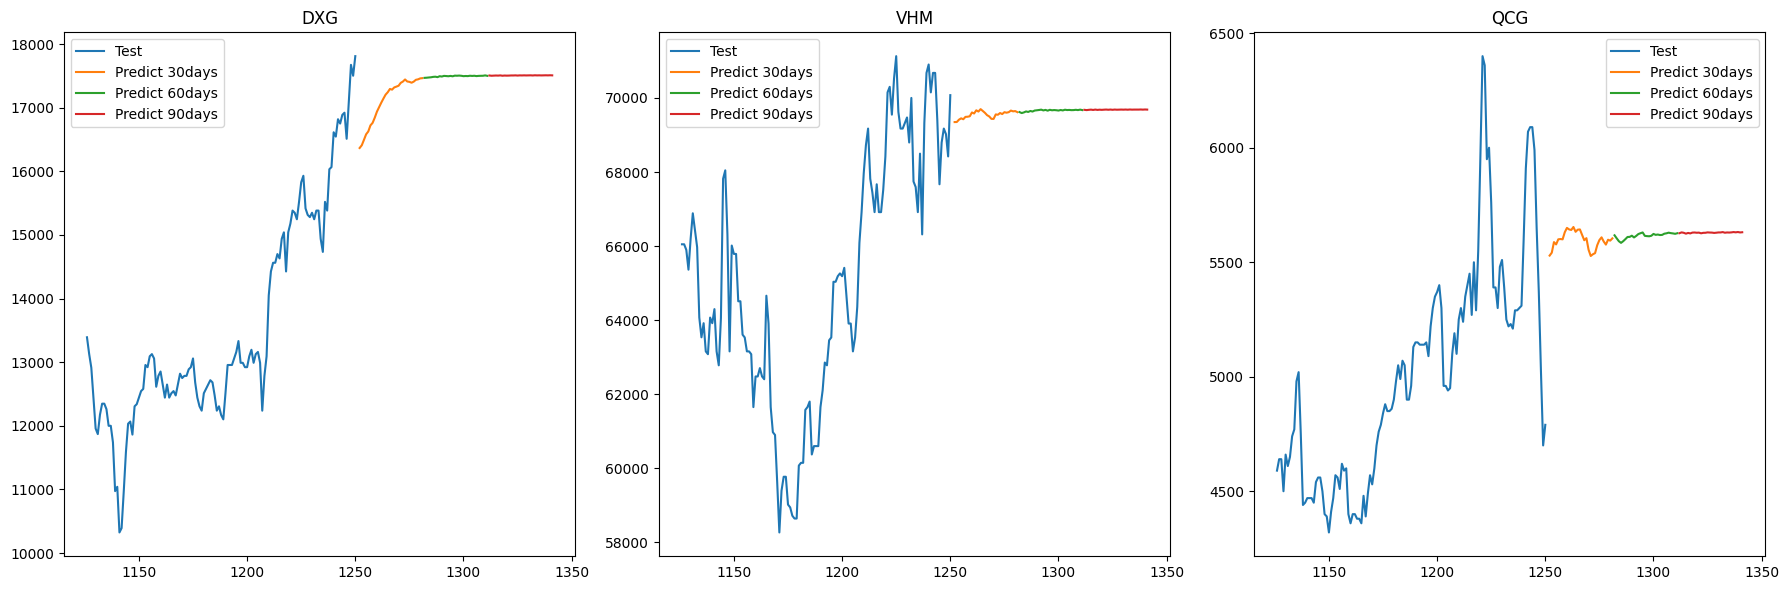

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
# dxg_train_data_index = pd.RangeIndex(start=0, stop=dxg_train_size, step=1)
# axs[0].plot(dxg_train_data['y'], label='Train')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_test_data['y'], label='Test')

predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
# vhm_train_data_index = pd.RangeIndex(start=0, stop=vhm_train_size, step=1)
# axs[1].plot(vhm_train_data['y'], label='Train')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_test_data['y'], label='Test')

predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
# qcg_train_data_index = pd.RangeIndex(start=0, stop=qcg_train_size, step=1)
# axs[2].plot(qcg_train_data['y'], label='Train')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_test_data['y'], label='Test')

predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()